# Indicators talib

In [17]:
import talib
from backtesting.test import GOOG
from backtesting import Backtest , Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import pandas as pd

open_prices = GOOG['Open']
high_prices = GOOG['High']
low_prices = GOOG['Low']
close_prices = GOOG['Close']
volume_prices = GOOG['Volume']
print (GOOG)


              Open    High     Low   Close    Volume
2004-08-19  100.00  104.06   95.96  100.34  22351900
2004-08-20  101.01  109.08  100.50  108.31  11428600
2004-08-23  110.75  113.48  109.05  109.40   9137200
2004-08-24  111.24  111.60  103.57  104.87   7631300
2004-08-25  104.96  108.00  103.88  106.00   4598900
...            ...     ...     ...     ...       ...
2013-02-25  802.30  808.41  790.49  790.77   2303900
2013-02-26  795.00  795.95  784.40  790.13   2202500
2013-02-27  794.80  804.75  791.11  799.78   2026100
2013-02-28  801.10  806.99  801.03  801.20   2265800
2013-03-01  797.80  807.14  796.15  806.19   2175400

[2148 rows x 5 columns]


## Description

I am in the process of building a trading algorithm and leveraging the power of the Ta-lib library. With its extensive array of indicators, I am diligently working to unravel their intricacies and discover how each can be effectively employed.

Here's the structure I've devised to gain a comprehensive understanding of each indicator:

1. What the indicator does:
This involves deciphering the core purpose of the indicator - understanding its role in technical analysis and the insights it can provide into price trends, volatility, and potential reversals.

2. How to activate and use it the indicator in talib as Python code:
Translating theoretical knowledge into practical application is crucial. To achieve this, I'll delve into the actual implementation of each indicator using Ta-lib in Python code. This includes setting up the required parameters, data inputs, and generating the indicator's output.

3. There is a strategy that is used, what is it:
Incorporating these indicators into a strategy is the essence of trading. I'll seek to uncover the strategic significance of each indicator - how it fits into trading decisions, signals it generates, and the type of scenarios in which it excels.

4. What are points/values/things to check for the indicator:
Each indicator has its nuances, and I'll pay close attention to the critical aspects. This includes deciphering what specific values or patterns signal important insights, and what deviations or fluctuations might indicate potential trading opportunities.

5. Give a trading strategy or market conditions where these indicators would be most effective:
Finally, I'll shed light on the broader context where these indicators truly shine. This involves pinpointing market conditions, asset classes, or trading styles where each indicator holds a particular advantage. By understanding their strengths and limitations, I'll be able to craft a well-informed trading strategy.

I'm excited to dive into the specifics of the following indicators:

[indictors]

1. **MACD (Moving Average Convergence Divergence):**

   - *__Purpose__*: MACD is a trend-following momentum indicator that helps identify changes in the strength, direction, momentum, and duration of a trend.
   - *__Activation and Usage__*: Use the `talib.MACD` function in Python. It generates three values - MACD line, signal line, and histogram.
   - *__Strategy__*: MACD crossovers, where the MACD line crosses the signal line, can signal potential trend changes. Positive histogram values indicate bullish momentum, and negative values indicate bearish momentum.
   - *__Key Points__*: Pay attention to the convergence and divergence of MACD and price trends for potential reversals.
   - *__Effective Conditions__*: MACD is effective in trending markets, helping traders ride and identify shifts in trends.

In [18]:
print(talib.MACD.__doc__)

 MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])

    Moving Average Convergence/Divergence (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        slowperiod: 26
        signalperiod: 9
    Outputs:
        macd
        macdsignal
        macdhist
    


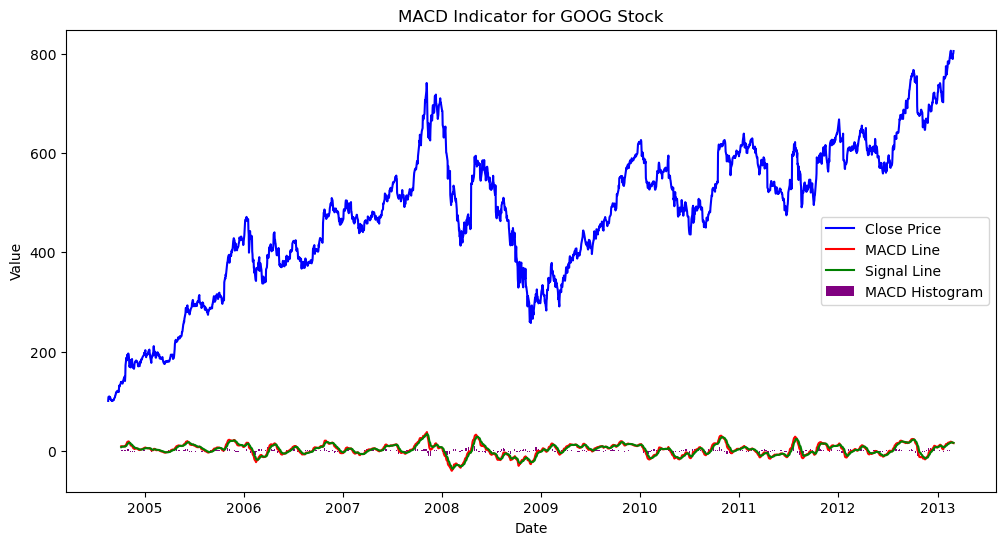

In [19]:
fastperiod = 12
slowperiod = 26
signalperiod = 9

# Calculate the MACD, MACD Signal, and MACD Histogram
macd, macdsignal, macdhist = talib.MACD(close_prices, fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the MACD line
plt.plot(GOOG.index, macd, label='MACD Line', color='red')

# Plot the MACD Signal line
plt.plot(GOOG.index, macdsignal, label='Signal Line', color='green')

# Plot the MACD Histogram
plt.bar(GOOG.index, macdhist, label='MACD Histogram', color='purple')

# Add legend
plt.legend()

# Add title and labels
plt.title('MACD Indicator for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [20]:
# class MacdOscillator(Strategy):
#     fastperiod = 12
#     slowperiod = 26
#     signalperiod = 9
    
#     def init(self):
#         self.macd, self.macdsignal, self.macdhist = self.I(talib.MACD(self.data.Close, fastperiod, slowperiod, signalperiod)

#     def next(self):
#         if crossover(self.macd, self.macdsignal):
#             if self.macdhist > 0:
#                 self.buy()
#             else:
#                 self.position.close()

# bt = Backtest(GOOG, MacdOscillator, cash= 10_000)
# stats = bt.run()

# print(stats)
# bt.plot()

class MacdOscillator(Strategy):
    fastperiod = 12
    slowperiod = 26
    signalperiod = 9
    
    def init(self):
        self.macd, self.macdsignal, self.macdhist = self.I(talib.MACD, self.data.Close, self.fastperiod, self.slowperiod, self.signalperiod)

    def next(self):
        if crossover(self.macd, self.macdsignal) and self.macdhist > 0:
            if not self.position:
                self.buy()
        elif self.position and crossover(self.macdsignal, self.macd):
            self.position.close()
        
bt = Backtest(GOOG, MacdOscillator, cash=10_000)
stats = bt.run()

print(stats)
bt.plot()


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   56.284916
Equity Final [$]                     39600.91
Equity Peak [$]                      40181.56
Return [%]                           296.0091
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    17.52272
Volatility (Ann.) [%]               27.882576
Sharpe Ratio                         0.628447
Sortino Ratio                         1.17578
Calmar Ratio                         0.426259
Max. Drawdown [%]                  -41.108106
Avg. Drawdown [%]                   -4.212009
Max. Drawdown Duration      893 days 00:00:00
Avg. Drawdown Duration       53 days 00:00:00
# Trades                                   77
Win Rate [%]                        49.350649
Best Trade [%]                      35.551344
Worst Trade [%]                    -18.712311
Avg. Trade [%]                    

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p2119', ...)

2. **BBANDS (Bollinger Bands):**

   - *__Purpose__*: Bollinger Bands consist of a middle SMA line and two outer bands that indicate volatility and potential overbought/oversold conditions.
   - *__Activation and Usage__*: Use the `talib.BBANDS` function in Python. It returns upper, middle, and lower Bollinger Bands.
   - *__Strategy__*: Bands expand during high volatility and contract during low volatility. Price touching or crossing the bands can signal potential trend reversals.
   - *__Key Points__*: Monitor band squeezes (contractions) followed by expansions for potential breakouts.
   - *__Effective Conditions__*: BBANDS are useful for identifying volatility changes and potential price reversals.

In [21]:
print(talib.BBANDS.__doc__)

 BBANDS(real[, timeperiod=?, nbdevup=?, nbdevdn=?, matype=?])

    Bollinger Bands (Overlap Studies)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 5
        nbdevup: 2
        nbdevdn: 2
        matype: 0 (Simple Moving Average)
    Outputs:
        upperband
        middleband
        lowerband
    


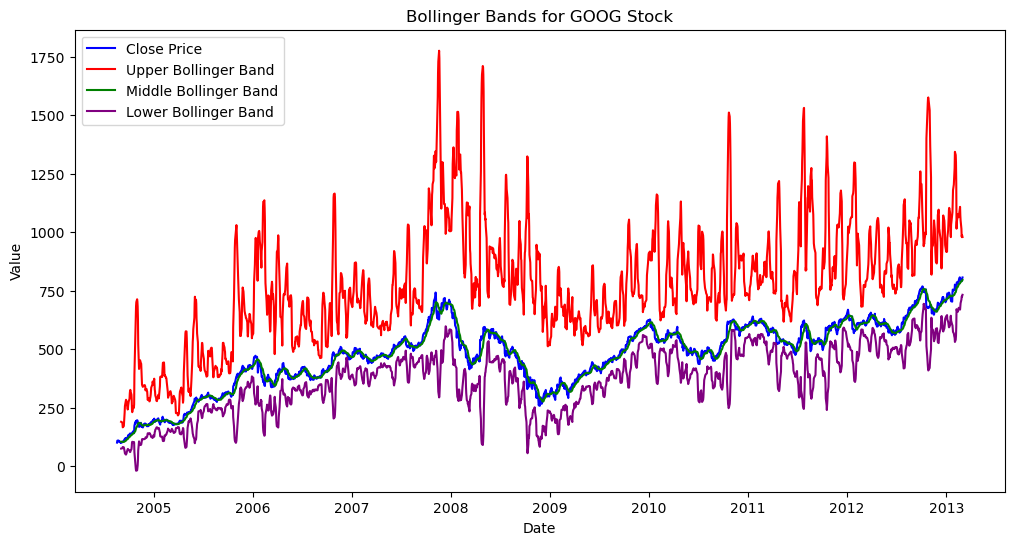

In [22]:
timeperiod = 12
nbdevup = 26
nbdevdn = 9
matype = 0

# Calculate the MACD, MACD Signal, and MACD Histogram
upperband, middleband, lowerband = talib.BBANDS(close_prices, timeperiod=timeperiod, nbdevup=nbdevup, nbdevdn=nbdevdn, matype=matype)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Bollinger Bands
plt.plot(GOOG.index, upperband, label='Upper Bollinger Band', color='red')
plt.plot(GOOG.index, middleband, label='Middle Bollinger Band', color='green')
plt.plot(GOOG.index, lowerband, label='Lower Bollinger Band', color='purple')

# Add legend
plt.legend()

# Add title and labels
plt.title('Bollinger Bands for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [35]:
class BbandsStrategy(Strategy):
    timeperiod = 12
    nbdevup = 26
    nbdevdn = 9
    matype = 0

    def init(self):
        self.upperband, self.middleband, self.lowerband = self.I(talib.BBANDS, self.data.Close, self.timeperiod, self.nbdevup, self.nbdevdn, self.matype)

    def next(self):
        if crossover(self.data.Close, self.upperband):
            if not self.position:
                self.buy()
        elif crossover(self.lowerband, self.data.Close):
            if self.position:
                self.position.close()

bt = Backtest(GOOG, BbandsStrategy, cash=10_000, commission=0)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

3. **RSI (Relative Strength Index):**

   - *__Purpose__*: RSI measures the speed and change of price movements to identify overbought or oversold conditions.
   - *__Activation and Usage__*: Use the `talib.RSI` function in Python. RSI values above 70 indicate potential overbought conditions, while values below 30 indicate potential oversold conditions.
   - *__Strategy__*: RSI crossovers of the 70 and 30 levels can signal potential reversals. Divergence between RSI and price trends might indicate upcoming changes.
   - *__Key Points__*: Look for RSI patterns, such as failure swings and bullish/bearish divergences.
   - *__Effective Conditions__*: RSI is effective in ranging markets and can indicate potential trend exhaustion.


In [23]:
print(talib.RSI.__doc__)

 RSI(real[, timeperiod=?])

    Relative Strength Index (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


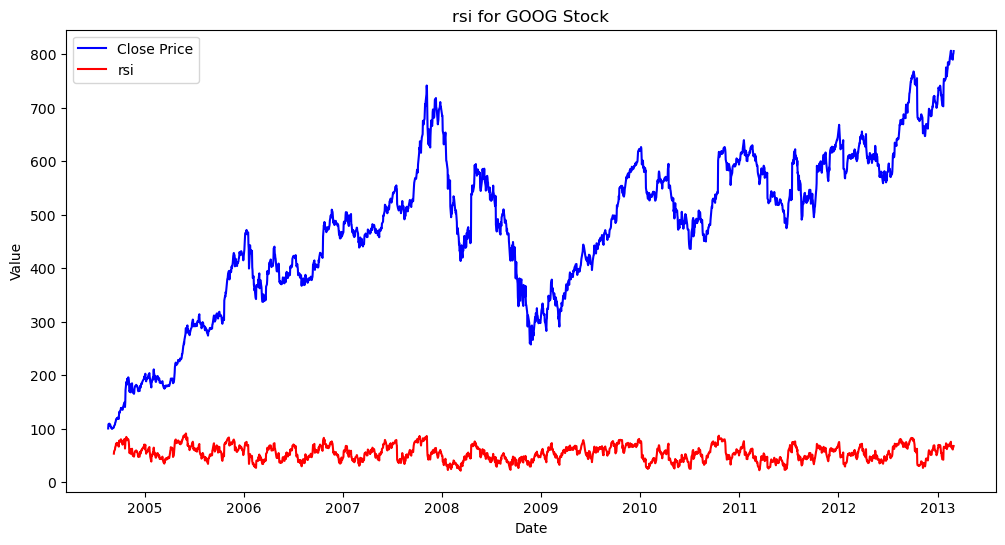

In [145]:
timeperiod = 14

# Calculate the MACD, MACD Signal, and MACD Histogram
rsi = talib.RSI(close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Bollinger Bands
plt.plot(GOOG.index, rsi, label='rsi', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title('rsi for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [37]:
class RsiOscillator(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_windows = 14

    def init(self):
        self.rsi = self.I(talib.RSI, self.data.Close, self.rsi_windows)

    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

bt = Backtest(GOOG, RsiOscillator, cash= 10_000)
stats = bt.run()
print (stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   29.329609
Equity Final [$]                      15677.5
Equity Peak [$]                       15835.7
Return [%]                             56.775
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    5.416737
Volatility (Ann.) [%]               23.502544
Sharpe Ratio                         0.230475
Sortino Ratio                        0.386423
Calmar Ratio                         0.110499
Max. Drawdown [%]                  -49.020734
Avg. Drawdown [%]                   -6.135224
Max. Drawdown Duration     1603 days 00:00:00
Avg. Drawdown Duration       94 days 00:00:00
# Trades                                   10
Win Rate [%]                             80.0
Best Trade [%]                      21.397983
Worst Trade [%]                    -20.449092
Avg. Trade [%]                    

4. **EMA (Exponential Moving Average) and SMA (Simple Moving Average):**

   - *__Purpose__*: EMAs and SMAs smooth out price data to identify trends.
   - *__Activation and Usage__*: Use the `talib.EMA` and `talib.SMA` functions in Python to calculate moving averages.
   - *__Strategy__*: Moving average crossovers (e.g., short-term crossing above long-term) can signal potential trend changes.
   - *__Key Points__*: Pay attention to how price interacts with moving averages. Golden and death crosses are common crossover patterns.
   - *__Effective Conditions__*: EMAs and SMAs are used in trend-following strategies and to confirm trends.
 

In [ ]:
print(talib.EMA.__doc__)
print(talib.SMA.__doc__)

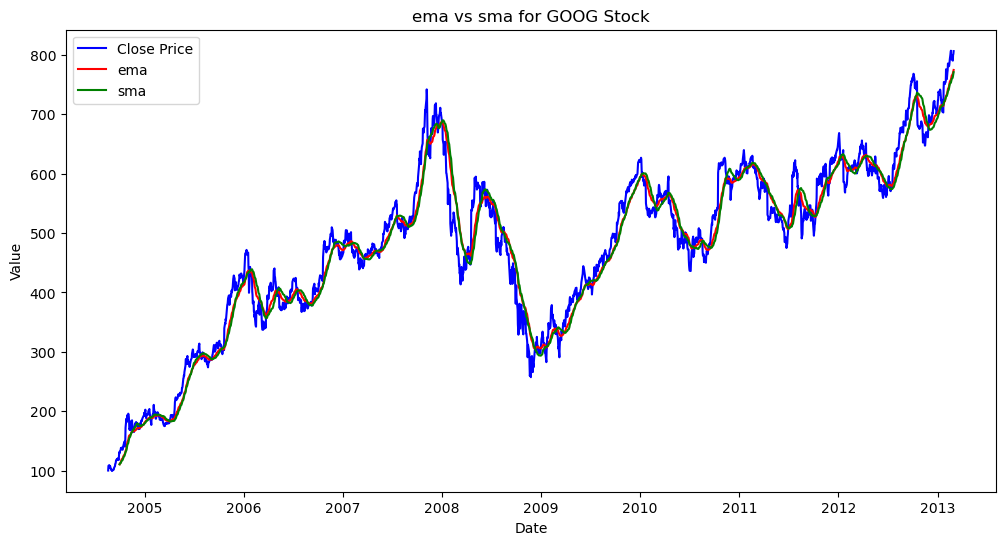

In [147]:
ema_timeperiod = 30
sma_timeperiod = 30

# Calculate the MACD, MACD Signal, and MACD Histogram
ema = talib.EMA(close_prices, timeperiod=ema_timeperiod)
sma = talib.SMA(close_prices, timeperiod=sma_timeperiod)
# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Bollinger Bands
plt.plot(GOOG.index, ema, label='ema', color='red')
plt.plot(GOOG.index, sma, label='sma', color='green')


# Add legend
plt.legend()

# Add title and labels
plt.title('ema vs sma for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [39]:
class RsiOscillator(Strategy):
    ema_timeperiod = 30
    sma_timeperiod = 30

    def init(self):
        self.ema = self.I(talib.EMA, self.data.Close, self.ema_timeperiod)
        self.sma = self.I(talib.SMA, self.data.Close, self.sma_timeperiod)

    def next(self):
        if self.data.Close[-1] > self.ema[-1] and self.data.Close[-1] > self.sma[-1]:
            if not self.position:
                self.buy()
        elif self.data.Close[-1] < self.ema[-1] and self.data.Close[-1] < self.sma[-1]:
            if self.position:
                self.position.close()


bt = Backtest(GOOG, RsiOscillator, cash= 10_000)
stats = bt.run()
print (stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   60.986965
Equity Final [$]                     60467.26
Equity Peak [$]                      61146.01
Return [%]                           504.6726
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   23.505625
Volatility (Ann.) [%]               29.385067
Sharpe Ratio                         0.799917
Sortino Ratio                        1.573424
Calmar Ratio                         0.635381
Max. Drawdown [%]                  -36.994553
Avg. Drawdown [%]                    -4.79682
Max. Drawdown Duration      748 days 00:00:00
Avg. Drawdown Duration       54 days 00:00:00
# Trades                                   64
Win Rate [%]                          39.0625
Best Trade [%]                      53.475736
Worst Trade [%]                     -8.578917
Avg. Trade [%]                    

5. **ATR (Average True Range):**

   - *__Purpose__*: ATR measures volatility by considering the range between high and low prices.
   - *__Activation and Usage__*: Use the `talib.ATR` function in Python. ATR values can help determine position size and stop loss levels.
   - *__Strategy__*: Higher ATR values indicate higher volatility, potentially leading to wider price swings.
   - *__Key Points__*: Combine ATR with other indicators to manage risk and position size.
   - *__Effective Conditions__*: ATR is valuable in assessing market volatility and setting appropriate risk parameters.

In [ ]:
print(talib.ATR.__doc__)

In [42]:
# Calculate the ATR
atr = talib.ATR(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# # Create a plot
# plt.figure(figsize=(12, 6))

# plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# # Plot the ATR
# plt.plot(GOOG.index, atr, label='ATR', color='red')

# # Add legend
# plt.legend()

# Add title and labels
# plt.title('Average True Range (ATR) for GOOG Stock')
# plt.xlabel('Date')
# plt.ylabel('ATR Value')

# # Show the plot
# plt.show()
technologies = {'close':close_prices, 'atr': atr}
df = pd.DataFrame(technologies)
print(df)           
# print (atr)


             close        atr
2004-08-19  100.34        NaN
2004-08-20  108.31        NaN
2004-08-23  109.40        NaN
2004-08-24  104.87        NaN
2004-08-25  106.00        NaN
...            ...        ...
2013-02-25  790.77  12.607907
2013-02-26  790.13  12.519748
2013-02-27  799.78  12.694769
2013-02-28  801.20  12.237705
2013-03-01  806.19  12.133729

[2148 rows x 2 columns]


In [43]:
class AtrStrategy(Strategy):
    atr_timeperiod = 14
    atr_threshold = 2.0  # ATR threshold for generating signals
    
    def init(self):
        self.atr = self.I(talib.ATR, self.data.High, self.data.Low, self.data.Close, timeperiod=self.atr_timeperiod)

    def next(self):
        if self.atr[-1] > self.atr_threshold:
            if not self.position:
                self.buy()
        elif self.atr[-1] < self.atr_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AtrStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.255121
Equity Final [$]                     74278.81
Equity Peak [$]                      75120.46
Return [%]                           642.7881
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   26.522718
Volatility (Ann.) [%]               44.385239
Sharpe Ratio                         0.597557
Sortino Ratio                        1.192681
Calmar Ratio                         0.406691
Max. Drawdown [%]                  -65.215909
Avg. Drawdown [%]                   -5.377584
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     648.194692
Worst Trade [%]                    648.194692
Avg. Trade [%]                    

6. **MA (Moving Average):**

   - *__Purpose__*: A moving average helps smooth out price data to identify trends.
   - *__Activation and Usage__*: Use the `talib.MA` function in Python to calculate various types of moving averages.
   - *__Strategy__*: Moving averages can be used to identify trend direction and potential reversals.
   - *__Key Points__*: Experiment with different types of moving averages (e.g., SMA, EMA) and timeframes for optimal results.
   - *__Effective Conditions__*: Moving averages are versatile and can be used in various market conditions.

In [ ]:
print(talib.MA.__doc__)

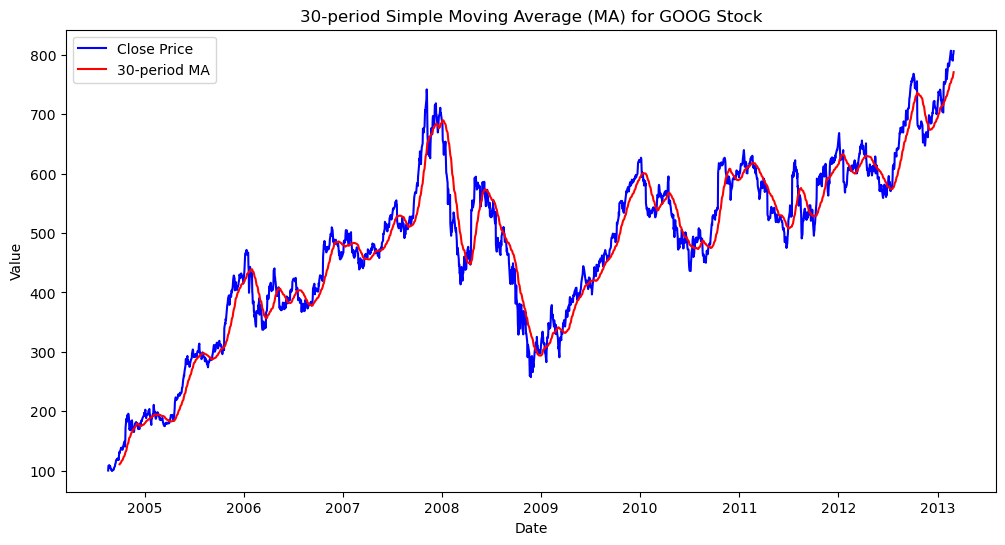

In [149]:
timeperiod = 30
matype = 0  # Simple Moving Average
# Calculate the Moving Average (MA)
ma = talib.MA(close_prices, timeperiod=timeperiod, matype=matype)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Moving Average (MA)
plt.plot(GOOG.index, ma, label=f'{timeperiod}-period MA', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Simple Moving Average (MA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [44]:
class MovingAverageStrategy(Strategy):
    short_ma_period = 50
    long_ma_period = 200
    
    def init(self):
        self.short_ma = self.I(talib.SMA, self.data.Close, timeperiod=self.short_ma_period)
        self.long_ma = self.I(talib.SMA, self.data.Close, timeperiod=self.long_ma_period)

    def next(self):
        if crossover(self.short_ma, self.long_ma):
            if not self.position:
                self.buy()
        elif crossover(self.long_ma, self.short_ma):
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MovingAverageStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   47.486034
Equity Final [$]                     12423.84
Equity Peak [$]                      17394.27
Return [%]                            24.2384
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    2.578879
Volatility (Ann.) [%]               17.150315
Sharpe Ratio                         0.150369
Sortino Ratio                        0.209475
Calmar Ratio                         0.062046
Max. Drawdown [%]                   -41.56386
Avg. Drawdown [%]                   -5.248837
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration      143 days 00:00:00
# Trades                                    5
Win Rate [%]                             60.0
Best Trade [%]                      22.126517
Worst Trade [%]                    -13.261056
Avg. Trade [%]                    

7. **ADX (Average Directional Index):**

   - *__Purpose__*: ADX measures trend strength and helps traders assess the strength of a trend.
   - *__Activation and Usage__*: Use the `talib.ADX` function in Python. ADX values above 25-30 can indicate a strong trend.
   - *__Strategy__*: High ADX values indicate a strong trend, while low values might suggest a range-bound market.
   - *__Key Points__*: Combine ADX with directional indicators (e.g., +DI and -DI) to assess trend direction.
   - *__Effective Conditions__*: ADX is effective in assessing trend strength and can be combined with other indicators.

In [ ]:
print(talib.ADX.__doc__)

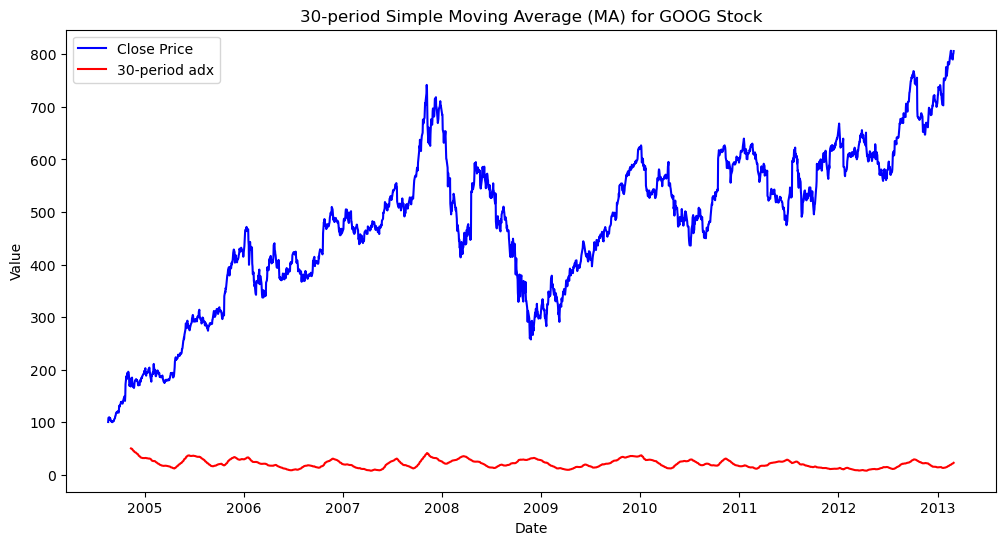

In [151]:
timeperiod = 30
# Calculate the Moving Average (MA)
adx = talib.ADX(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Moving Average (MA)
plt.plot(GOOG.index, adx, label=f'{timeperiod}-period adx', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Simple Moving Average (MA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [45]:
class AdxStrategy(Strategy):
    adx_timeperiod = 14
    adx_threshold = 25  # ADX threshold for generating signals
    
    def init(self):
        self.adx = self.I(talib.ADX, self.data.High, self.data.Low, self.data.Close, timeperiod=self.adx_timeperiod)

    def next(self):
        if self.adx[-1] > self.adx_threshold:
            if not self.position:
                self.buy()
        elif self.adx[-1] < self.adx_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AdxStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   57.495345
Equity Final [$]                      23470.9
Equity Peak [$]                      29695.66
Return [%]                            134.709
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   10.527404
Volatility (Ann.) [%]               30.637214
Sharpe Ratio                         0.343615
Sortino Ratio                        0.577139
Calmar Ratio                         0.192097
Max. Drawdown [%]                  -54.802655
Avg. Drawdown [%]                   -6.721064
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration      116 days 00:00:00
# Trades                                   32
Win Rate [%]                            56.25
Best Trade [%]                      38.529638
Worst Trade [%]                    -29.936728
Avg. Trade [%]                    

8. **CCI (Commodity Channel Index):**

   - *__Purpose__*: CCI measures deviations from an asset's average price and helps identify potential overbought or oversold conditions.
   - *__Activation and Usage__*: Use the `talib.CCI` function in Python. CCI values above 100 or below -100 might indicate potential reversal points.
   - *__Strategy__*: CCI values moving above/below certain thresholds can signal potential trend changes or reversals.
   - *__Key Points__*: Look for divergences between CCI and price trends for potential trade opportunities.
   - *__Effective Conditions__*: CCI is useful for identifying overextended price moves.

In [ ]:
print (talib.CCI.__doc__)

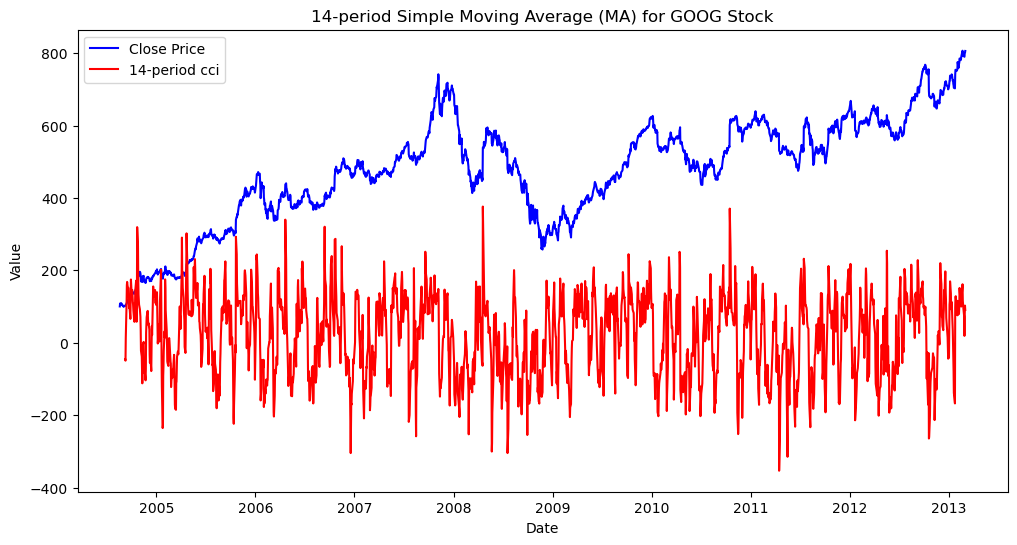

In [153]:
timeperiod = 14
# Calculate the Moving Average (MA)
cci = talib.CCI(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Moving Average (MA)
plt.plot(GOOG.index, cci, label=f'{timeperiod}-period cci', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Simple Moving Average (MA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [46]:
class CciStrategy(Strategy):
    cci_timeperiod = 14
    cci_threshold = 100  # CCI threshold for generating signals
    
    def init(self):
        self.cci = self.I(talib.CCI, self.data.High, self.data.Low, self.data.Close, timeperiod=self.cci_timeperiod)

    def next(self):
        if self.cci[-1] > self.cci_threshold:
            if not self.position:
                self.buy()
        elif self.cci[-1] < -self.cci_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, CciStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   60.288641
Equity Final [$]                     84814.28
Equity Peak [$]                      85773.58
Return [%]                           748.1428
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   28.506924
Volatility (Ann.) [%]               30.537078
Sharpe Ratio                         0.933518
Sortino Ratio                        1.991022
Calmar Ratio                          1.20966
Max. Drawdown [%]                  -23.566064
Avg. Drawdown [%]                   -4.144021
Max. Drawdown Duration      409 days 00:00:00
Avg. Drawdown Duration       42 days 00:00:00
# Trades                                   47
Win Rate [%]                        53.191489
Best Trade [%]                       59.13836
Worst Trade [%]                     -9.615972
Avg. Trade [%]                    

9. **STOCH (Stochastic Oscillator):**
   - *__Purpose__*: The Stochastic Oscillator helps identify overbought or oversold conditions based on recent price movements.
   - *__Activation and Usage__*: Use the `talib.STOCH` function in Python. It generates %K and %D values.
   - *__Strategy__*: %K crossing above/below %D can signal potential trend reversals.
   - *__Key Points__*: Look for divergences between %K/%D and price trends for potential reversals.
   - *__Effective Conditions__*: STOCH is useful in range-bound markets to identify overbought/oversold levels.

In [ ]:
print(talib.STOCH.__doc__)

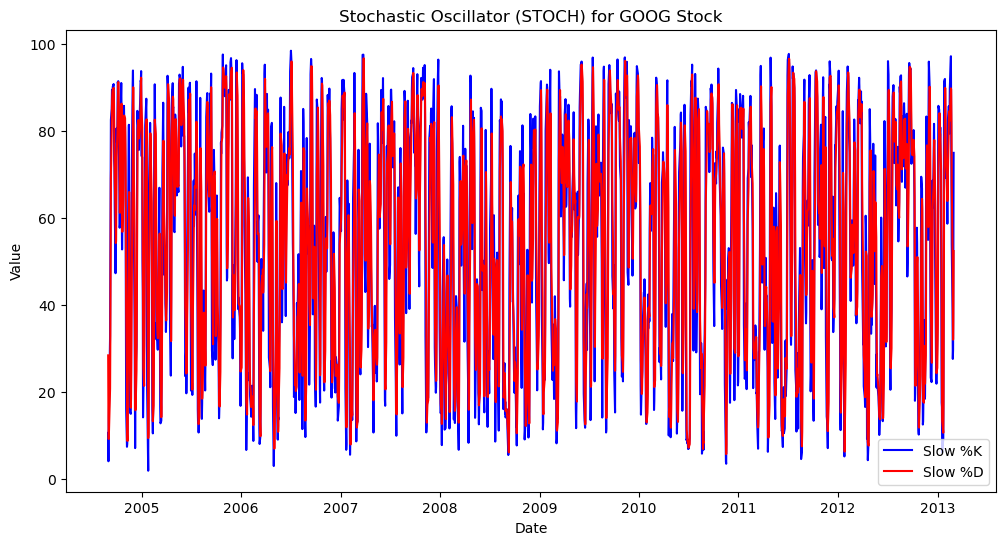

In [154]:
fastk_period = 5
slowk_period = 3
slowk_matype = 0
slowd_period = 3
slowd_matype = 0

# Calculate the Stochastic Oscillator (STOCH)
slowk, slowd = talib.STOCH(high_prices, low_prices, close_prices,
                           fastk_period=fastk_period, slowk_period=slowk_period,
                           slowk_matype=slowk_matype, slowd_period=slowd_period,
                           slowd_matype=slowd_matype)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Slow %K and Slow %D
plt.plot(GOOG.index, slowk, label='Slow %K', color='blue')
plt.plot(GOOG.index, slowd, label='Slow %D', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title('Stochastic Oscillator (STOCH) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [47]:
class StochOscillatorStrategy(Strategy):
    fastk_period = 14
    slowk_period = 3
    slowd_period = 3
    
    def init(self):
        self.slowk, self.slowd = self.I(talib.STOCH, self.data.High, self.data.Low, self.data.Close,
                                        fastk_period=self.fastk_period, slowk_period=self.slowk_period,
                                        slowd_period=self.slowd_period)

    def next(self):
        if self.slowk[-1] > self.slowd[-1] and self.slowk[-2] <= self.slowd[-2]:
            if not self.position:
                self.buy()
        elif self.slowk[-1] < self.slowd[-1] and self.slowk[-2] >= self.slowd[-2]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, StochOscillatorStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.778399
Equity Final [$]                     34801.65
Equity Peak [$]                      39290.75
Return [%]                           248.0165
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    15.75497
Volatility (Ann.) [%]               26.586995
Sharpe Ratio                         0.592582
Sortino Ratio                        1.027627
Calmar Ratio                          0.32575
Max. Drawdown [%]                  -48.365185
Avg. Drawdown [%]                   -4.218479
Max. Drawdown Duration      773 days 00:00:00
Avg. Drawdown Duration       66 days 00:00:00
# Trades                                  276
Win Rate [%]                        47.101449
Best Trade [%]                      24.994958
Worst Trade [%]                     -9.974539
Avg. Trade [%]                    

10. **SAR (Parabolic SAR):**

    - *__Purpose__*: Parabolic SAR helps identify potential price reversals in trending markets.
    - *__Activation and Usage__*: Use the `talib.SAR` function in Python. SAR dots are plotted on the chart.
    - *__Strategy__*: SAR dots above/below price indicate potential trend reversals.
    - *__Key Points__*: SAR can provide trailing stop-loss levels for open positions.
    - *__Effective Conditions__*: SAR is effective in trending markets to manage trailing stops.

In [ ]:
print(talib.SAR.__doc__)

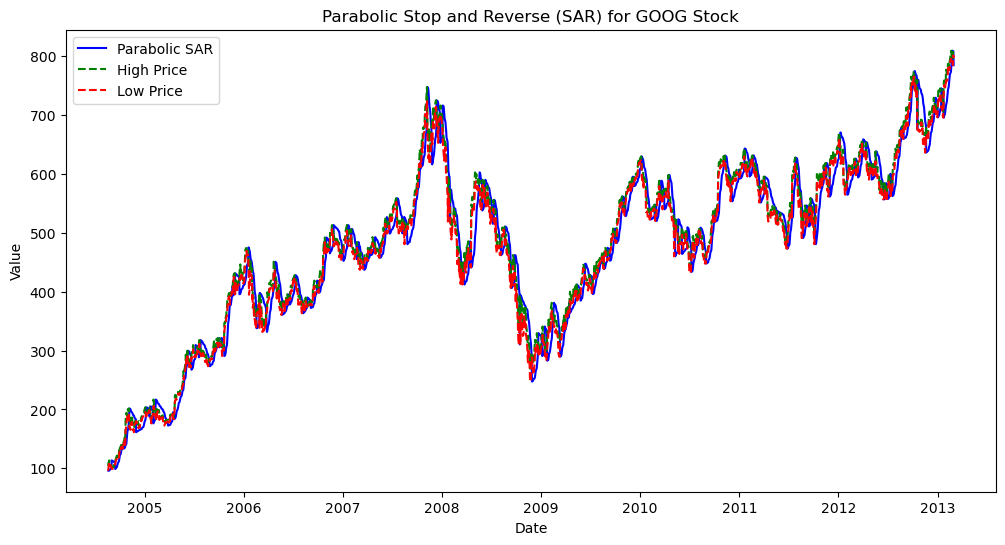

In [155]:
acceleration = 0.02
maximum = 0.2

# Calculate the Parabolic SAR (SAR)
sar = talib.SAR(high_prices, low_prices, acceleration=acceleration, maximum=maximum)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Parabolic SAR (SAR)
plt.plot(GOOG.index, sar, label='Parabolic SAR', color='blue')

# Plot the High and Low prices for reference
plt.plot(GOOG.index, high_prices, label='High Price', color='green', linestyle='dashed')
plt.plot(GOOG.index, low_prices, label='Low Price', color='red', linestyle='dashed')

# Add legend
plt.legend()

# Add title and labels
plt.title('Parabolic Stop and Reverse (SAR) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()


In [48]:
class SarStrategy(Strategy):
    sar_acceleration = 0.02
    sar_maximum = 0.2
    
    def init(self):
        self.sar = self.I(talib.SAR, self.data.High, self.data.Low, acceleration=self.sar_acceleration,
                          maximum=self.sar_maximum)

    def next(self):
        if self.data.Close[-1] > self.sar[-1] and self.data.Close[-2] <= self.sar[-2]:
            if not self.position:
                self.buy()
        elif self.data.Close[-1] < self.sar[-1] and self.data.Close[-2] >= self.sar[-2]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, SarStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   58.333333
Equity Final [$]                     105336.4
Equity Peak [$]                     105798.05
Return [%]                            953.364
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   31.815751
Volatility (Ann.) [%]               30.251148
Sharpe Ratio                          1.05172
Sortino Ratio                        2.298886
Calmar Ratio                         1.157775
Max. Drawdown [%]                  -27.480078
Avg. Drawdown [%]                   -3.554853
Max. Drawdown Duration      406 days 00:00:00
Avg. Drawdown Duration       31 days 00:00:00
# Trades                                   87
Win Rate [%]                        59.770115
Best Trade [%]                       42.06167
Worst Trade [%]                    -13.402923
Avg. Trade [%]                    

11. **WMA (Weighted Moving Average):**

- *__Purpose__*: WMA assigns different weights to recent prices, giving more importance to recent data.
- *__Activation and Usage__*: Use the `talib.WMA` function in Python to calculate weighted moving averages.
- *__Strategy__*: Similar to other moving averages, WMA can help identify trends and reversals.
- *__Key Points__*: Experiment with different weighting schemes for optimal results.
- *__Effective Conditions__*: WMA is useful in capturing recent price movements.

In [ ]:
print(talib.WMA.__doc__)

In [49]:
class WmaStrategy(Strategy):
    wma_timeperiod = 20
    
    def init(self):
        self.wma = self.I(talib.WMA, self.data.Close, timeperiod=self.wma_timeperiod)

    def next(self):
        if self.data.Close[-1] > self.wma[-1] and self.data.Close[-2] <= self.wma[-2]:
            if not self.position:
                self.buy()
        elif self.data.Close[-1] < self.wma[-1] and self.data.Close[-2] >= self.wma[-2]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, WmaStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.871508
Equity Final [$]                     39486.05
Equity Peak [$]                       39929.5
Return [%]                           294.8605
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   17.482679
Volatility (Ann.) [%]               25.910502
Sharpe Ratio                         0.674733
Sortino Ratio                        1.218988
Calmar Ratio                         0.346354
Max. Drawdown [%]                  -50.476303
Avg. Drawdown [%]                   -5.379665
Max. Drawdown Duration     1347 days 00:00:00
Avg. Drawdown Duration       64 days 00:00:00
# Trades                                  129
Win Rate [%]                        37.984496
Best Trade [%]                      38.110585
Worst Trade [%]                     -9.879806
Avg. Trade [%]                    

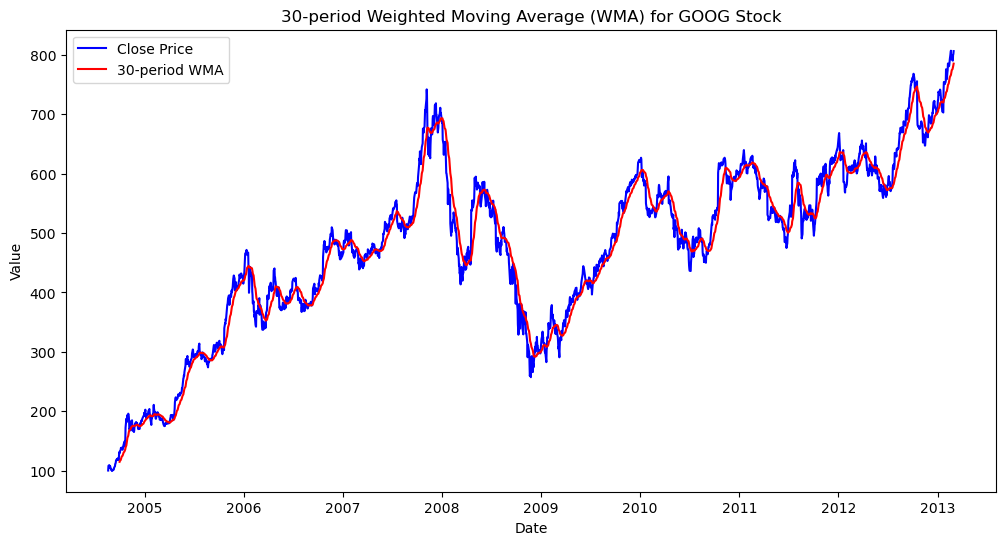

In [156]:
timeperiod = 30

# Calculate the Weighted Moving Average (WMA)
wma = talib.WMA(close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Weighted Moving Average (WMA)
plt.plot(GOOG.index, wma, label=f'{timeperiod}-period WMA', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Weighted Moving Average (WMA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()


13. **KAMA (Kaufman's Adaptive Moving Average):**

- *__Purpose__*: KAMA adjusts its sensitivity to price volatility, aiming to filter out noise.
- *__Activation and Usage__*: Use the `talib.KAMA` function in Python to calculate the KAMA.
- *__Strategy__*: KAMA can identify trends while adapting to changing market conditions.
- *__Key Points__*: KAMA is especially effective in choppy or volatile markets.
- *__Effective Conditions__*: KAMA is useful when regular moving averages might produce false signals.

In [ ]:
print(talib.KAMA.__doc__)

In [50]:

class KamaStrategy(Strategy):
    kama_timeperiod = 20
    
    def init(self):
        self.kama = self.I(talib.KAMA, self.data.Close, timeperiod=self.kama_timeperiod)

    def next(self):
        if self.data.Close[-1] > self.kama[-1] and self.data.Close[-2] <= self.kama[-2]:
            if not self.position:
                self.buy()
        elif self.data.Close[-1] < self.kama[-1] and self.data.Close[-2] >= self.kama[-2]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, KamaStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   57.821229
Equity Final [$]                     62820.21
Equity Peak [$]                      63526.11
Return [%]                           528.2021
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   24.059998
Volatility (Ann.) [%]               28.036495
Sharpe Ratio                         0.858167
Sortino Ratio                        1.739917
Calmar Ratio                         0.925121
Max. Drawdown [%]                  -26.007412
Avg. Drawdown [%]                   -4.312729
Max. Drawdown Duration      396 days 00:00:00
Avg. Drawdown Duration       44 days 00:00:00
# Trades                                  100
Win Rate [%]                             39.0
Best Trade [%]                      43.377984
Worst Trade [%]                     -8.751282
Avg. Trade [%]                    

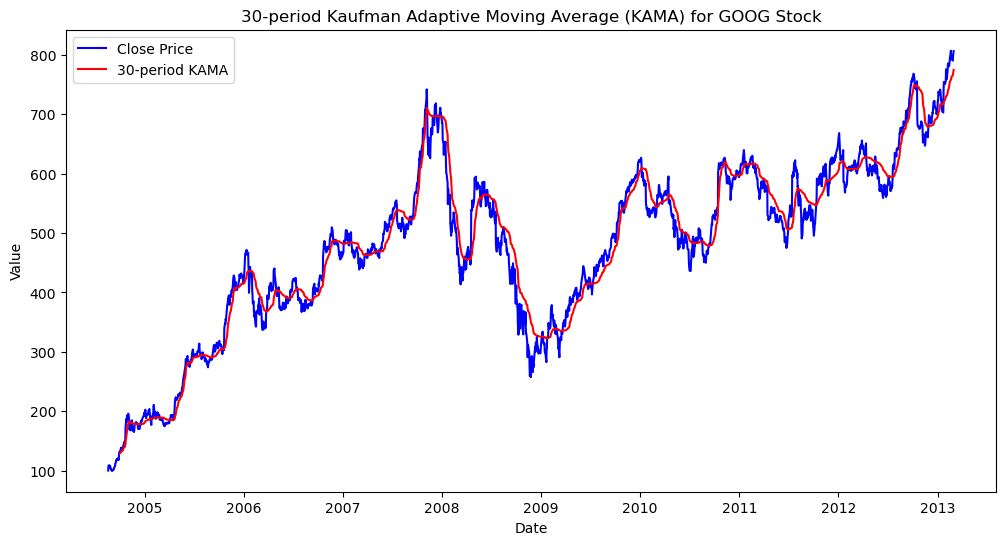

In [157]:
timeperiod = 30
# Calculate the Kaufman Adaptive Moving Average (KAMA)
kama = talib.KAMA(close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Kaufman Adaptive Moving Average (KAMA)
plt.plot(GOOG.index, kama, label=f'{timeperiod}-period KAMA', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Kaufman Adaptive Moving Average (KAMA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

14. **MOM (Momentum):**

- *__Purpose__*: Momentum measures the rate of price change over a specific period.
- *__Activation and Usage__*: Use the `talib.MOM` function in Python. Positive values indicate upward momentum, and negative values indicate downward momentum.
- *__Strategy__*: Momentum can help identify the strength of trends and potential reversals.
- *__Key Points__*: Combine momentum with other indicators for confirmation.
- *__Effective Conditions__*: Momentum is useful for assessing the strength of price movements.

In [ ]:
print(talib.MOM.__doc__)

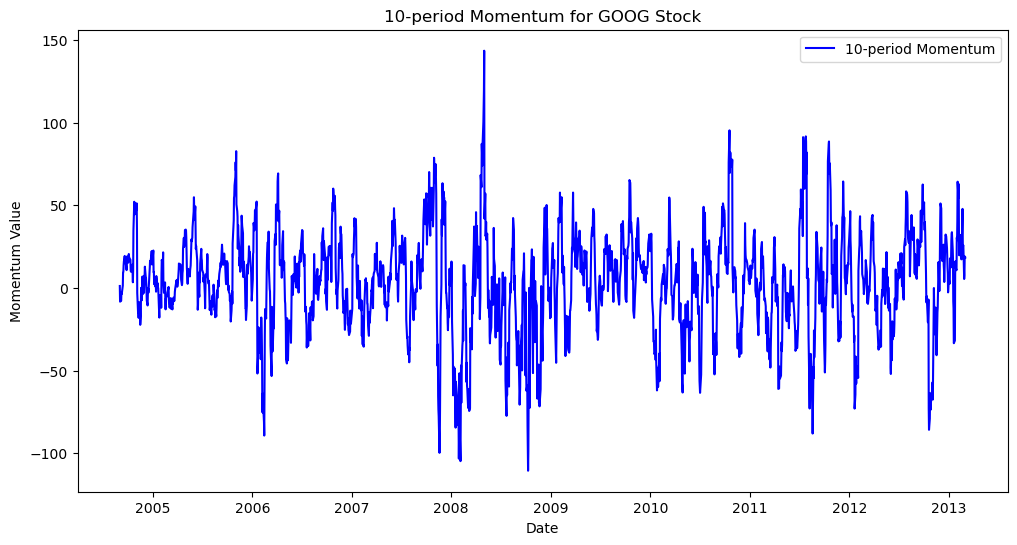

In [158]:
timeperiod = 10
# Calculate the Momentum
momentum = talib.MOM(close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Momentum
plt.plot(GOOG.index, momentum, label=f'{timeperiod}-period Momentum', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Momentum for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Momentum Value')

# Show the plot
plt.show()

In [51]:
class MomStrategy(Strategy):
    mom_timeperiod = 14
    mom_threshold = 0  # MOM threshold for generating signals
    
    def init(self):
        self.mom = self.I(talib.MOM, self.data.Close, timeperiod=self.mom_timeperiod)

    def next(self):
        if self.mom[-1] > self.mom_threshold:
            if not self.position:
                self.buy()
        elif self.mom[-1] < -self.mom_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MomStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   63.594041
Equity Final [$]                    100371.12
Equity Peak [$]                     101502.37
Return [%]                           903.7112
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   31.071169
Volatility (Ann.) [%]               32.547146
Sharpe Ratio                         0.954651
Sortino Ratio                        2.108431
Calmar Ratio                         0.834351
Max. Drawdown [%]                  -37.239932
Avg. Drawdown [%]                   -4.253243
Max. Drawdown Duration      596 days 00:00:00
Avg. Drawdown Duration       39 days 00:00:00
# Trades                                  102
Win Rate [%]                        49.019608
Best Trade [%]                      63.214544
Worst Trade [%]                    -10.616706
Avg. Trade [%]                    

15. **STOCHF (Fast Stochastic Oscillator):**

- *__Purpose__*: Fast Stochastic Oscillator helps identify overbought or oversold conditions based on recent price movements.
- *__Activation and Usage__*: Use the `talib.STOCHF` function in Python. It generates %K and %D values.
- *__Strategy__*: Similar to the regular Stochastic Oscillator, %K crossing %D can signal potential reversals.
- *__Key Points__*: Use the Fast Stochastic Oscillator for shorter-term signals.
- *__Effective Conditions__*: STOCHF is useful for identifying overbought/oversold levels in shorter timeframes.

In [ ]:
print(talib.STOCHF.__doc__)

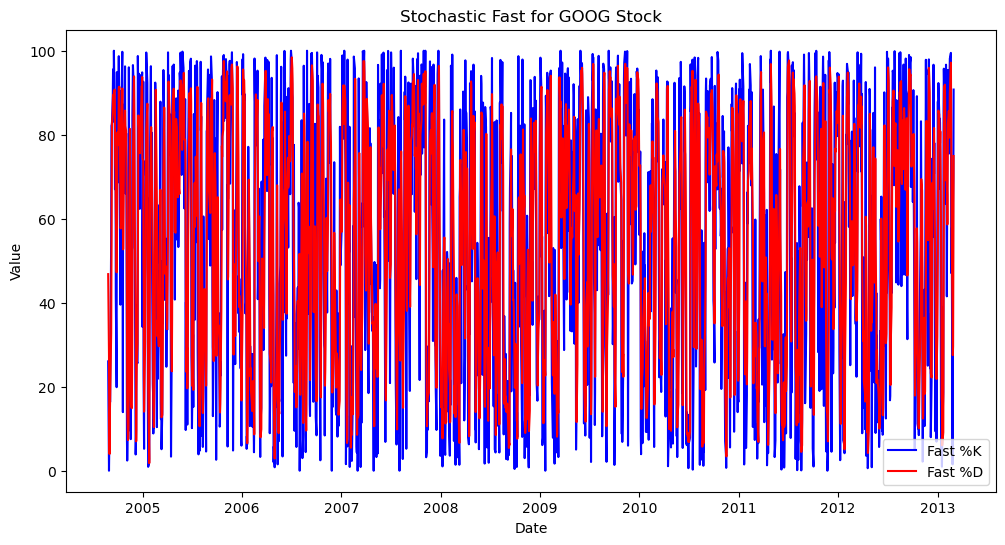

In [159]:

fastk_period = 5
fastd_period = 3
fastd_matype = 0

# Calculate the Stochastic Fast
fastk, fastd = talib.STOCHF(high_prices, low_prices, close_prices,
                             fastk_period=fastk_period, fastd_period=fastd_period,
                             fastd_matype=fastd_matype)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Fast %K and Fast %D
plt.plot(GOOG.index, fastk, label='Fast %K', color='blue')
plt.plot(GOOG.index, fastd, label='Fast %D', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title('Stochastic Fast for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [52]:

class StochFStrategy(Strategy):
    fastk_period = 5
    fastd_period = 3
    
    def init(self):
        self.fastk, self.fastd = self.I(talib.STOCHF, self.data.High, self.data.Low, self.data.Close,
                                        fastk_period=self.fastk_period, fastd_period=self.fastd_period)

    def next(self):
        if self.fastk[-1] > self.fastd[-1] and self.fastk[-2] <= self.fastd[-2]:
            if not self.position:
                self.buy()
        elif self.fastk[-1] < self.fastd[-1] and self.fastk[-2] >= self.fastd[-2]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, StochFStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   70.158287
Equity Final [$]                     65073.86
Equity Peak [$]                      66665.46
Return [%]                           550.7386
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   24.574051
Volatility (Ann.) [%]               31.488228
Sharpe Ratio                          0.78042
Sortino Ratio                        1.600794
Calmar Ratio                         0.462033
Max. Drawdown [%]                  -53.186762
Avg. Drawdown [%]                   -4.221006
Max. Drawdown Duration      963 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                                  457
Win Rate [%]                        49.234136
Best Trade [%]                      24.052655
Worst Trade [%]                    -11.563496
Avg. Trade [%]                    

16. **CMO (Chande Momentum Oscillator):**

- *__Purpose__*: CMO measures the momentum of a price series.
- *__Activation and Usage__*: Use the `talib.CMO` function in Python. Positive values indicate upward momentum, and negative values indicate downward momentum.
- *__Strategy__*: CMO can identify potential trend changes and overbought/oversold conditions.
- *__Key Points__*: Look for extreme CMO values for potential reversal points.
- *__Effective Conditions__*: CMO can help identify shifts in momentum.

In [ ]:
print(talib.CMO.__doc__)

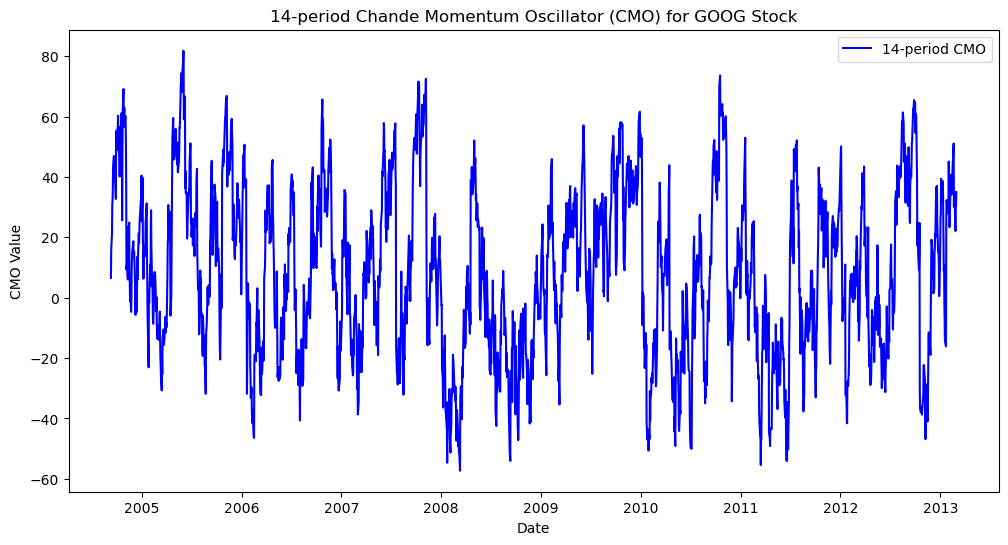

In [160]:
timeperiod = 14

# Calculate the Chande Momentum Oscillator (CMO)
cmo = talib.CMO(close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Chande Momentum Oscillator (CMO)
plt.plot(GOOG.index, cmo, label=f'{timeperiod}-period CMO', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Chande Momentum Oscillator (CMO) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('CMO Value')

# Show the plot
plt.show()

In [53]:
class CmoStrategy(Strategy):
    cmo_timeperiod = 14
    cmo_threshold = 50  # CMO threshold for generating signals
    
    def init(self):
        self.cmo = self.I(talib.CMO, self.data.Close, timeperiod=self.cmo_timeperiod)

    def next(self):
        if self.cmo[-1] > self.cmo_threshold:
            if not self.position:
                self.buy()
        elif self.cmo[-1] < -self.cmo_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, CmoStrategy, cash=10_000)
stats = bt.run()
print(stats)


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   75.139665
Equity Final [$]                     50005.31
Equity Peak [$]                      56503.64
Return [%]                           400.0531
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   20.783463
Volatility (Ann.) [%]               31.738669
Sharpe Ratio                         0.654831
Sortino Ratio                        1.220746
Calmar Ratio                         0.396731
Max. Drawdown [%]                  -52.386784
Avg. Drawdown [%]                   -5.585148
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration       66 days 00:00:00
# Trades                                    5
Win Rate [%]                             80.0
Best Trade [%]                     330.177059
Worst Trade [%]                    -29.293723
Avg. Trade [%]                    

17. **PLUS_DI and 18. MINUS_DI (Directional Movement Indicators):**

- *__Purpose__*: PLUS_DI and MINUS_DI measure upward and downward movements in prices.
- *__Activation and Usage__*: Use the `talib.PLUS_DI` and `talib.MINUS_DI` functions in Python. They help identify trends and potential trend changes.
- *__Strategy__*: The intersection of PLUS_DI and MINUS_DI can signal potential trend changes.
- *__Key Points__*: Combine these indicators with ADX to assess trend strength.
- *__Effective Conditions__*: PLUS_DI and MINUS_DI are valuable in trend identification.

In [ ]:
print(talib.PLUS_DI.__doc__)
print(talib.MINUS_DI.__doc__)

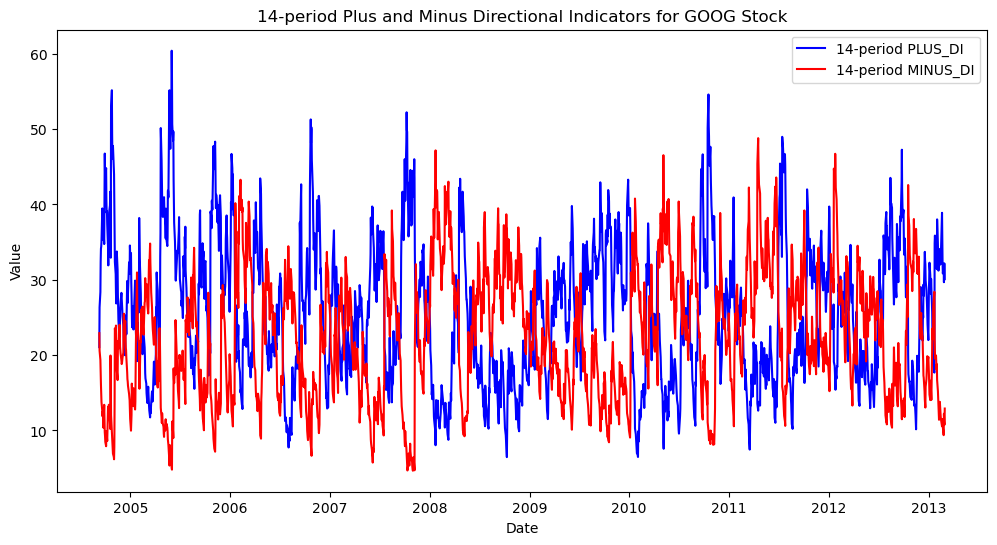

In [161]:
timeperiod = 14

# Calculate the Plus Directional Indicator (PLUS_DI) and Minus Directional Indicator (MINUS_DI)
plus_di = talib.PLUS_DI(high_prices, low_prices, close_prices, timeperiod=timeperiod)
minus_di = talib.MINUS_DI(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Plus Directional Indicator (PLUS_DI)
plt.plot(GOOG.index, plus_di, label=f'{timeperiod}-period PLUS_DI', color='blue')

# Plot the Minus Directional Indicator (MINUS_DI)
plt.plot(GOOG.index, minus_di, label=f'{timeperiod}-period MINUS_DI', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Plus and Minus Directional Indicators for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [54]:
class PlusMinusDIStrategy(Strategy):
    adx_timeperiod = 14
    adx_threshold = 25
    
    def init(self):
        self.plus_di = self.I(talib.PLUS_DI, self.data.High, self.data.Low, self.data.Close, timeperiod=self.adx_timeperiod)
        self.minus_di = self.I(talib.MINUS_DI, self.data.High, self.data.Low, self.data.Close, timeperiod=self.adx_timeperiod)

    def next(self):
        if self.plus_di[-1] > self.minus_di[-1] and self.plus_di[-2] <= self.minus_di[-2]:
            if not self.position:
                self.buy()
        elif self.plus_di[-1] < self.minus_di[-1] and self.plus_di[-2] >= self.minus_di[-2]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, PlusMinusDIStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   58.007449
Equity Final [$]                     83257.08
Equity Peak [$]                      84198.28
Return [%]                           732.5708
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   28.227854
Volatility (Ann.) [%]               30.022561
Sharpe Ratio                         0.940221
Sortino Ratio                        1.970528
Calmar Ratio                         1.113105
Max. Drawdown [%]                  -25.359551
Avg. Drawdown [%]                   -4.193594
Max. Drawdown Duration      576 days 00:00:00
Avg. Drawdown Duration       47 days 00:00:00
# Trades                                   73
Win Rate [%]                        43.835616
Best Trade [%]                      57.526025
Worst Trade [%]                     -7.299065
Avg. Trade [%]                    

19. **ROC (Rate of Change):**

- *__Purpose__*: ROC measures the percentage change in price over a specified period.
- *__Activation and Usage__*: Use the `talib.ROC` function in Python. Positive values indicate upward momentum, and negative values indicate downward momentum.
- *__Strategy__*: ROC can help identify trends and potential reversals.
- *__Key Points__*: Combining ROC with other indicators can enhance its effectiveness.
- *__Effective Conditions__*: ROC is useful for assessing the speed of price movements.

In [ ]:
print(talib.ROC.__doc__)

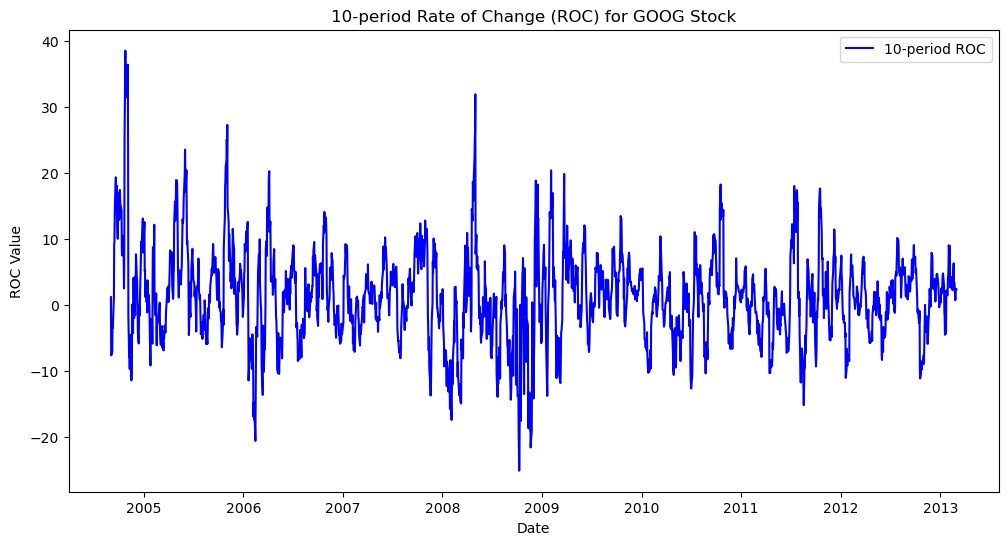

In [162]:
timeperiod = 10

# Calculate the Rate of Change (ROC)
roc = talib.ROC(close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Rate of Change (ROC)
plt.plot(GOOG.index, roc, label=f'{timeperiod}-period ROC', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Rate of Change (ROC) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('ROC Value')

# Show the plot
plt.show()

In [55]:
class RocStrategy(Strategy):
    roc_timeperiod = 14
    roc_threshold = 0  # ROC threshold for generating signals
    
    def init(self):
        self.roc = self.I(talib.ROC, self.data.Close, timeperiod=self.roc_timeperiod)

    def next(self):
        if self.roc[-1] > self.roc_threshold:
            if not self.position:
                self.buy()
        elif self.roc[-1] < -self.roc_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, RocStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   63.594041
Equity Final [$]                    100371.12
Equity Peak [$]                     101502.37
Return [%]                           903.7112
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   31.071169
Volatility (Ann.) [%]               32.547146
Sharpe Ratio                         0.954651
Sortino Ratio                        2.108431
Calmar Ratio                         0.834351
Max. Drawdown [%]                  -37.239932
Avg. Drawdown [%]                   -4.253243
Max. Drawdown Duration      596 days 00:00:00
Avg. Drawdown Duration       39 days 00:00:00
# Trades                                  102
Win Rate [%]                        49.019608
Best Trade [%]                      63.214544
Worst Trade [%]                    -10.616706
Avg. Trade [%]                    

20. **MFI (Money Flow Index):**

- *__Purpose__*: MFI combines price and volume data to identify potential overbought or oversold conditions.
- *__Activation and Usage__*: Use the `talib.MFI` function in Python. MFI values above 80 indicate potential overbought conditions, while values below 20 indicate potential oversold conditions.
- *__Strategy__*: MFI crossovers of the 80 and 20 levels can signal potential reversals.
- *__Key Points__*: Combine MFI with other indicators to validate signals.
- *__Effective Conditions__*: MFI is useful for assessing the strength of price movements in relation to volume.

In [ ]:
print(talib.MFI.__doc__)

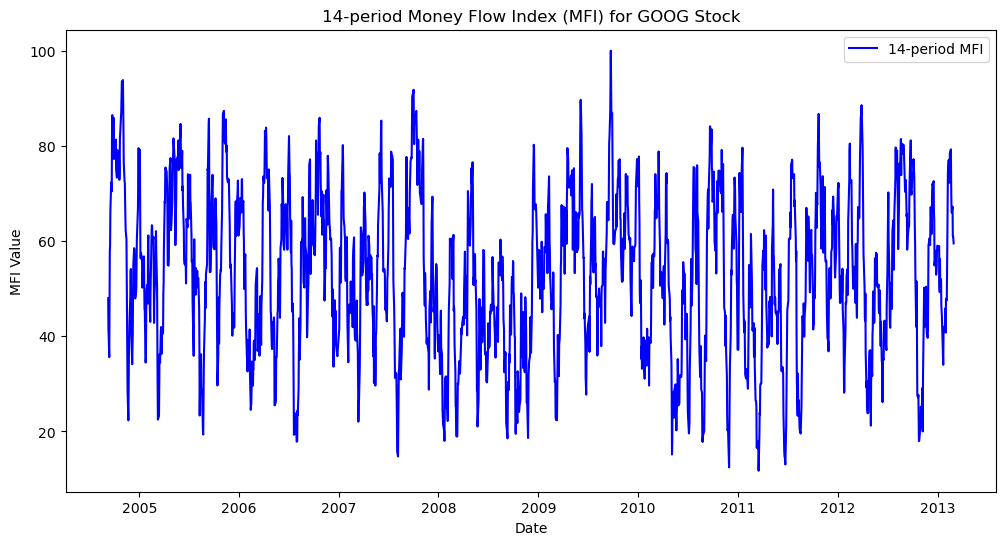

In [163]:
timeperiod = 14

volume = GOOG['Volume']

# Calculate the Money Flow Index (MFI)
mfi = talib.MFI(high_prices, low_prices, close_prices, volume, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Money Flow Index (MFI)
plt.plot(GOOG.index, mfi, label=f'{timeperiod}-period MFI', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Money Flow Index (MFI) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('MFI Value')

# Show the plot
plt.show()


In [65]:
class MfiStrategy(Strategy):
    mfi_timeperiod = 14
    mfi_threshold = 70  # MFI overbought threshold for generating sell signals
    mfi_oversold_threshold = 30  # MFI oversold threshold for generating buy signals
    
    def init(self):
        # self.mfi = self.I(talib.MFI, self.data.High, self.data.Low, self.data.Close, self.data.Volume, self.mfi_timeperiod)
        self.mfi = self.I(talib.MFI, GOOG['Volume'], GOOG['Low'], GOOG['Close'], GOOG['Volume'], self.mfi_timeperiod)

    def next(self):
        if self.mfi[-1] > self.mfi_threshold:
            if self.position:
                self.position.close()
        elif self.mfi[-1] < self.mfi_oversold_threshold:
            if not self.position:
                self.buy()

bt = Backtest(GOOG, MfiStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    3.538175
Equity Final [$]                       8600.7
Equity Peak [$]                      10082.26
Return [%]                            -13.993
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    -1.75293
Volatility (Ann.) [%]                4.196612
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -15.793284
Avg. Drawdown [%]                  -12.249542
Max. Drawdown Duration      844 days 00:00:00
Avg. Drawdown Duration      709 days 00:00:00
# Trades                                    6
Win Rate [%]                        16.666667
Best Trade [%]                       9.904867
Worst Trade [%]                     -9.056231
Avg. Trade [%]                    

21. **AROONOSC (Aroon Oscillator):**

- *__Purpose__*: Aroon Oscillator helps identify the strength of a trend and potential trend changes.
- *__Activation and Usage__*: Use the `talib.AROONOSC` function in Python. Positive values indicate a strong uptrend, while negative values indicate a strong downtrend.
- *__Strategy__*: Aroon Oscillator crossovers can signal potential trend changes.
- *__Key Points__*: Combine Aroon Oscillator with other trend-following indicators for confirmation.
- *__Effective Conditions__*: Aroon Oscillator is useful in assessing trend strength and potential reversals.

In [ ]:
print(talib.AROONOSC.__doc__)

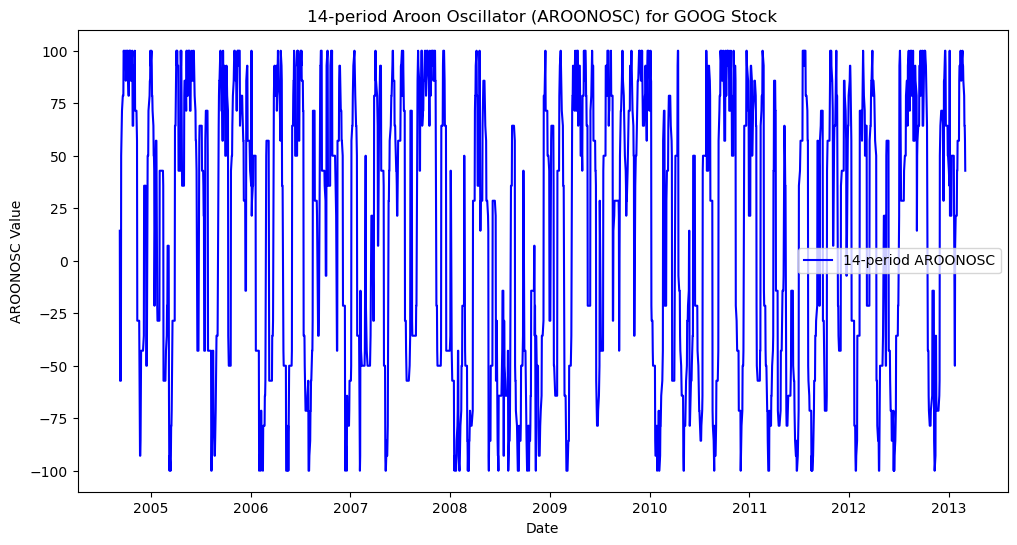

In [164]:
timeperiod = 14

# Calculate the Aroon Oscillator (AROONOSC)
aroon_osc = talib.AROONOSC(high_prices, low_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Aroon Oscillator (AROONOSC)
plt.plot(GOOG.index, aroon_osc, label=f'{timeperiod}-period AROONOSC', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Aroon Oscillator (AROONOSC) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('AROONOSC Value')

# Show the plot
plt.show()

In [67]:
class AroonOscillatorStrategy(Strategy):
    aroonosc_timeperiod = 14
    aroonosc_threshold = 0  # Aroon Oscillator threshold for generating signals
    
    def init(self):
        self.aroonosc = self.I(talib.AROONOSC, self.data.High, self.data.Low, timeperiod=self.aroonosc_timeperiod)

    def next(self):
        if self.aroonosc[-1] > self.aroonosc_threshold:
            if not self.position:
                self.buy()
        elif self.aroonosc[-1] < -self.aroonosc_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AroonOscillatorStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   60.242086
Equity Final [$]                     88869.81
Equity Peak [$]                      89874.36
Return [%]                           788.6981
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   29.213046
Volatility (Ann.) [%]               31.634334
Sharpe Ratio                          0.92346
Sortino Ratio                        1.964936
Calmar Ratio                         0.746841
Max. Drawdown [%]                  -39.115497
Avg. Drawdown [%]                   -3.725093
Max. Drawdown Duration     1074 days 00:00:00
Avg. Drawdown Duration       40 days 00:00:00
# Trades                                   68
Win Rate [%]                        54.411765
Best Trade [%]                      63.214544
Worst Trade [%]                    -13.293489
Avg. Trade [%]                    

22. **AD (Accumulation/Distribution Line):**

- *__Purpose__*: AD Line evaluates the accumulation or distribution of an asset by considering both price and volume.
- *__Activation and Usage__*: Use the `talib.AD` function in Python. Positive values suggest accumulation, while negative values suggest distribution.
- *__Strategy__*: AD Line can help identify potential trend changes based on volume and price movements.
- *__Key Points__*: Combine AD Line with other indicators to confirm signals.
- *__Effective Conditions__*: AD Line is useful in assessing the strength of price movements relative to volume.

In [ ]:
print(talib.AD.__doc__)

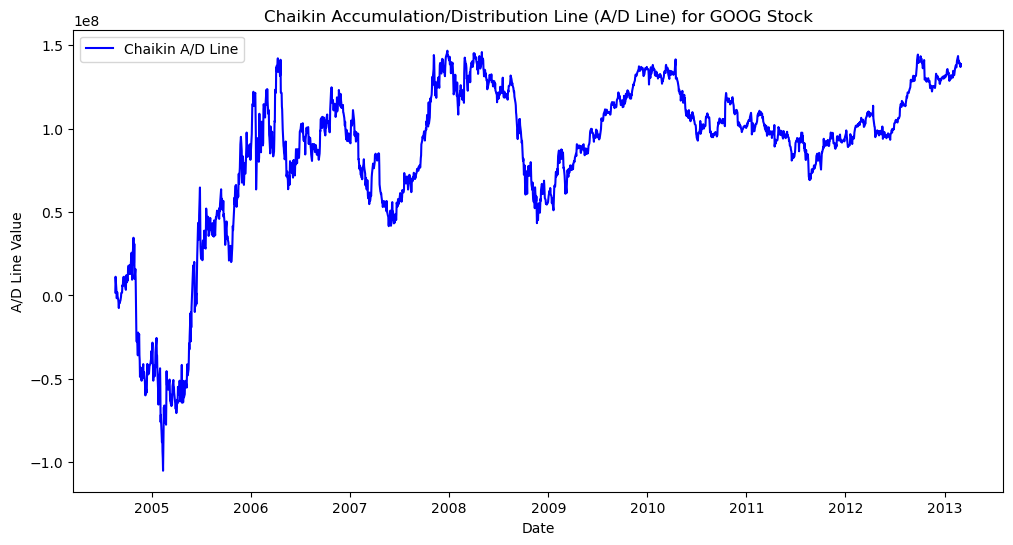

In [165]:
# Extract the 'High', 'Low', 'Close', and 'Volume' data from the DataFrame
high_prices = GOOG['High']
low_prices = GOOG['Low']
close_prices = GOOG['Close']
volume = GOOG['Volume']

# Calculate the Chaikin Accumulation/Distribution Line (A/D Line)
ad_line = talib.AD(high_prices, low_prices, close_prices, volume)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Chaikin Accumulation/Distribution Line (A/D Line)
plt.plot(GOOG.index, ad_line, label='Chaikin A/D Line', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title('Chaikin Accumulation/Distribution Line (A/D Line) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('A/D Line Value')

# Show the plot
plt.show()

In [72]:

class AccumDistStrategy(Strategy):
    def init(self):
        self.acc_dist = self.I(talib.AD, GOOG['High'], GOOG['Low'], GOOG['Close'], GOOG['Volume'])

    def next(self):
        if self.acc_dist[-1] > 0:
            if not self.position:
                self.buy()
        elif self.acc_dist[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AccumDistStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   92.783985
Equity Final [$]                     46512.96
Equity Peak [$]                      47037.86
Return [%]                           365.1296
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   19.761916
Volatility (Ann.) [%]               39.774048
Sharpe Ratio                         0.496855
Sortino Ratio                        0.931202
Calmar Ratio                         0.304349
Max. Drawdown [%]                  -64.931706
Avg. Drawdown [%]                   -5.177096
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       67 days 00:00:00
# Trades                                    6
Win Rate [%]                             50.0
Best Trade [%]                     190.891854
Worst Trade [%]                     -5.227991
Avg. Trade [%]                    

23. **AROON (Aroon Indicator):**

- *__Purpose__*: Aroon Indicator identifies the time since the highest and lowest prices.
- *__Activation and Usage__*: Use the `talib.AROON` function in Python. It generates Aroon Up and Aroon Down values.
- *__Strategy__*: Aroon Up crossing Aroon Down can signal potential trend changes.
- *__Key Points__*: Look for Aroon readings near 100 or 0 for potential reversal points.
- *__Effective Conditions__*: Aroon Indicator can help identify the strength and timing of trends.

In [ ]:
print(talib.AROON.__doc__)

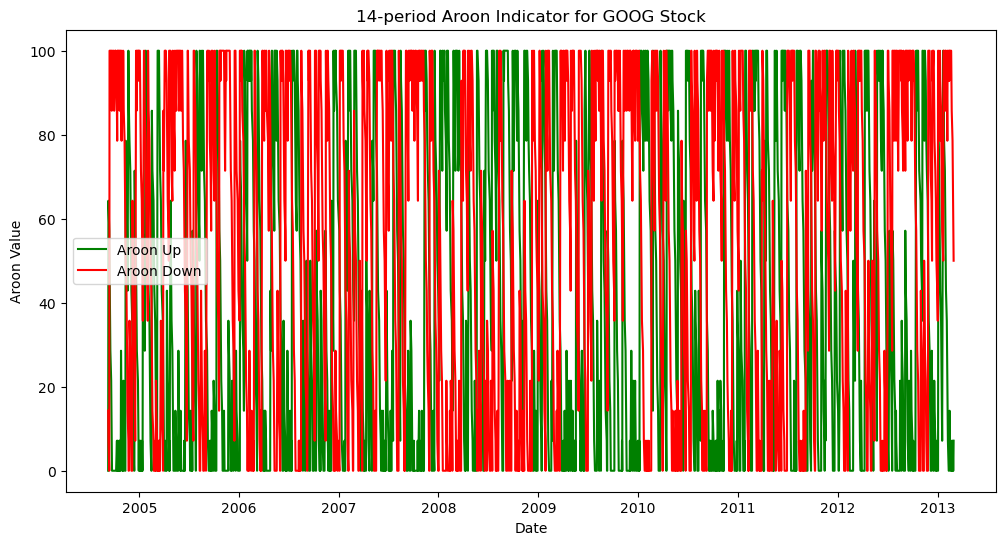

In [166]:
timeperiod = 14


# Extract the 'High' and 'Low' data from the DataFrame
high_prices = GOOG['High']
low_prices = GOOG['Low']

# Calculate the Aroon Indicator
aroon_up, aroon_down = talib.AROON(high_prices, low_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Aroon Up and Aroon Down
plt.plot(GOOG.index, aroon_up, label='Aroon Up', color='green')
plt.plot(GOOG.index, aroon_down, label='Aroon Down', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Aroon Indicator for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Aroon Value')

# Show the plot
plt.show()


In [71]:

class AroonStrategy(Strategy):
    aroon_timeperiod = 14
    aroon_threshold = 70  # Aroon threshold for generating sell signals
    aroon_oversold_threshold = 30  # Aroon threshold for generating buy signals
    
    def init(self):
        self.aroon_up, self.aroon_down = self.I(talib.AROON, self.data.High, self.data.Low, timeperiod=self.aroon_timeperiod)

    def next(self):
        if self.aroon_up[-1] > self.aroon_threshold and self.aroon_down[-1] < self.aroon_threshold:
            if self.position:
                self.position.close()
        elif self.aroon_down[-1] > self.aroon_threshold and self.aroon_up[-1] < self.aroon_threshold:
            if not self.position:
                self.buy()

bt = Backtest(GOOG, AroonStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   60.521415
Equity Final [$]                    118609.26
Equity Peak [$]                     119948.66
Return [%]                          1086.0926
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   33.663834
Volatility (Ann.) [%]               32.790769
Sharpe Ratio                         1.026625
Sortino Ratio                        2.302528
Calmar Ratio                         1.295999
Max. Drawdown [%]                  -25.975202
Avg. Drawdown [%]                   -3.673262
Max. Drawdown Duration      520 days 00:00:00
Avg. Drawdown Duration       35 days 00:00:00
# Trades                                   50
Win Rate [%]                             58.0
Best Trade [%]                      63.214544
Worst Trade [%]                    -13.293489
Avg. Trade [%]                    

24. **ADXR (Average Directional Movement Index Rating):**

- *__Purpose__*: ADXR measures the strength of a trend while accounting for its volatility.
- *__Activation and Usage__*: Use the `talib.ADXR` function in Python. ADXR values above 20-25 indicate a strengthening trend.
- *__Strategy__*: ADXR can help traders assess the strength of a trend while considering market volatility.
- *__Key Points__*: Combine ADXR with ADX and other trend-following indicators for comprehensive analysis.
- *__Effective Conditions__*: ADXR is useful for assessing trend strength with consideration of volatility.

In [ ]:
print(talib.ADXR.__doc__)

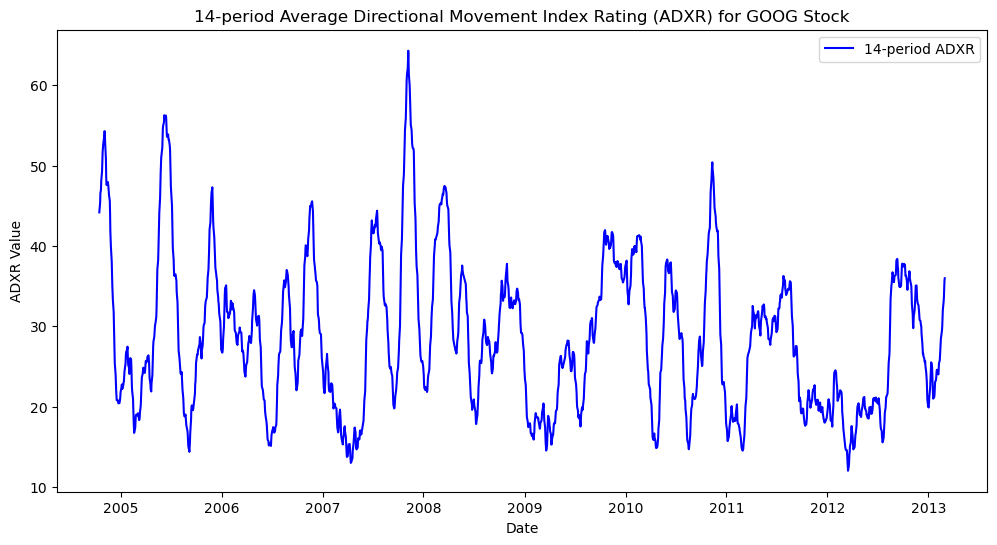

In [167]:
timeperiod = 14

# Extract the 'High', 'Low', and 'Close' data from the DataFrame
high_prices = GOOG['High']
low_prices = GOOG['Low']
close_prices = GOOG['Close']

# Calculate the Average Directional Movement Index Rating (ADXR)
adxr = talib.ADXR(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Average Directional Movement Index Rating (ADXR)
plt.plot(GOOG.index, adxr, label=f'{timeperiod}-period ADXR', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Average Directional Movement Index Rating (ADXR) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('ADXR Value')

# Show the plot
plt.show()


In [73]:
class AdxrStrategy(Strategy):
    adxr_timeperiod = 14
    adxr_threshold = 25
    
    def init(self):
        self.adxr = self.I(talib.ADXR, self.data.High, self.data.Low, self.data.Close, timeperiod=self.adxr_timeperiod)

    def next(self):
        if self.adxr[-1] > self.adxr_threshold:
            if not self.position:
                self.buy()
        elif self.adxr[-1] < self.adxr_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AdxrStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   59.962756
Equity Final [$]                     22061.35
Equity Peak [$]                      23820.33
Return [%]                           120.6135
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    9.727221
Volatility (Ann.) [%]               31.749626
Sharpe Ratio                         0.306373
Sortino Ratio                        0.530083
Calmar Ratio                         0.215923
Max. Drawdown [%]                  -45.049515
Avg. Drawdown [%]                    -8.96601
Max. Drawdown Duration     1511 days 00:00:00
Avg. Drawdown Duration      137 days 00:00:00
# Trades                                   25
Win Rate [%]                             56.0
Best Trade [%]                       36.47415
Worst Trade [%]                    -27.297571
Avg. Trade [%]                    

25. **STDDEV (Standard Deviation):**

- *__Purpose__*: Standard Deviation measures price volatility by assessing the dispersion of prices from the mean.
- *__Activation and Usage__*: Use the `talib.STDDEV` function in Python. Higher values indicate higher volatility.
- *__Strategy__*: Bollinger Bands use standard deviation to determine volatility and potential reversals.
- *__Key Points__*: Use STDDEV in combination with other indicators to assess market conditions.
- *__Effective Conditions__*: STDDEV is valuable for assessing price volatility.

In [ ]:
print(talib.STDDEV.__doc__)

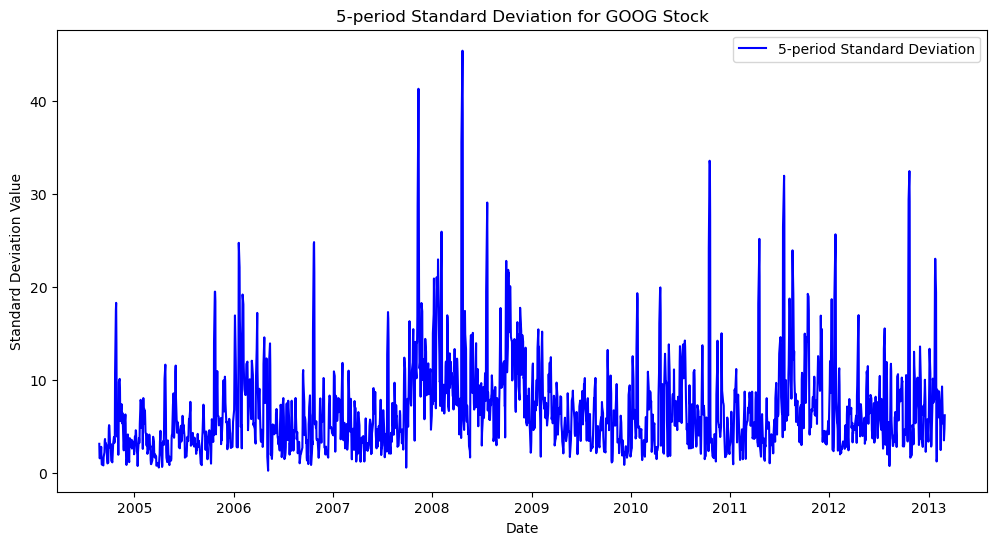

In [168]:

timeperiod = 5
nbdev = 1
# Extract the 'Close' data from the DataFrame
close_prices = GOOG['Close']

# Calculate the Standard Deviation
stddev = talib.STDDEV(close_prices, timeperiod=timeperiod, nbdev=nbdev)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Standard Deviation
plt.plot(GOOG.index, stddev, label=f'{timeperiod}-period Standard Deviation', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Standard Deviation for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Standard Deviation Value')

# Show the plot
plt.show()

In [79]:
class StddevStrategy(Strategy):
    stddev_timeperiod = 14
    stddev_threshold = 0
    
    def init(self):
        self.stddev = self.I(talib.STDDEV, self.data.Close, timeperiod=self.stddev_timeperiod)

    def next(self):
        if self.stddev[-1] > self.stddev_threshold:
            if not self.position:
                self.buy()
        elif self.stddev[-1] < self.stddev_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, StddevStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

26. **DX (Directional Movement Index):**

- *__Purpose__*: DX measures the strength of price movements while accounting for the magnitude and direction.
- *__Activation and Usage__*: Use the `talib.DX` function in Python. DX values above 20-25 indicate a strengthening trend.
- *__Strategy__*: DX can help identify the strength of price movements and potential trend changes.
- *__Key Points__*: Combine DX with ADX and ADXR to assess trend strength.
- *__Effective Conditions__*: DX is useful for assessing the strength of price trends.

In [ ]:
print(talib.DX.__doc__)

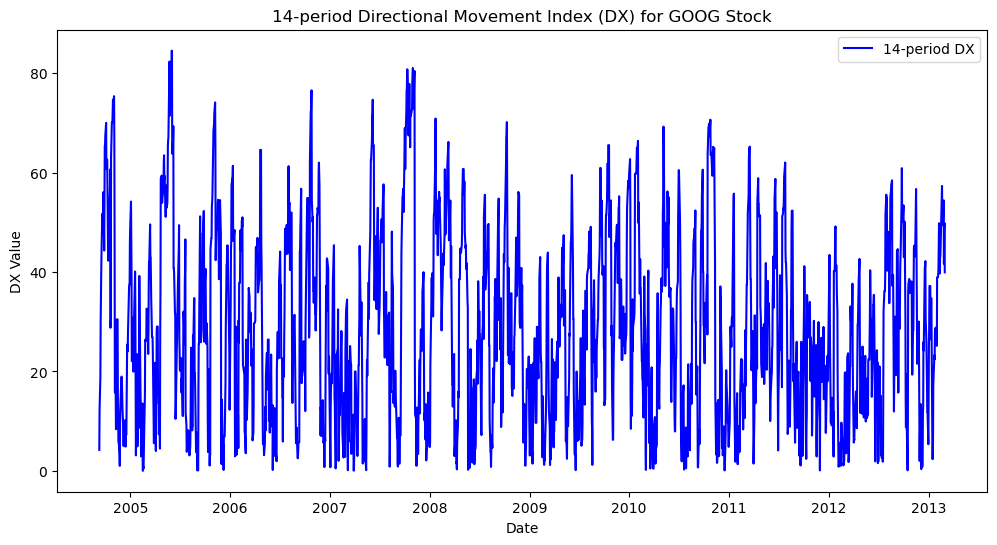

In [169]:

timeperiod = 14

# Calculate the Directional Movement Index (DX)
dx = talib.DX(high_prices, low_prices, close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Directional Movement Index (DX)
plt.plot(GOOG.index, dx, label=f'{timeperiod}-period DX', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Directional Movement Index (DX) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('DX Value')

# Show the plot
plt.show()

In [74]:
class AdxrStrategy(Strategy):
    adxr_timeperiod = 14
    adxr_threshold = 25
    
    def init(self):
        self.adxr = self.I(talib.ADXR, self.data.High, self.data.Low, self.data.Close, timeperiod=self.adxr_timeperiod)

    def next(self):
        if self.adxr[-1] > self.adxr_threshold:
            if not self.position:
                self.buy()
        elif self.adxr[-1] < self.adxr_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AdxrStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   59.962756
Equity Final [$]                     22061.35
Equity Peak [$]                      23820.33
Return [%]                           120.6135
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    9.727221
Volatility (Ann.) [%]               31.749626
Sharpe Ratio                         0.306373
Sortino Ratio                        0.530083
Calmar Ratio                         0.215923
Max. Drawdown [%]                  -45.049515
Avg. Drawdown [%]                    -8.96601
Max. Drawdown Duration     1511 days 00:00:00
Avg. Drawdown Duration      137 days 00:00:00
# Trades                                   25
Win Rate [%]                             56.0
Best Trade [%]                       36.47415
Worst Trade [%]                    -27.297571
Avg. Trade [%]                    

27. **BOP (Balance of Power):**

- *__Purpose__*: BOP evaluates the strength of buyers and sellers in the market.
- *__Activation and Usage__*: Use the `talib.BOP` function in Python. Positive values suggest buying pressure, while negative values suggest selling pressure.
- *__Strategy__*: BOP can help identify shifts in market sentiment and potential reversals.
- *__Key Points__*: Combine BOP with other indicators for comprehensive analysis.
- *__Effective Conditions__*: BOP is useful for assessing the balance between buyers and sellers.

In [170]:
print(talib.BOP.__doc__)

 BOP(open, high, low, close)

    Balance Of Power (Momentum Indicators)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        real
    


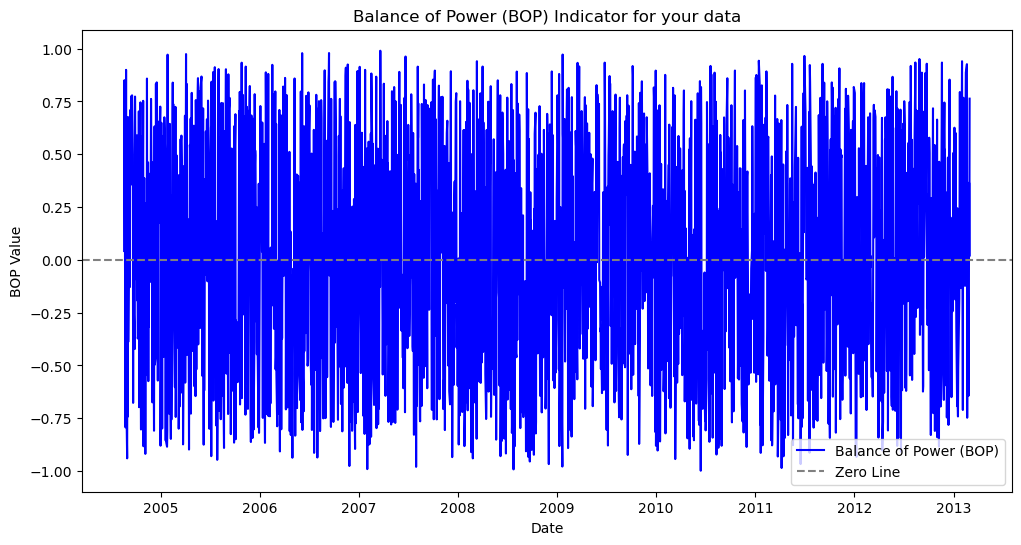

In [172]:
# Calculate the Balance of Power (BOP) indicator
bop_values = talib.BOP(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])
# Plot the BOP indicator
plt.figure(figsize=(12, 6))
plt.plot(GOOG.index, bop_values, label='Balance of Power (BOP)', color='blue')
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')
plt.legend()
plt.title('Balance of Power (BOP) Indicator for your data')
plt.xlabel('Date')
plt.ylabel('BOP Value')
plt.show()

In [76]:
class BopStrategy(Strategy):
    def init(self):
        self.bop = self.I(talib.BOP, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.bop[-1] > 0:
            if not self.position:
                self.buy()
        elif self.bop[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, BopStrategy, cash=10_000)
stats = bt.run()
print(stats)


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   74.487896
Equity Final [$]                     16927.15
Equity Peak [$]                      20290.37
Return [%]                            69.2715
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    6.369495
Volatility (Ann.) [%]                25.55091
Sharpe Ratio                         0.249286
Sortino Ratio                         0.40539
Calmar Ratio                         0.108932
Max. Drawdown [%]                  -58.472369
Avg. Drawdown [%]                   -6.128792
Max. Drawdown Duration     2522 days 00:00:00
Avg. Drawdown Duration      129 days 00:00:00
# Trades                                  554
Win Rate [%]                        44.043321
Best Trade [%]                      17.465926
Worst Trade [%]                     -9.766658
Avg. Trade [%]                    

28. **TRANGE (True Range):**

- *__Purpose__*: True Range assesses the volatility of an asset by considering the range between high and low prices.
- *__Activation and Usage__*: Use the `talib.TRANGE` function in Python. It calculates the true range for each period.
- *__Strategy__*: True Range is commonly used in the calculation of the Average True Range (ATR) indicator.
- *__Key Points__*: ATR and TRANGE are closely related and can be used for managing risk and setting stops.
- *__Effective Conditions__*: True Range is valuable for assessing price volatility.

In [ ]:
print(talib.TRANGE.__doc__)

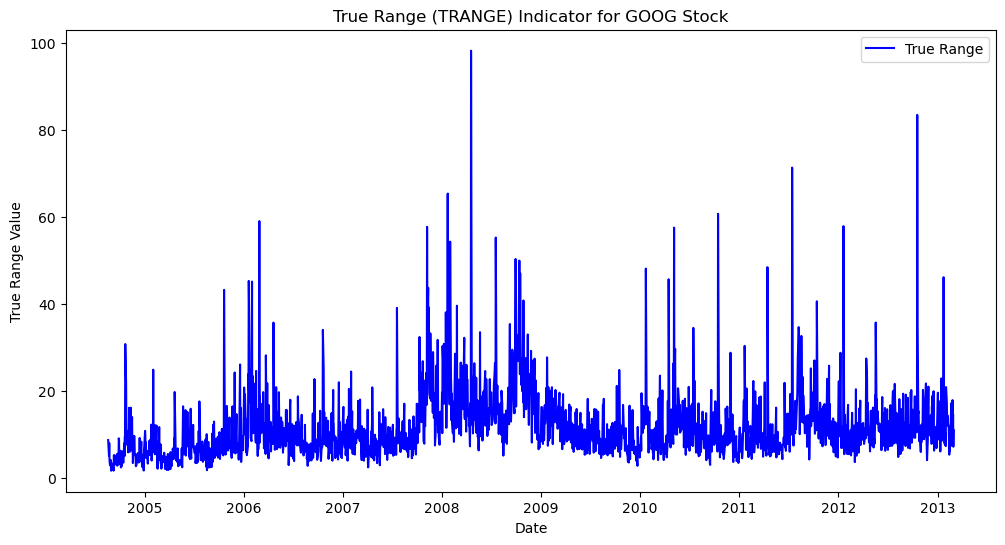

In [174]:
# Calculate the True Range (TRANGE) indicator
true_range = talib.TRANGE(GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the True Range (TRANGE)
plt.plot(GOOG.index, true_range, label='True Range', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title('True Range (TRANGE) Indicator for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('True Range Value')

# Show the plot
plt.show()


In [77]:
class TrangeStrategy(Strategy):
    def init(self):
        self.trange = self.I(talib.TRANGE, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.trange[-1] > 0:
            if not self.position:
                self.buy()
        elif self.trange[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, TrangeStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.860335
Equity Final [$]                     71103.84
Equity Peak [$]                      71909.29
Return [%]                           611.0384
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    25.87595
Volatility (Ann.) [%]               44.313021
Sharpe Ratio                         0.583936
Sortino Ratio                        1.156586
Calmar Ratio                         0.396893
Max. Drawdown [%]                  -65.196362
Avg. Drawdown [%]                   -5.458175
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     617.188062
Worst Trade [%]                    617.188062
Avg. Trade [%]                    

29. **DEMA (Double Exponential Moving Average):**

- *__Purpose__*: DEMA is a smoother version of the Exponential Moving Average (EMA).
- *__Activation and Usage__*: Use the `talib.DEMA` function in Python. DEMA reduces lag compared to other moving averages.
- *__Strategy__*: DEMA can help identify trends with reduced lag.
- *__Key Points__*: Experiment with different types of moving averages to find the best fit for your trading style.
- *__Effective Conditions__*: DEMA is useful for trend-following strategies with reduced lag.

In [ ]:
print(talib.DEMA.__doc__)

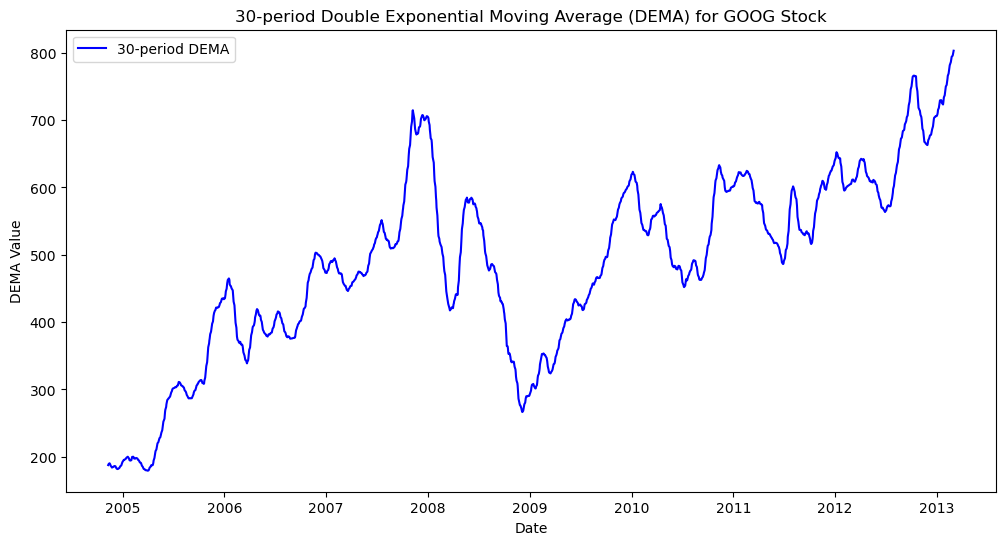

In [175]:
# Calculate the Double Exponential Moving Average (DEMA) indicator
timeperiod = 30
dema_values = talib.DEMA(GOOG['Close'], timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the DEMA indicator
plt.plot(GOOG.index, dema_values, label=f'{timeperiod}-period DEMA', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Double Exponential Moving Average (DEMA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('DEMA Value')

# Show the plot
plt.show()

In [78]:
class DemaStrategy(Strategy):
    dema_timeperiod = 14
    dema_threshold = 0
    
    def init(self):
        self.dema = self.I(talib.DEMA, self.data.Close, timeperiod=self.dema_timeperiod)

    def next(self):
        if self.dema[-1] > self.dema_threshold:
            if not self.position:
                self.buy()
        elif self.dema[-1] < self.dema_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, DemaStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   98.696462
Equity Final [$]                      62345.8
Equity Peak [$]                       63051.7
Return [%]                            523.458
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   23.949716
Volatility (Ann.) [%]               43.210678
Sharpe Ratio                         0.554255
Sortino Ratio                        1.079137
Calmar Ratio                         0.367538
Max. Drawdown [%]                  -65.162542
Avg. Drawdown [%]                   -5.510298
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       57 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     529.676401
Worst Trade [%]                    529.676401
Avg. Trade [%]                    

30. **TEMA (Triple Exponential Moving Average):**

- *__Purpose__*: TEMA further reduces lag compared to other moving averages.
- *__Activation and Usage__*: Use the `talib.TEMA` function in Python. TEMA is a smoother version of the Exponential Moving Average (EMA).
- *__Strategy__*: TEMA can help identify trends with even less lag than DEMA.
- *__Key Points__*: Consider using TEMA in combination with other indicators for confirmation.
- *__Effective Conditions__*: TEMA is useful for capturing trends with minimal lag.

In [ ]:
print(talib.TEMA.__doc__)

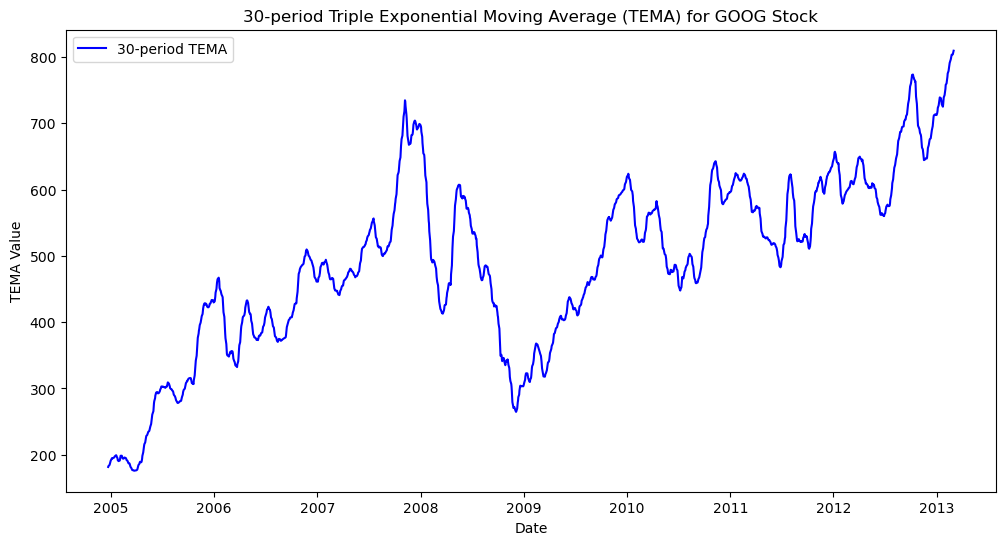

In [176]:
# Calculate the Triple Exponential Moving Average (TEMA) indicator
timeperiod = 30
tema_values = talib.TEMA(GOOG['Close'], timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the TEMA indicator
plt.plot(GOOG.index, tema_values, label=f'{timeperiod}-period TEMA', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Triple Exponential Moving Average (TEMA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('TEMA Value')

# Show the plot
plt.show()


In [80]:
class TemaStrategy(Strategy):
    tema_timeperiod = 14
    tema_threshold = 0
    
    def init(self):
        self.tema = self.I(talib.TEMA, self.data.Close, timeperiod=self.tema_timeperiod)

    def next(self):
        if self.tema[-1] > self.tema_threshold:
            if not self.position:
                self.buy()
        elif self.tema[-1] < self.tema_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, TemaStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   98.091248
Equity Final [$]                      55167.4
Equity Peak [$]                      55791.85
Return [%]                            451.674
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   22.183633
Volatility (Ann.) [%]               42.482999
Sharpe Ratio                         0.522177
Sortino Ratio                         1.00082
Calmar Ratio                         0.340537
Max. Drawdown [%]                   -65.14305
Avg. Drawdown [%]                    -5.75039
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       61 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     457.122905
Worst Trade [%]                    457.122905
Avg. Trade [%]                    

29. **MAX (Maximum Value):**

- *__Purpose__*: MAX calculates the maximum value within a specified period.
- *__Activation and Usage__*: Use the `talib.MAX` function in Python. It helps identify the highest value over a given period.
- *__Strategy__*: MAX can be used to find the highest high prices over a certain timeframe.
- *__Key Points__*: Combine MAX with other indicators to assess price extremes.
- *__Effective Conditions__*: MAX is useful for finding recent price highs.


In [ ]:
print(talib.MAX.__doc__)

In [81]:
class MaxStrategy(Strategy):
    max_timeperiod = 14
    max_threshold = 0
    
    def init(self):
        self.max_value = self.I(talib.MAX, self.data.Close, timeperiod=self.max_timeperiod)

    def next(self):
        if self.max_value[-1] > self.max_threshold:
            if not self.position:
                self.buy()
        elif self.max_value[-1] < self.max_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MaxStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

30. **MIN (Minimum Value):**

- *__Purpose__*: MIN calculates the minimum value within a specified period.
- *__Activation and Usage__*: Use the `talib.MIN` function in Python. It helps identify the lowest value over a given period.
- *__Strategy__*: MIN can be used to find the lowest low prices over a certain timeframe.
- *__Key Points__*: Combine MIN with other indicators to assess price extremes.
- *__Effective Conditions__*: MIN is useful for finding recent price lows.

In [ ]:
print(talib.MIN.__doc__)

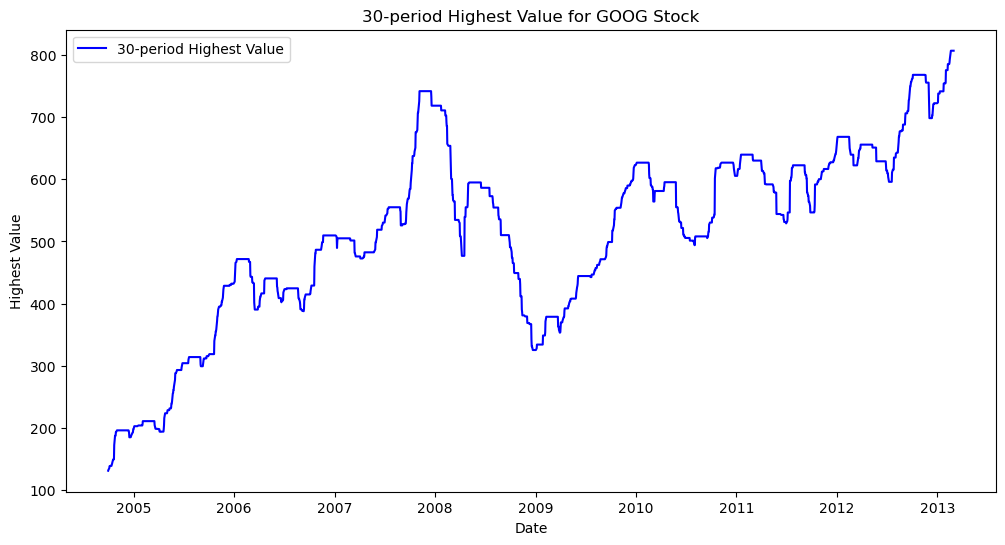

In [177]:
# Calculate the Highest value over a specified period
timeperiod = 30
max_values = talib.MAX(GOOG['Close'], timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the MAX values
plt.plot(GOOG.index, max_values, label=f'{timeperiod}-period Highest Value', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Highest Value for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Highest Value')

# Show the plot
plt.show()


In [82]:
class MinStrategy(Strategy):
    min_timeperiod = 14
    min_threshold = 0
    
    def init(self):
        self.min_value = self.I(talib.MIN, self.data.Close, timeperiod=self.min_timeperiod)

    def next(self):
        if self.min_value[-1] > self.min_threshold:
            if not self.position:
                self.buy()
        elif self.min_value[-1] < self.min_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MinStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

31. **CDLDOJI (Doji Candlestick Pattern):**

- *__Purpose__*: CDLDOJI identifies the Doji candlestick pattern, indicating potential indecision in the market.
- *__Activation and Usage__*: Use the `talib.CDLDOJI` function in Python. Doji patterns suggest uncertainty between buyers and sellers.
- *__Strategy__*: A Doji pattern can signal potential trend reversals, especially when found after an uptrend or downtrend.
- *__Key Points__*: Combine CDLDOJI with other candlestick patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLDOJI can be useful for identifying potential trend changes.

In [ ]:
print(talib.CDLDOJI.__doc__)

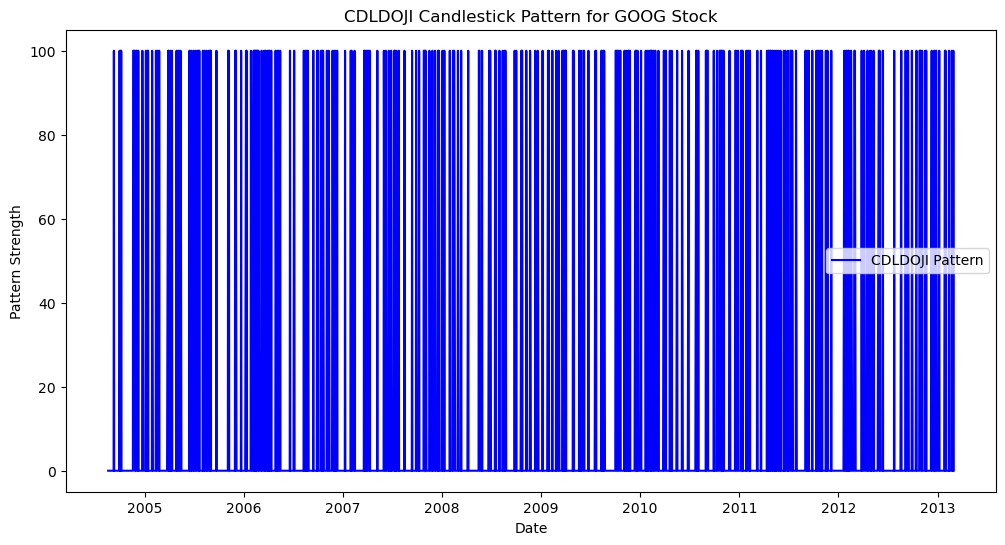

In [179]:
# Calculate the CDLDOJI pattern
doji_pattern = talib.CDLDOJI(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the CDLDOJI pattern
plt.plot(GOOG.index, doji_pattern, label='CDLDOJI Pattern', color='blue')

# Highlight bullish (1) and bearish (-1) patterns
plt.fill_between(GOOG.index, doji_pattern, where=doji_pattern > 0, color='green', alpha=0.3)
plt.fill_between(GOOG.index, doji_pattern, where=doji_pattern < 0, color='red', alpha=0.3)

# Add legend
plt.legend()

# Add title and labels
plt.title('CDLDOJI Candlestick Pattern for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Strength')

# Show the plot
plt.show()


In [83]:
class DojiStrategy(Strategy):
    def init(self):
        self.doji_pattern = self.I(talib.CDLDOJI, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.doji_pattern[-1] > 0:
            if not self.position:
                self.buy()
        elif self.doji_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, DojiStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

32. **ULTOSC (Ultimate Oscillator):**

- *__Purpose__*: ULTOSC measures the buying and selling pressure over three different timeframes.
- *__Activation and Usage__*: Use the `talib.ULTOSC` function in Python. ULTOSC values above 70 indicate overbought conditions, and values below 30 indicate oversold conditions.
- *__Strategy__*: ULTOSC crossovers of overbought and oversold levels can signal potential reversals.
- *__Key Points__*: Combine ULTOSC with other indicators to validate signals.
- *__Effective Conditions__*: ULTOSC provides a broader perspective of buying and selling pressure.

In [ ]:
print(talib.ULTOSC.__doc__)

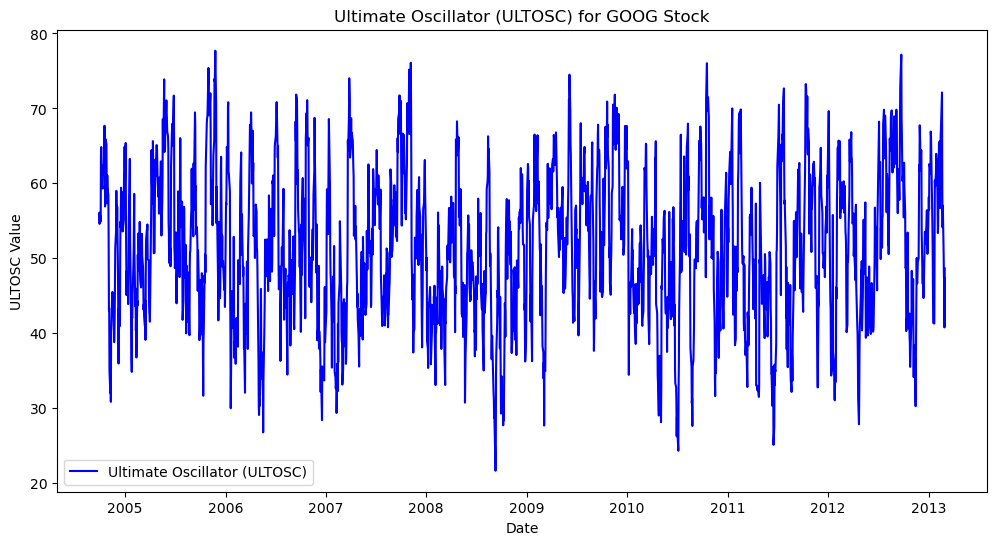

In [180]:
# Calculate the Ultimate Oscillator (ULTOSC)
timeperiod1 = 7
timeperiod2 = 14
timeperiod3 = 28
ultosc_values = talib.ULTOSC(GOOG['High'], GOOG['Low'], GOOG['Close'], timeperiod1, timeperiod2, timeperiod3)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Ultimate Oscillator (ULTOSC)
plt.plot(GOOG.index, ultosc_values, label='Ultimate Oscillator (ULTOSC)', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title('Ultimate Oscillator (ULTOSC) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('ULTOSC Value')

# Show the plot
plt.show()


In [84]:
class UltOscStrategy(Strategy):
    ultosc_timeperiod1 = 7
    ultosc_timeperiod2 = 14
    ultosc_timeperiod3 = 28
    ultosc_overbought = 70
    ultosc_oversold = 30
    
    def init(self):
        self.ultosc = self.I(talib.ULTOSC, self.data.High, self.data.Low, self.data.Close,
                             timeperiod1=self.ultosc_timeperiod1,
                             timeperiod2=self.ultosc_timeperiod2,
                             timeperiod3=self.ultosc_timeperiod3)

    def next(self):
        if self.ultosc[-1] > self.ultosc_overbought:
            if self.position:
                self.position.close()
        elif self.ultosc[-1] < self.ultosc_oversold:
            if not self.position:
                self.buy()

bt = Backtest(GOOG, UltOscStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   28.538175
Equity Final [$]                     15493.63
Equity Peak [$]                      15493.63
Return [%]                            54.9363
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    5.270933
Volatility (Ann.) [%]               22.256043
Sharpe Ratio                         0.236832
Sortino Ratio                        0.376993
Calmar Ratio                         0.113936
Max. Drawdown [%]                  -46.262272
Avg. Drawdown [%]                   -6.114165
Max. Drawdown Duration     1372 days 00:00:00
Avg. Drawdown Duration      151 days 00:00:00
# Trades                                    6
Win Rate [%]                        83.333333
Best Trade [%]                      22.394022
Worst Trade [%]                     -2.287369
Avg. Trade [%]                    

33. **NATR (Normalized Average True Range):**

- *__Purpose__*: NATR calculates the normalized Average True Range, which helps assess price volatility.
- *__Activation and Usage__*: Use the `talib.NATR` function in Python. NATR values are expressed as percentages.
- *__Strategy__*: NATR can help traders adjust position size based on the current volatility.
- *__Key Points__*: Use NATR in combination with other volatility indicators for risk management.
- *__Effective Conditions__*: NATR is useful for adjusting trading strategies based on market volatility

In [ ]:
print(talib.NATR.__doc__)

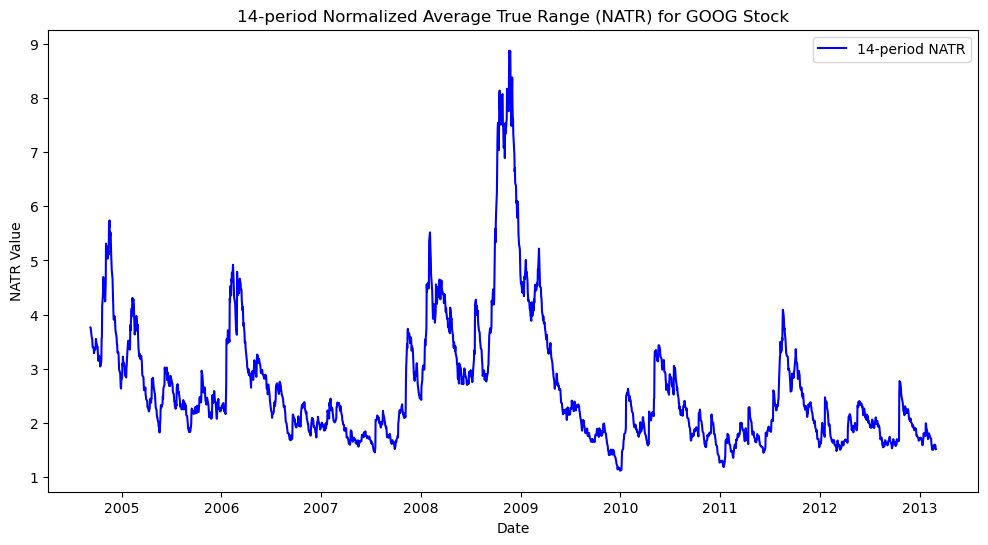

In [181]:
# Calculate the Normalized Average True Range (NATR)
timeperiod = 14
natr_values = talib.NATR(GOOG['High'], GOOG['Low'], GOOG['Close'], timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Normalized Average True Range (NATR)
plt.plot(GOOG.index, natr_values, label=f'{timeperiod}-period NATR', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Normalized Average True Range (NATR) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('NATR Value')

# Show the plot
plt.show()


In [85]:

class NatrStrategy(Strategy):
    natr_timeperiod = 14
    natr_threshold = 0.05
    
    def init(self):
        self.natr = self.I(talib.NATR, self.data.High, self.data.Low, self.data.Close, timeperiod=self.natr_timeperiod)

    def next(self):
        if self.natr[-1] > self.natr_threshold:
            if not self.position:
                self.buy()
        elif self.natr[-1] < self.natr_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, NatrStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.255121
Equity Final [$]                     74278.81
Equity Peak [$]                      75120.46
Return [%]                           642.7881
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   26.522718
Volatility (Ann.) [%]               44.385239
Sharpe Ratio                         0.597557
Sortino Ratio                        1.192681
Calmar Ratio                         0.406691
Max. Drawdown [%]                  -65.215909
Avg. Drawdown [%]                   -5.377584
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     648.194692
Worst Trade [%]                    648.194692
Avg. Trade [%]                    

34. **ADOSC (Accumulation/Distribution Oscillator):**

- *__Purpose__*: ADOSC calculates the Accumulation/Distribution Oscillator, which evaluates the flow of money into and out of an asset.
- *__Activation and Usage__*: Use the `talib.ADOSC` function in Python. Positive values indicate accumulation, while negative values indicate distribution.
- *__Strategy__*: ADOSC crossovers can signal potential shifts in market sentiment.
- *__Key Points__*: Combine ADOSC with other volume and price indicators for comprehensive analysis.
- *__Effective Conditions__*: ADOSC is valuable for assessing money flow dynamics.

In [ ]:
print(talib.ADOSC.__doc__)

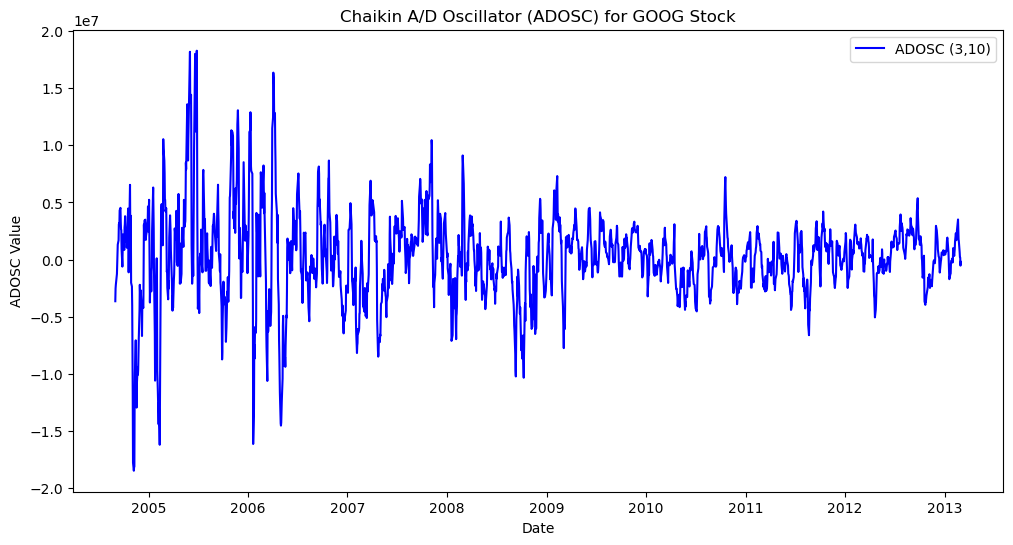

In [183]:
# Calculate the Chaikin A/D Oscillator (ADOSC)
fastperiod = 3
slowperiod = 10
adosc_values = talib.ADOSC(GOOG['High'], GOOG['Low'], GOOG['Close'], GOOG['Volume'], fastperiod, slowperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Chaikin A/D Oscillator (ADOSC)
plt.plot(GOOG.index, adosc_values, label=f'ADOSC ({fastperiod},{slowperiod})', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'Chaikin A/D Oscillator (ADOSC) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('ADOSC Value')

# Show the plot
plt.show()


In [87]:
class AdoscStrategy(Strategy):
    adosc_fast_period = 3
    adosc_slow_period = 10
    adosc_threshold = 0
    
    def init(self):
        self.adosc = self.I(talib.ADOSC, GOOG['High'], GOOG['Low'], GOOG['Close'], GOOG['Volume'],
                            fastperiod=self.adosc_fast_period, slowperiod=self.adosc_slow_period)

    def next(self):
        if self.adosc[-1] > self.adosc_threshold:
            if not self.position:
                self.buy()
        elif self.adosc[-1] < self.adosc_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AdoscStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    60.47486
Equity Final [$]                     29134.03
Equity Peak [$]                      30666.34
Return [%]                           191.3403
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    13.36598
Volatility (Ann.) [%]               25.714628
Sharpe Ratio                         0.519781
Sortino Ratio                        0.897414
Calmar Ratio                         0.274079
Max. Drawdown [%]                  -48.766922
Avg. Drawdown [%]                   -6.451463
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration      124 days 00:00:00
# Trades                                  122
Win Rate [%]                        40.983607
Best Trade [%]                      31.261005
Worst Trade [%]                    -15.258915
Avg. Trade [%]                    

35. **TRIMA (Triangular Moving Average):**

- *__Purpose__*: TRIMA smoothes out price data using a triangular weighted moving average.
- *__Activation and Usage__*: Use the `talib.TRIMA` function in Python. TRIMA aims to reduce lag compared to other moving averages.
- *__Strategy__*: TRIMA can help identify trends with reduced lag.
- *__Key Points__*: Experiment with different types of moving averages to optimize your strategy.
- *__Effective Conditions__*: TRIMA is useful for trend-following strategies with reduced lag.

In [ ]:
print(talib.TRIMA.__doc__)

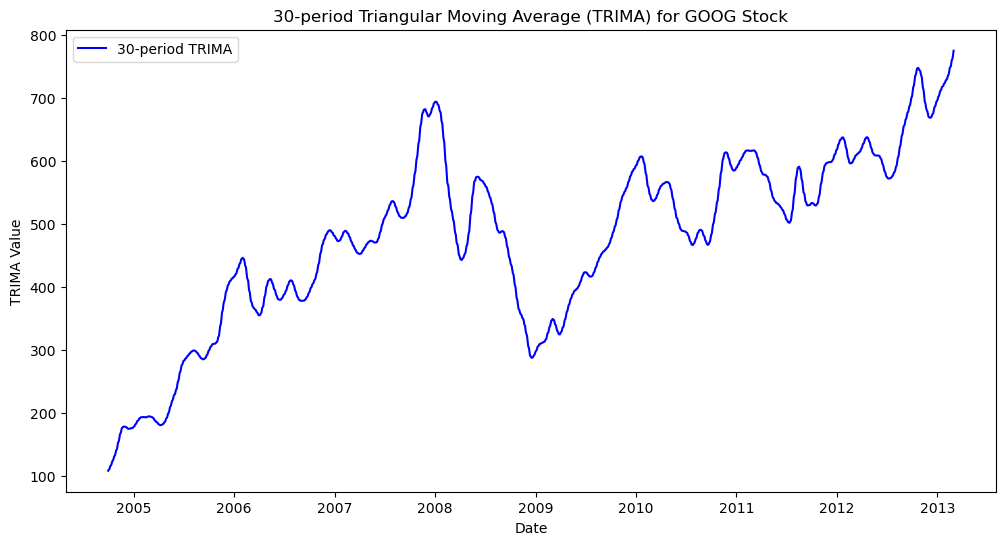

In [184]:
# Calculate the Triangular Moving Average (TRIMA)
timeperiod = 30
trima_values = talib.TRIMA(GOOG['Close'], timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Triangular Moving Average (TRIMA)
plt.plot(GOOG.index, trima_values, label=f'{timeperiod}-period TRIMA', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Triangular Moving Average (TRIMA) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('TRIMA Value')

# Show the plot
plt.show()


In [88]:
class TrimaStrategy(Strategy):
    trima_timeperiod = 14
    trima_threshold = 0
    
    def init(self):
        self.trima = self.I(talib.TRIMA, self.data.Close, timeperiod=self.trima_timeperiod)

    def next(self):
        if self.trima[-1] > self.trima_threshold:
            if not self.position:
                self.buy()
        elif self.trima[-1] < self.trima_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, TrimaStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

36. **LINEARREG (Linear Regression):**

- *__Purpose__*: LINEARREG calculates the linear regression of price data.
- *__Activation and Usage__*: Use the `talib.LINEARREG` function in Python. It calculates the linear regression line.
- *__Strategy__*: LINEARREG can help identify trends and potential reversals.
- *__Key Points__*: Combine LINEARREG with other trend-following indicators for confirmation.
- *__Effective Conditions__*: LINEARREG is valuable for assessing linear trends.

In [ ]:
print(talib.LINEARREG.__doc__)

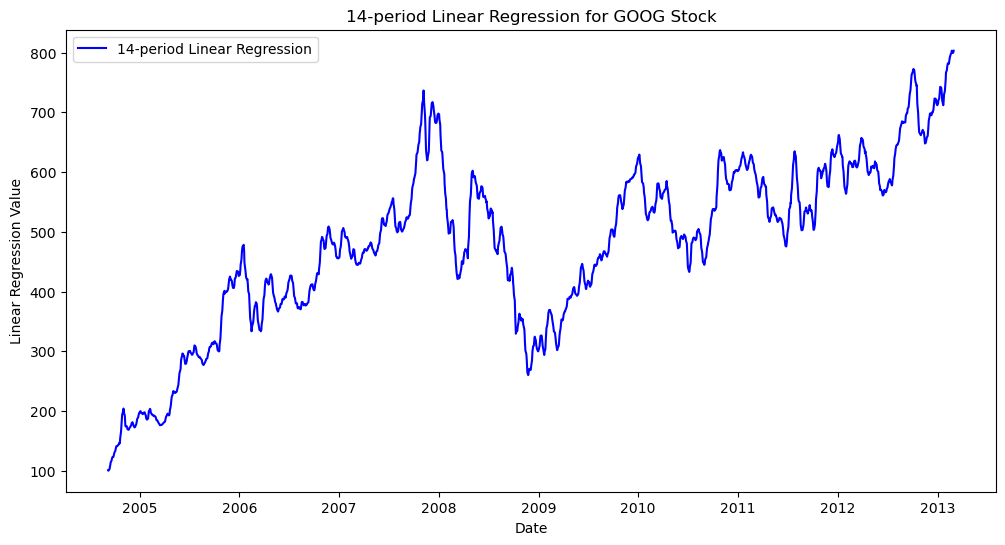

In [185]:
# Calculate the Linear Regression
timeperiod = 14
linearreg_values = talib.LINEARREG(GOOG['Close'], timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Linear Regression
plt.plot(GOOG.index, linearreg_values, label=f'{timeperiod}-period Linear Regression', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period Linear Regression for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Linear Regression Value')

# Show the plot
plt.show()


In [89]:

class LinearRegStrategy(Strategy):
    linearreg_timeperiod = 14
    linearreg_threshold = 0
    
    def init(self):
        self.linearreg = self.I(talib.LINEARREG, self.data.Close, timeperiod=self.linearreg_timeperiod)

    def next(self):
        if self.linearreg[-1] > self.linearreg_threshold:
            if not self.position:
                self.buy()
        elif self.linearreg[-1] < self.linearreg_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, LinearRegStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

37. **TRIX (Triple Exponential Moving Average Oscillator):**

- *__Purpose__*: TRIX calculates the rate of change of a Triple Exponential Moving Average (TEMA).
- *__Activation and Usage__*: Use the `talib.TRIX` function in Python. TRIX helps identify potential trend reversals.
- *__Strategy__*: TRIX crossovers and divergences can signal potential trend changes.
- *__Key Points__*: Combine TRIX with TEMA and other indicators for comprehensive analysis.
- *__Effective Conditions__*: TRIX is useful for assessing momentum in a smoother manner.

In [ ]:
print(talib.TRIX.__doc__)

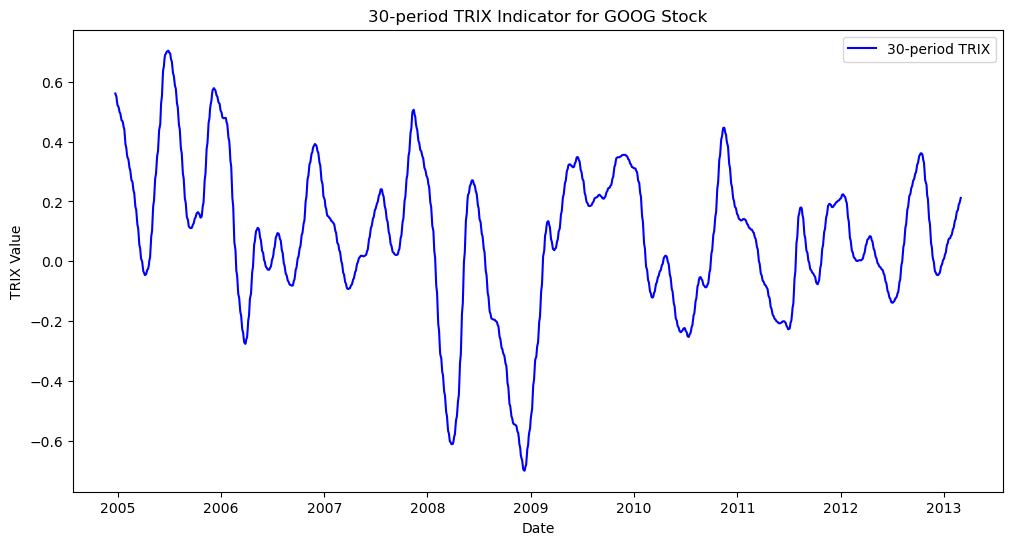

In [186]:
# Calculate the TRIX indicator
timeperiod = 30
trix_values = talib.TRIX(GOOG['Close'], timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the TRIX indicator
plt.plot(GOOG.index, trix_values, label=f'{timeperiod}-period TRIX', color='blue')

# Add legend
plt.legend()

# Add title and labels
plt.title(f'{timeperiod}-period TRIX Indicator for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('TRIX Value')

# Show the plot
plt.show()


In [90]:
class TrixStrategy(Strategy):
    trix_timeperiod = 14
    trix_threshold = 0
    
    def init(self):
        self.trix = self.I(talib.TRIX, self.data.Close, timeperiod=self.trix_timeperiod)

    def next(self):
        if self.trix[-1] > self.trix_threshold:
            if not self.position:
                self.buy()
        elif self.trix[-1] < self.trix_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, TrixStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   60.195531
Equity Final [$]                     41164.13
Equity Peak [$]                      43270.22
Return [%]                           311.6413
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   18.057723
Volatility (Ann.) [%]               29.224031
Sharpe Ratio                         0.617907
Sortino Ratio                        1.143892
Calmar Ratio                          0.57761
Max. Drawdown [%]                  -31.262841
Avg. Drawdown [%]                   -5.256868
Max. Drawdown Duration     1152 days 00:00:00
Avg. Drawdown Duration       65 days 00:00:00
# Trades                                   23
Win Rate [%]                        56.521739
Best Trade [%]                      49.790665
Worst Trade [%]                     -9.208721
Avg. Trade [%]                    

38. **CDLEVENINGSTAR (Evening Star Candlestick Pattern):**

- *__Purpose__*: CDLEVENINGSTAR identifies the Evening Star candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLEVENINGSTAR` function in Python. The Evening Star pattern involves a series of candles indicating a potential top.
- *__Strategy__*: The Evening Star pattern can signal potential trend changes when found after an uptrend.
- *__Key Points__*: Combine CDLEVENINGSTAR with other candlestick patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLEVENINGSTAR can be useful for identifying potential reversals.

In [ ]:
print(talib.CDLEVENINGSTAR.__doc__)

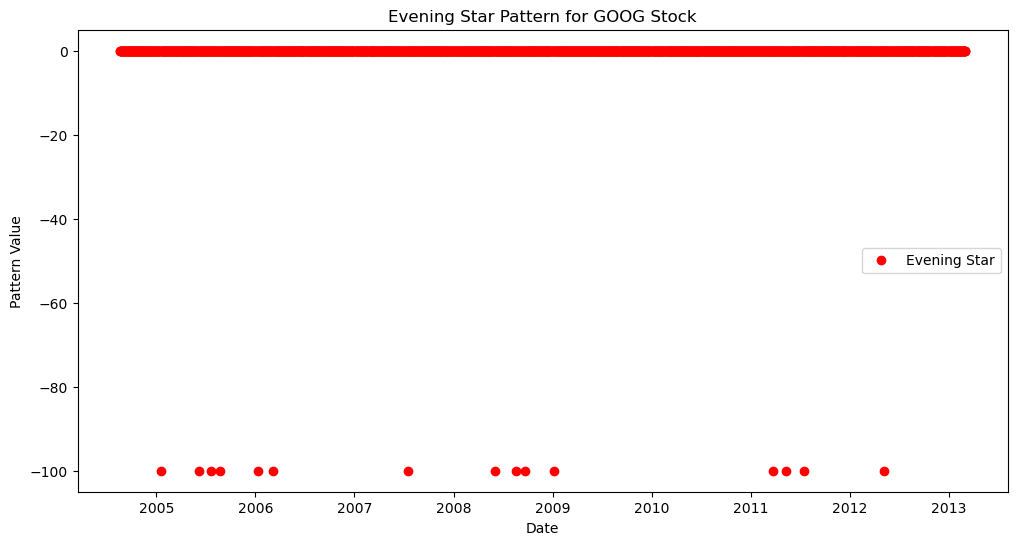

In [187]:
# Calculate the Evening Star pattern
evening_star_pattern = talib.CDLEVENINGSTAR(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'], penetration=0.3)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Evening Star pattern
plt.plot(GOOG.index, evening_star_pattern, label='Evening Star', color='red', marker='o', linestyle='None')

# Add legend
plt.legend()

# Add title and labels
plt.title('Evening Star Pattern for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Value')

# Show the plot
plt.show()


In [91]:
class EveningStarStrategy(Strategy):
    def init(self):
        self.evening_star_pattern = self.I(talib.CDLEVENINGSTAR, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.evening_star_pattern[-1] > 0:
            if not self.position:
                self.sell()
        elif self.evening_star_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, EveningStarStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

39. **MAMA (MESA Adaptive Moving Average):**

- *__Purpose__*: MAMA adapts to price movements, aiming to provide smoother and more responsive moving averages.
- *__Activation and Usage__*: Use the `talib.MAMA` function in Python. MAMA generates both the MAMA and FAMA moving averages.
- *__Strategy__*: MAMA can help identify trends with reduced lag and noise.
- *__Key Points__*: Experiment with MAMA in different market conditions to assess its effectiveness.
- *__Effective Conditions__*: MAMA is useful for capturing trends with adaptability to different market phases.

In [99]:
print(talib.MAMA.__doc__)

 MAMA(real[, fastlimit=?, slowlimit=?])

    MESA Adaptive Moving Average (Overlap Studies)

    Inputs:
        real: (any ndarray)
    Parameters:
        fastlimit: 0.5
        slowlimit: 0.05
    Outputs:
        mama
        fama
    


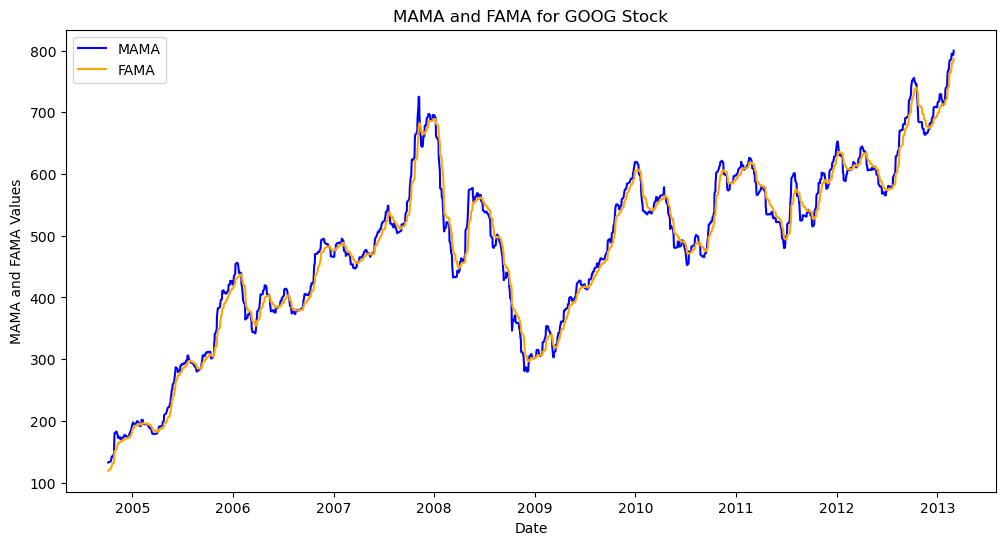

In [188]:
# Calculate the MAMA and FAMA
mama, fama = talib.MAMA(GOOG['Close'], fastlimit=0.5, slowlimit=0.05)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the MAMA and FAMA
plt.plot(GOOG.index, mama, label='MAMA', color='blue')
plt.plot(GOOG.index, fama, label='FAMA', color='orange')

# Add legend
plt.legend()

# Add title and labels
plt.title('MAMA and FAMA for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('MAMA and FAMA Values')

# Show the plot
plt.show()


In [92]:
class MamaStrategy(Strategy):
    fast_limit = 0.5
    slow_limit = 0.05
    
    def init(self):
        self.mama, self.fama = self.I(talib.MAMA, self.data.Close, fastlimit=self.fast_limit, slowlimit=self.slow_limit)

    def next(self):
        if self.mama[-1] > self.fama[-1] and self.mama[-2] <= self.fama[-2]:
            if not self.position:
                self.buy()
        elif self.mama[-1] < self.fama[-1] and self.mama[-2] >= self.fama[-2]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MamaStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    57.26257
Equity Final [$]                     52728.28
Equity Peak [$]                      53325.58
Return [%]                           427.2828
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   21.537144
Volatility (Ann.) [%]               26.810941
Sharpe Ratio                         0.803297
Sortino Ratio                        1.569845
Calmar Ratio                         0.794329
Max. Drawdown [%]                  -27.113634
Avg. Drawdown [%]                   -4.192116
Max. Drawdown Duration      576 days 00:00:00
Avg. Drawdown Duration       49 days 00:00:00
# Trades                                   39
Win Rate [%]                        51.282051
Best Trade [%]                      55.329463
Worst Trade [%]                     -9.594614
Avg. Trade [%]                    

40. **CDLCONCEALBABYSWALL (Concealing Baby Swallow Candlestick Pattern):**

- *__Purpose__*: CDLCONCEALBABYSWALL identifies the Concealing Baby Swallow candlestick pattern, which may indicate a continuation of the current trend.
- *__Activation and Usage__*: Use the `talib.CDLCONCEALBABYSWALL` function in Python. This pattern involves a series of candles indicating a potential continuation pattern.
- *__Strategy__*: The Concealing Baby Swallow pattern suggests that the current trend might continue after a brief consolidation.
- *__Key Points__*: Combine CDLCONCEALBABYSWALL with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLCONCEALBABYSWALL can help identify potential continuation patterns.

In [189]:
print(talib.CDLCONCEALBABYSWALL.__doc__)

 CDLCONCEALBABYSWALL(open, high, low, close)

    Concealing Baby Swallow (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


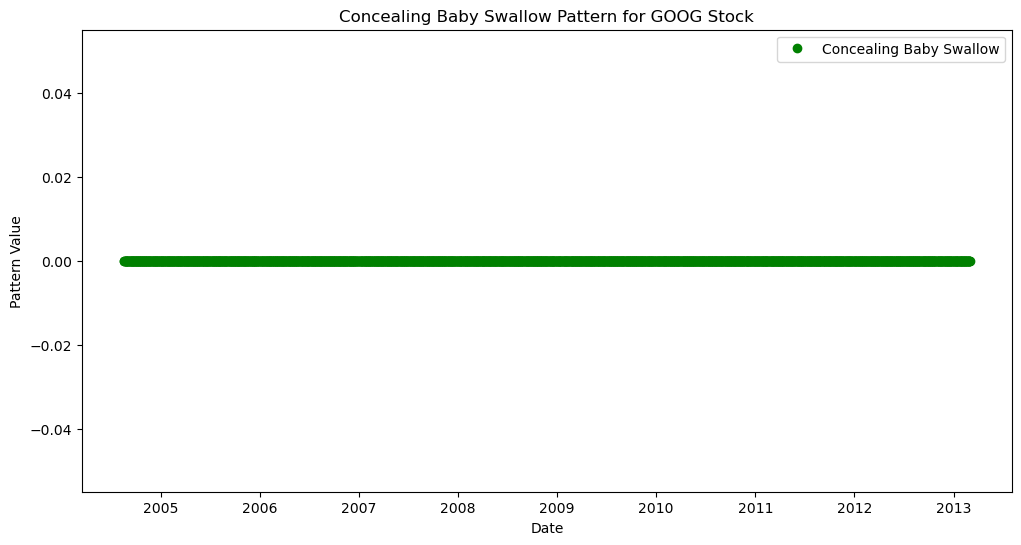

In [190]:
# Calculate the Concealing Baby Swallow pattern
concealing_baby_swallow = talib.CDLCONCEALBABYSWALL(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Concealing Baby Swallow pattern
plt.plot(GOOG.index, concealing_baby_swallow, label='Concealing Baby Swallow', color='green', marker='o', linestyle='')

# Add legend
plt.legend()

# Add title and labels
plt.title('Concealing Baby Swallow Pattern for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Value')

# Show the plot
plt.show()


41. **CDLTRISTAR (Tristar Candlestick Pattern):**

- *__Purpose__*: CDLTRISTAR identifies the Tristar candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLTRISTAR` function in Python. The Tristar pattern consists of three candles indicating a possible reversal.
- *__Strategy__*: The Tristar pattern indicates indecision in the market and may signal a trend change.
- *__Key Points__*: Combine CDLTRISTAR with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLTRISTAR can help identify potential trend reversals.

In [98]:
print(talib.CDLTRISTAR.__doc__)

 CDLTRISTAR(open, high, low, close)

    Tristar Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


42. **CDLLADDERBOTTOM (Ladder Bottom Candlestick Pattern):**

- *__Purpose__*: CDLLADDERBOTTOM identifies the Ladder Bottom candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLLADDERBOTTOM` function in Python. The Ladder Bottom pattern consists of a series of candles indicating a potential reversal.
- *__Strategy__*: The Ladder Bottom pattern suggests a bullish reversal after a downtrend.
- *__Key Points__*: Combine CDLLADDERBOTTOM with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLLADDERBOTTOM can help identify potential bullish reversals.

In [97]:
print(talib.CDLLADDERBOTTOM.__doc__)

 CDLLADDERBOTTOM(open, high, low, close)

    Ladder Bottom (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


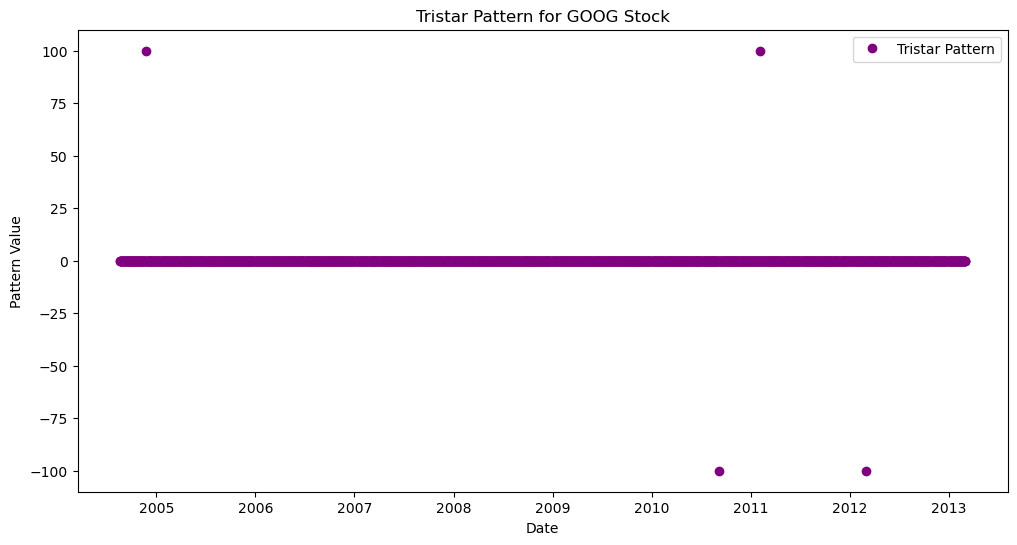

In [191]:
# Calculate the Tristar Pattern
tristar_pattern = talib.CDLTRISTAR(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Tristar Pattern
plt.plot(GOOG.index, tristar_pattern, label='Tristar Pattern', color='purple', marker='o', linestyle='')

# Add legend
plt.legend()

# Add title and labels
plt.title('Tristar Pattern for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Value')

# Show the plot
plt.show()


In [93]:
class LadderBottomStrategy(Strategy):
    def init(self):
        self.ladder_bottom_pattern = self.I(talib.CDLLADDERBOTTOM, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.ladder_bottom_pattern[-1] > 0:
            if not self.position:
                self.buy()
        elif self.ladder_bottom_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, LadderBottomStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   64.851024
Equity Final [$]                     15611.46
Equity Peak [$]                      15783.41
Return [%]                            56.1146
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    5.364544
Volatility (Ann.) [%]                28.16735
Sharpe Ratio                         0.190453
Sortino Ratio                        0.300351
Calmar Ratio                         0.084801
Max. Drawdown [%]                  -63.260323
Avg. Drawdown [%]                   -5.061938
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration      105 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      58.778808
Worst Trade [%]                     58.778808
Avg. Trade [%]                    

43. **CDLTASUKIGAP (Tasuki Gap Candlestick Pattern):**

- *__Purpose__*: CDLTASUKIGAP identifies the Tasuki Gap candlestick pattern, which suggests a potential continuation or reversal of the current trend.
- *__Activation and Usage__*: Use the `talib.CDLTASUKIGAP` function in Python. The Tasuki Gap pattern involves a series of candles with a gap indicating a potential continuation or reversal.
- *__Strategy__*: The Tasuki Gap pattern might indicate a potential pause in the trend or a reversal.
- *__Key Points__*: Combine CDLTASUKIGAP with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLTASUKIGAP can help identify potential trend continuation or reversal.

In [96]:
print(talib.CDLTASUKIGAP.__doc__)

 CDLTASUKIGAP(open, high, low, close)

    Tasuki Gap (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


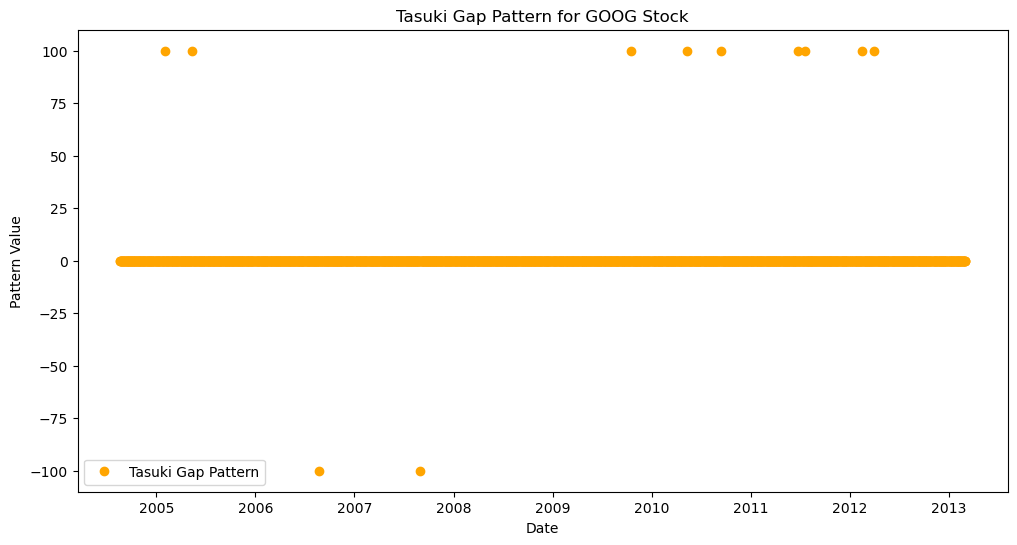

In [192]:
# Calculate the Tasuki Gap pattern
tasuki_gap_pattern = talib.CDLTASUKIGAP(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Tasuki Gap pattern
plt.plot(GOOG.index, tasuki_gap_pattern, label='Tasuki Gap Pattern', color='orange', marker='o', linestyle='')

# Add legend
plt.legend()

# Add title and labels
plt.title('Tasuki Gap Pattern for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Value')

# Show the plot
plt.show()


44. **CDLENGULFING (Engulfing Candlestick Pattern):**

- *__Purpose__*: CDLENGULFING identifies the Engulfing candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLENGULFING` function in Python. The Engulfing pattern consists of two candles, where the second engulfs the first.
- *__Strategy__*: The Engulfing pattern suggests a reversal when it appears after a trend.
- *__Key Points__*: Combine CDLENGULFING with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLENGULFING can help identify potential trend reversals.

In [95]:
print(talib.CDLENGULFING.__doc__)

 CDLENGULFING(open, high, low, close)

    Engulfing Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


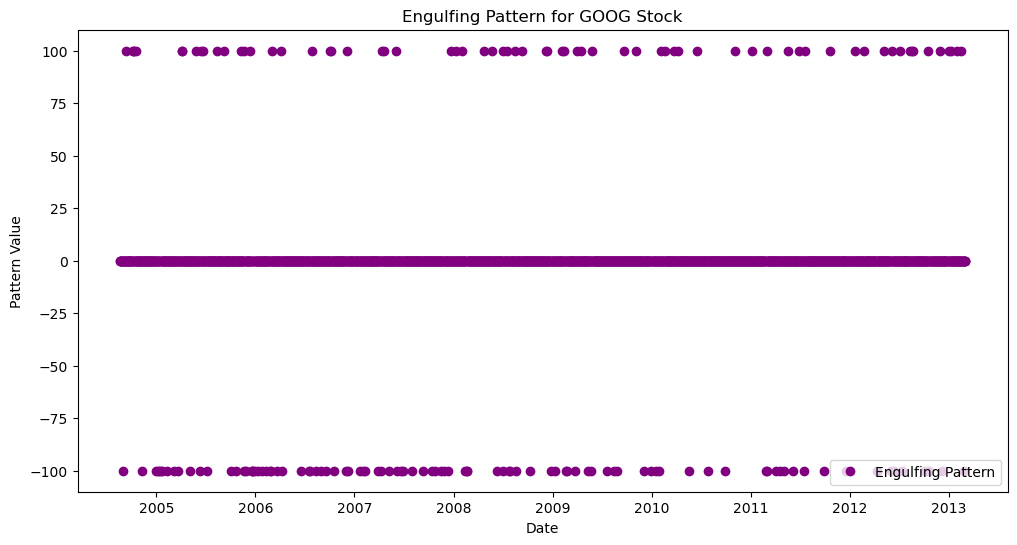

In [193]:
# Calculate the Engulfing pattern
engulfing_pattern = talib.CDLENGULFING(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Engulfing pattern
plt.plot(GOOG.index, engulfing_pattern, label='Engulfing Pattern', color='purple', marker='o', linestyle='')

# Add legend
plt.legend()

# Add title and labels
plt.title('Engulfing Pattern for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Value')

# Show the plot
plt.show()


In [94]:
class EngulfingPatternStrategy(Strategy):
    def init(self):
        self.engulfing_pattern = self.I(talib.CDLENGULFING, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.engulfing_pattern[-1] > 0:
            if not self.position:
                self.buy()
        elif self.engulfing_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, EngulfingPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   44.134078
Equity Final [$]                     15666.23
Equity Peak [$]                      25126.81
Return [%]                            56.6623
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    5.407844
Volatility (Ann.) [%]               22.592249
Sharpe Ratio                         0.239367
Sortino Ratio                        0.365401
Calmar Ratio                         0.090087
Max. Drawdown [%]                  -60.029069
Avg. Drawdown [%]                   -5.925084
Max. Drawdown Duration     2632 days 00:00:00
Avg. Drawdown Duration      146 days 00:00:00
# Trades                                   41
Win Rate [%]                        46.341463
Best Trade [%]                      60.058145
Worst Trade [%]                    -27.207643
Avg. Trade [%]                    

45. **CDLHAMMER (Hammer Candlestick Pattern):**

- *__Purpose__*: CDLHAMMER identifies the Hammer candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLHAMMER` function in Python. The Hammer pattern consists of a candle with a small body and a long lower shadow.
- *__Strategy__*: The Hammer pattern suggests a bullish reversal when it appears after a downtrend.
- *__Key Points__*: Combine CDLHAMMER with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLHAMMER can help identify potential bullish reversals.

In [94]:
print(talib.CDLHAMMER.__doc__)

 CDLHAMMER(open, high, low, close)

    Hammer (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


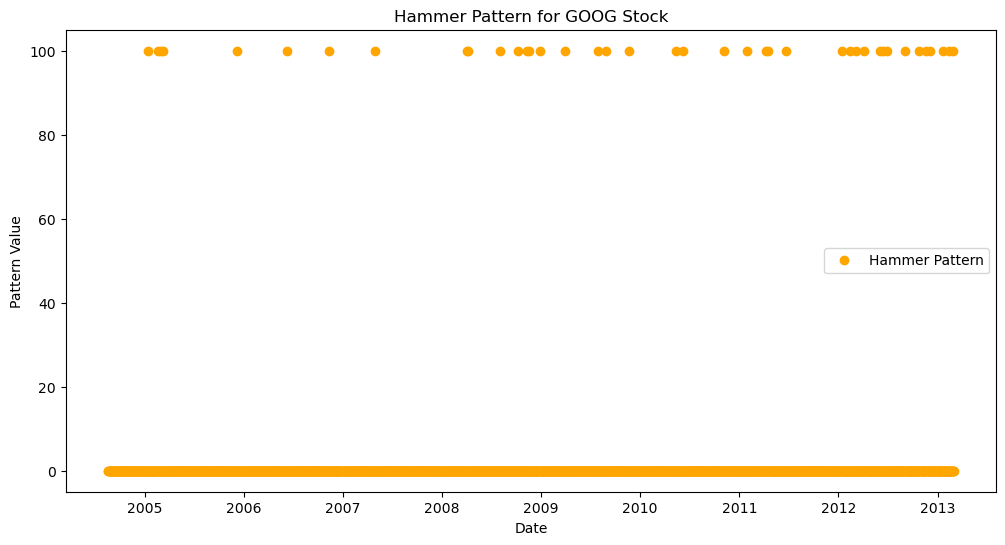

In [194]:
# Calculate the Hammer pattern
hammer_pattern = talib.CDLHAMMER(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Hammer pattern
plt.plot(GOOG.index, hammer_pattern, label='Hammer Pattern', color='orange', marker='o', linestyle='')

# Add legend
plt.legend()

# Add title and labels
plt.title('Hammer Pattern for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Value')

# Show the plot
plt.show()


In [95]:
class HammerPatternStrategy(Strategy):
    def init(self):
        self.hammer_pattern = self.I(talib.CDLHAMMER, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.hammer_pattern[-1] > 0:
            if not self.position:
                self.buy()
        elif self.hammer_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, HammerPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   95.251397
Equity Final [$]                     40723.42
Equity Peak [$]                      41184.97
Return [%]                           307.2342
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   17.908733
Volatility (Ann.) [%]               39.249282
Sharpe Ratio                         0.456282
Sortino Ratio                        0.829372
Calmar Ratio                         0.274533
Max. Drawdown [%]                   -65.23334
Avg. Drawdown [%]                   -5.621385
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       66 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      308.33248
Worst Trade [%]                     308.33248
Avg. Trade [%]                    

46. **PLUS_DM (Plus Directional Movement):**

- *__Purpose__*: PLUS_DM measures the upward price movement within a specified period.
- *__Activation and Usage__*: Use the `talib.PLUS_DM` function in Python. It helps identify the strength of upward price movements.
- *__Strategy__*: PLUS_DM can help assess the strength of upward price movements and potential trends.
- *__Key Points__*: Combine PLUS_DM with MINUS_DM and ADX to evaluate trend strength.
- *__Effective Conditions__*: PLUS_DM is valuable for assessing upward price momentum.

In [93]:
print(talib.PLUS_DM.__doc__)

 PLUS_DM(high, low[, timeperiod=?])

    Plus Directional Movement (Momentum Indicators)

    Inputs:
        prices: ['high', 'low']
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


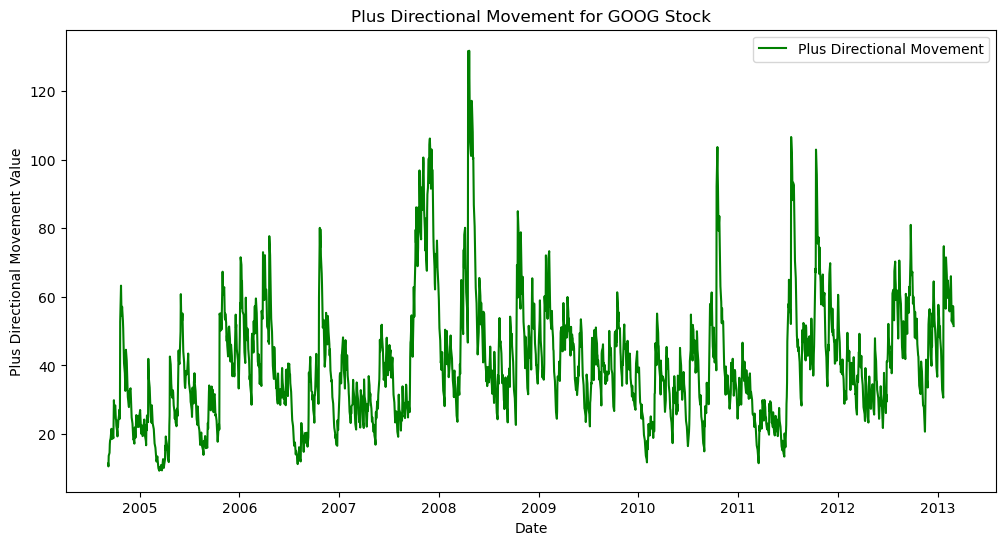

In [195]:
# Calculate the Plus Directional Movement
plus_dm = talib.PLUS_DM(GOOG['High'], GOOG['Low'], timeperiod=14)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Plus Directional Movement
plt.plot(GOOG.index, plus_dm, label='Plus Directional Movement', color='green')

# Add legend
plt.legend()

# Add title and labels
plt.title('Plus Directional Movement for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Plus Directional Movement Value')

# Show the plot
plt.show()


In [96]:
class PlusDMStrategy(Strategy):
    plus_dm_timeperiod = 14
    plus_dm_threshold = 30
    
    def init(self):
        self.plus_dm = self.I(talib.PLUS_DM, self.data.High, self.data.Low, timeperiod=self.plus_dm_timeperiod)

    def next(self):
        if self.plus_dm[-1] > self.plus_dm_threshold:
            if not self.position:
                self.buy()
        elif self.plus_dm[-1] < self.plus_dm_threshold:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, PlusDMStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   73.789572
Equity Final [$]                     12277.09
Equity Peak [$]                      15001.94
Return [%]                            22.7709
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    2.435983
Volatility (Ann.) [%]               29.642084
Sharpe Ratio                          0.08218
Sortino Ratio                        0.122914
Calmar Ratio                         0.034497
Max. Drawdown [%]                  -70.613867
Avg. Drawdown [%]                  -11.115112
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration      217 days 00:00:00
# Trades                                   74
Win Rate [%]                        55.405405
Best Trade [%]                      30.906343
Worst Trade [%]                     -24.35241
Avg. Trade [%]                    

47. **CDLMARUBOZU (Marubozu Candlestick Pattern):**

- *__Purpose__*: CDLMARUBOZU identifies the Marubozu candlestick pattern, which suggests a potential trend continuation or reversal.
- *__Activation and Usage__*: Use the `talib.CDLMARUBOZU` function in Python. The Marubozu pattern consists of candles with minimal or no shadows.
- *__Strategy__*: The Marubozu pattern can suggest a continuation or reversal, depending on its appearance.
- *__Key Points__*: Combine CDLMARUBOZU with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLMARUBOZU can help identify potential trend continuation or reversal.

In [92]:
print(talib.CDLMARUBOZU.__doc__)

 CDLMARUBOZU(open, high, low, close)

    Marubozu (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


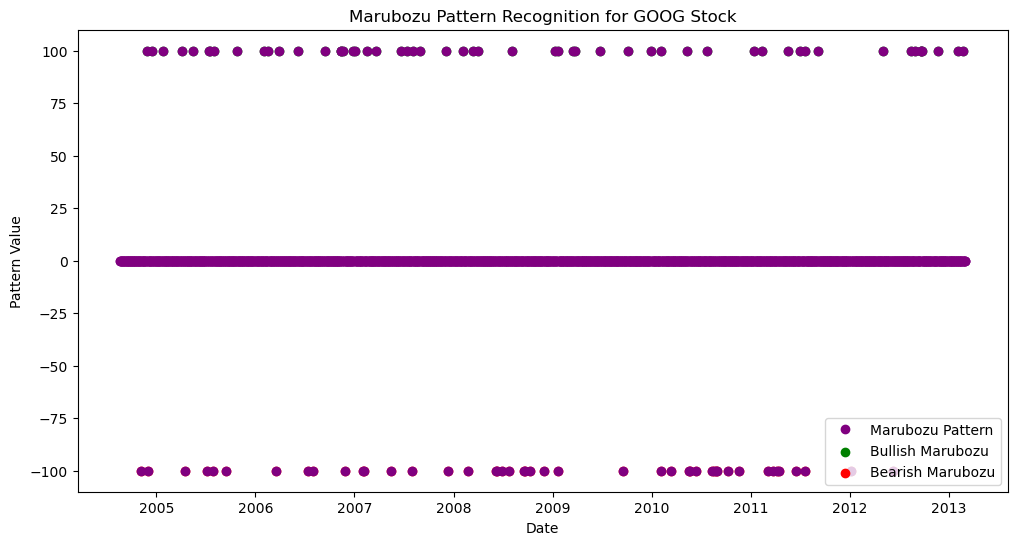

In [196]:
# Identify the Marubozu pattern
marubozu_pattern = talib.CDLMARUBOZU(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Marubozu pattern
plt.plot(GOOG.index, marubozu_pattern, label='Marubozu Pattern', color='purple', marker='o', linestyle='None')

# Highlight the bullish (100) and bearish (-100) patterns
plt.scatter(GOOG.index[marubozu_pattern == 100], [100] * len(marubozu_pattern[marubozu_pattern == 100]), color='green', label='Bullish Marubozu')
plt.scatter(GOOG.index[marubozu_pattern == -100], [-100] * len(marubozu_pattern[marubozu_pattern == -100]), color='red', label='Bearish Marubozu')

# Add legend
plt.legend()

# Add title and labels
plt.title('Marubozu Pattern Recognition for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Value')

# Show the plot
plt.show()


In [97]:
class MarubozuPatternStrategy(Strategy):
    def init(self):
        self.marubozu_pattern = self.I(talib.CDLMARUBOZU, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.marubozu_pattern[-1] > 0:
            if not self.position:
                self.buy()
        elif self.marubozu_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MarubozuPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.918063
Equity Final [$]                     36732.32
Equity Peak [$]                      37698.12
Return [%]                           267.3232
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   16.490522
Volatility (Ann.) [%]               28.632073
Sharpe Ratio                         0.575946
Sortino Ratio                        1.052465
Calmar Ratio                         0.470725
Max. Drawdown [%]                  -35.032198
Avg. Drawdown [%]                   -5.266618
Max. Drawdown Duration     1152 days 00:00:00
Avg. Drawdown Duration       57 days 00:00:00
# Trades                                   26
Win Rate [%]                             50.0
Best Trade [%]                      63.649175
Worst Trade [%]                    -11.954198
Avg. Trade [%]                    

48. **CDLKICKING (Kicking Candlestick Pattern):**

- *__Purpose__*: CDLKICKING identifies the Kicking candlestick pattern, which suggests a sudden and strong reversal in the opposite direction.
- *__Activation and Usage__*: Use the `talib.CDLKICKING` function in Python. The Kicking pattern involves a gap between two consecutive candles.
- *__Strategy__*: The Kicking pattern indicates a rapid and strong reversal, signaling a shift in sentiment.
- *__Key Points__*: Combine CDLKICKING with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLKICKING can help identify potential strong trend reversals.

In [91]:
print(talib.CDLKICKING.__doc__)

 CDLKICKING(open, high, low, close)

    Kicking (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [ ]:
# Identify the Kicking pattern
kicking_pattern = talib.CDLKICKING(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Kicking pattern
plt.plot(GOOG.index, kicking_pattern, label='Kicking Pattern', color='purple', marker='o', linestyle='None')

# Highlight the bullish (100) and bearish (-100) patterns
plt.scatter(GOOG.index[kicking_pattern == 100], [100] * len(kicking_pattern[kicking_pattern == 100]), color='green', label='Bullish Kicking')
plt.scatter(GOOG.index[kicking_pattern == -100], [-100] * len(kicking_pattern[kicking_pattern == -100]), color='red', label='Bearish Kicking')

# Add legend
plt.legend()

# Add title and labels
plt.title('Kicking Pattern Recognition for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Value')

# Show the plot
plt.show()


49. **CDL2CROWS (Two Crows Candlestick Pattern):**

- *__Purpose__*: CDL2CROWS identifies the Two Crows candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDL2CROWS` function in Python. The Two Crows pattern involves three candles indicating a potential reversal.
- *__Strategy__*: The Two Crows pattern suggests a bearish reversal when it appears after an uptrend.
- *__Key Points__*: Combine CDL2CROWS with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDL2CROWS can help identify potential bearish reversals.

In [90]:
print(talib.CDL2CROWS.__doc__)

 CDL2CROWS(open, high, low, close)

    Two Crows (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


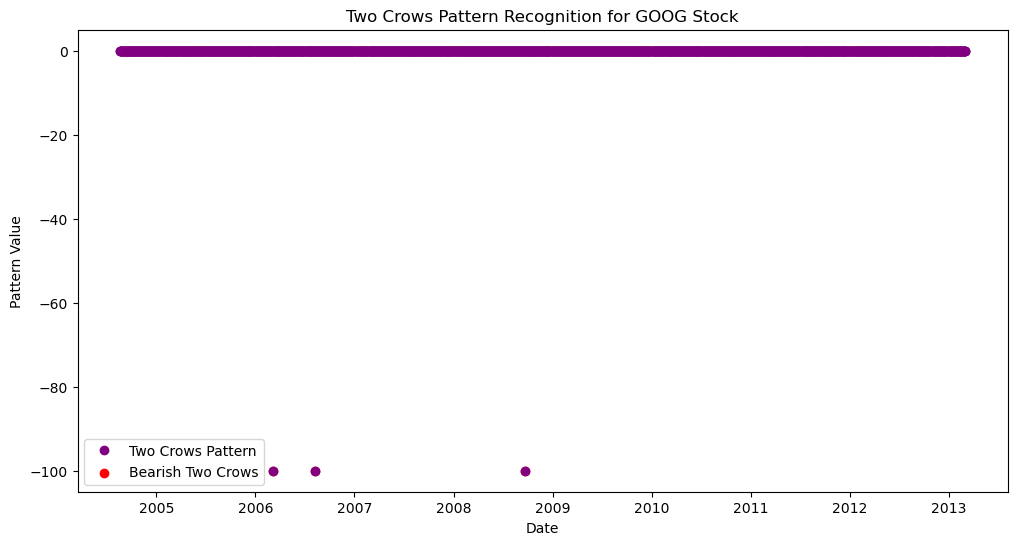

In [197]:
two_crows_pattern = talib.CDL2CROWS(GOOG['Open'], GOOG['High'], GOOG['Low'], GOOG['Close'])

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Two Crows pattern
plt.plot(GOOG.index, two_crows_pattern, label='Two Crows Pattern', color='purple', marker='o', linestyle='None')

# Highlight the bearish (-100) patterns
plt.scatter(GOOG.index[two_crows_pattern == -100], [-100] * len(two_crows_pattern[two_crows_pattern == -100]), color='red', label='Bearish Two Crows')

# Add legend
plt.legend()

# Add title and labels
plt.title('Two Crows Pattern Recognition for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Pattern Value')

# Show the plot
plt.show()

In [98]:
class KickingPatternStrategy(Strategy):
    def init(self):
        self.kicking_pattern = self.I(talib.CDLKICKING, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.kicking_pattern[-1] > 0:
            if not self.position:
                self.buy()
        elif self.kicking_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, KickingPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

50. **PPO (Percentage Price Oscillator):**

- *__Purpose__*: PPO calculates the percentage difference between two moving averages.
- *__Activation and Usage__*: Use the `talib.PPO` function in Python. PPO helps assess the percentage difference between short-term and long-term moving averages.
- *__Strategy__*: PPO crossovers can signal potential trend changes.
- *__Key Points__*: Combine PPO with other trend-following indicators for confirmation.
- *__Effective Conditions__*: PPO is useful for assessing the momentum and direction of price movements.

In [89]:
print(talib.PPO.__doc__)

 PPO(real[, fastperiod=?, slowperiod=?, matype=?])

    Percentage Price Oscillator (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        slowperiod: 26
        matype: 0 (Simple Moving Average)
    Outputs:
        real
    


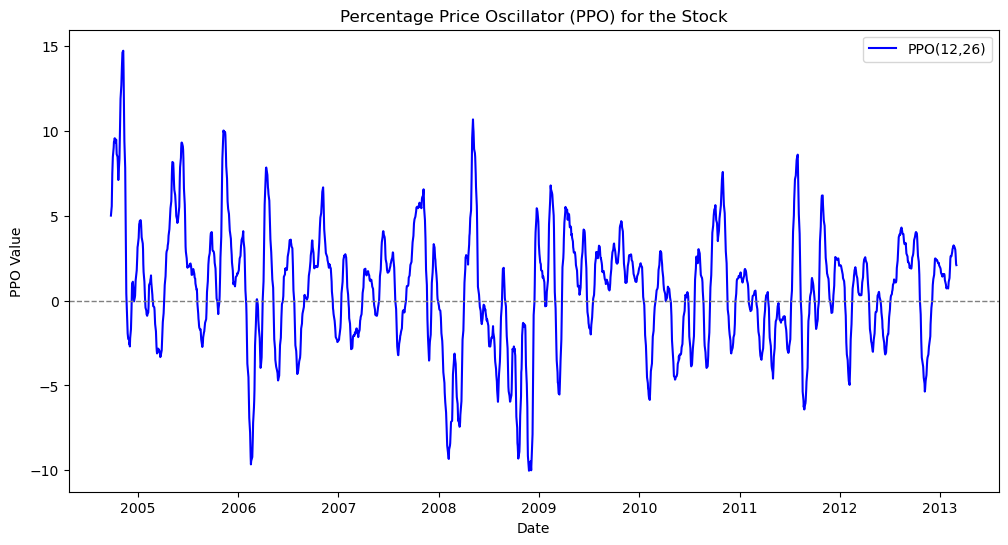

In [198]:
fastperiod = 12
slowperiod = 26
matype = 0

# Calculate the Percentage Price Oscillator (PPO)
ppo = talib.PPO(close_prices, fastperiod=fastperiod, slowperiod=slowperiod, matype=matype)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the PPO line
plt.plot(ppo, label=f'PPO({fastperiod},{slowperiod})', color='blue')

# Add zero line for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Add legend
plt.legend()

# Add title and labels
plt.title(f'Percentage Price Oscillator (PPO) for the Stock')
plt.xlabel('Date')
plt.ylabel('PPO Value')

# Show the plot
plt.show()

51. **CDLADVANCEBLOCK (Advance Block Candlestick Pattern):**

- *__Purpose__*: CDLADVANCEBLOCK identifies the Advance Block candlestick pattern, which suggests weakening of an uptrend.
- *__Activation and Usage__*: Use the `talib.CDLADVANCEBLOCK` function in Python. The Advance Block pattern involves three candles indicating potential weakness.
- *__Strategy__*: The Advance Block pattern may signal a slowing uptrend.
- *__Key Points__*: Combine CDLADVANCEBLOCK with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLADVANCEBLOCK can help identify potential trend weakening.

In [88]:
print(talib.CDLADVANCEBLOCK.__doc__)

 CDLADVANCEBLOCK(open, high, low, close)

    Advance Block (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


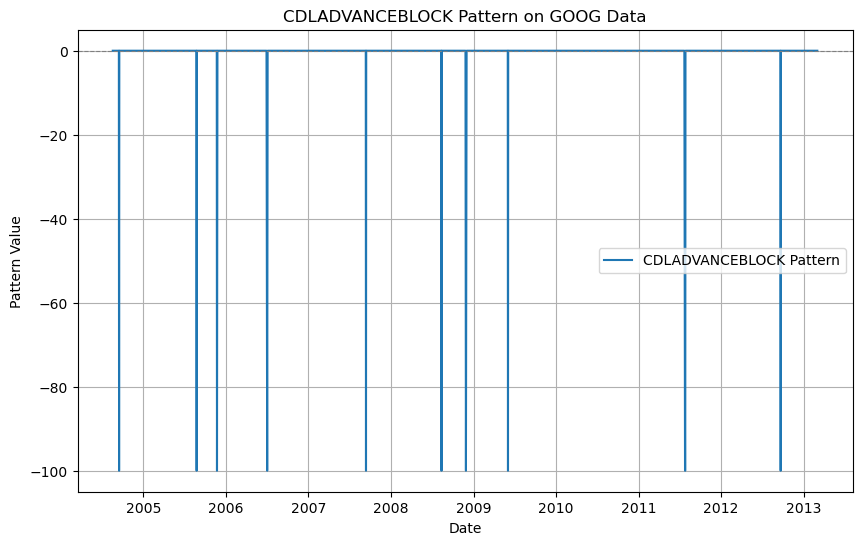

In [200]:
# Extract OHLC data from the GOOG DataFrame
ohlc_data = GOOG[['Open', 'High', 'Low', 'Close']]

# Calculate CDLADVANCEBLOCK pattern values
advance_block_pattern = talib.CDLADVANCEBLOCK(ohlc_data['Open'].values, ohlc_data['High'].values, ohlc_data['Low'].values, ohlc_data['Close'].values)

# Plot the CDLADVANCEBLOCK pattern
plt.figure(figsize=(10, 6))
plt.plot(ohlc_data.index, advance_block_pattern, label='CDLADVANCEBLOCK Pattern')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Zero line for reference
plt.title('CDLADVANCEBLOCK Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Pattern Value')
plt.legend()
plt.grid()
plt.show()

In [99]:
class AdvanceBlockPatternStrategy(Strategy):
    def init(self):
        self.advance_block_pattern = self.I(talib.CDLADVANCEBLOCK, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.advance_block_pattern[-1] > 0:
            if not self.position:
                self.buy()
        elif self.advance_block_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AdvanceBlockPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

52. **CDLHIGHWAVE (High-Wave Candlestick Pattern):**

- *__Purpose__*: CDLHIGHWAVE identifies the High-Wave candlestick pattern, which suggests uncertainty in the market.
- *__Activation and Usage__*: Use the `talib.CDLHIGHWAVE` function in Python. The High-Wave pattern involves candles with long upper and lower shadows.
- *__Strategy__*: The High-Wave pattern indicates indecision between buyers and sellers.
- *__Key Points__*: Combine CDLHIGHWAVE with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLHIGHWAVE can help identify potential periods of market uncertainty.

In [87]:
print(talib.CDLHIGHWAVE.__doc__)

 CDLHIGHWAVE(open, high, low, close)

    High-Wave Candle (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


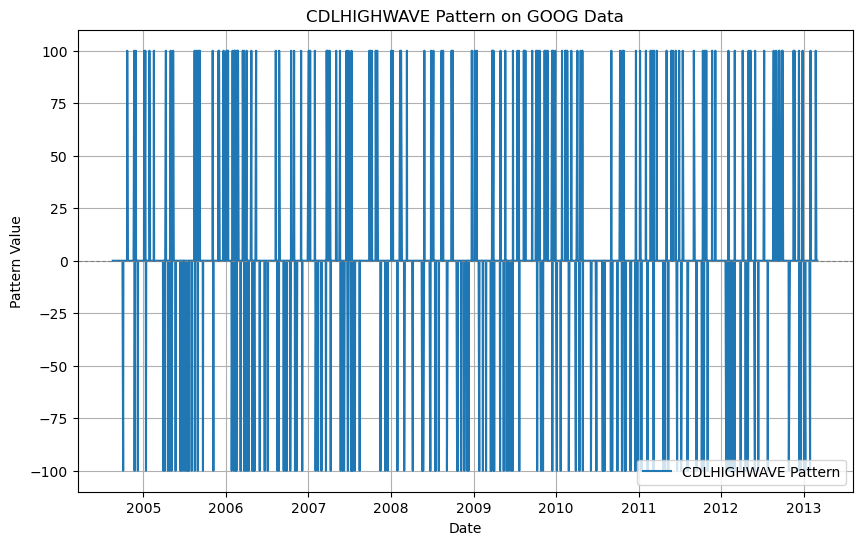

In [201]:

# Extract OHLC data from the GOOG DataFrame
ohlc_data = GOOG[['Open', 'High', 'Low', 'Close']]

# Calculate CDLHIGHWAVE pattern values
high_wave_pattern = talib.CDLHIGHWAVE(ohlc_data['Open'].values, ohlc_data['High'].values, ohlc_data['Low'].values, ohlc_data['Close'].values)

# Plot the CDLHIGHWAVE pattern
plt.figure(figsize=(10, 6))
plt.plot(ohlc_data.index, high_wave_pattern, label='CDLHIGHWAVE Pattern')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Zero line for reference
plt.title('CDLHIGHWAVE Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Pattern Value')
plt.legend()
plt.grid()
plt.show()

In [100]:

class HighWavePatternStrategy(Strategy):
    def init(self):
        self.high_wave_pattern = self.I(talib.CDLHIGHWAVE, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.high_wave_pattern[-1] > 0:
            if not self.position:
                self.buy()
        elif self.high_wave_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, HighWavePatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   47.718808
Equity Final [$]                     18438.57
Equity Peak [$]                      20380.81
Return [%]                            84.3857
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    7.442153
Volatility (Ann.) [%]               23.700727
Sharpe Ratio                         0.314005
Sortino Ratio                             0.5
Calmar Ratio                         0.130154
Max. Drawdown [%]                  -57.179425
Avg. Drawdown [%]                   -6.219897
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration      138 days 00:00:00
# Trades                                   77
Win Rate [%]                        62.337662
Best Trade [%]                      14.933796
Worst Trade [%]                    -20.697671
Avg. Trade [%]                    

53. **T3 (T3 Moving Average):**

- *__Purpose__*: T3 Moving Average aims to provide smoother and more responsive moving averages.
- *__Activation and Usage__*: Use the `talib.T3` function in Python. T3 Moving Average adapts to market conditions and reduces lag.
- *__Strategy__*: T3 can help identify trends with reduced lag and noise.
- *__Key Points__*: Experiment with T3 in different market conditions to assess its effectiveness.
- *__Effective Conditions__*: T3 is useful for trend-following strategies with adaptability.

In [86]:
print(talib.T3.__doc__)

 T3(real[, timeperiod=?, vfactor=?])

    Triple Exponential Moving Average (T3) (Overlap Studies)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 5
        vfactor: 0.7
    Outputs:
        real
    


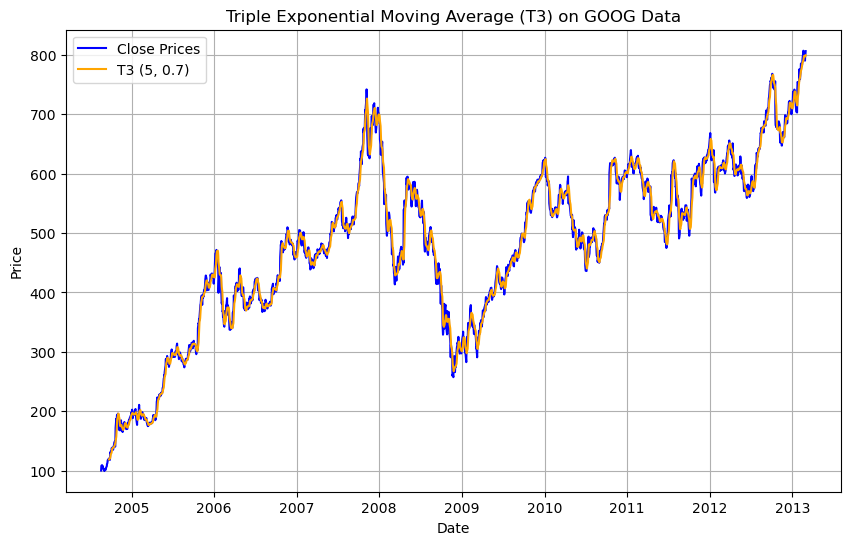

In [202]:
close_prices = GOOG['Close'].values

# Calculate the Triple Exponential Moving Average (T3)
t3_period = 5
t3_vfactor = 0.7
t3_values = talib.T3(close_prices, timeperiod=t3_period, vfactor=t3_vfactor)

# Plot the original 'Close' prices and the T3 values
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, close_prices, label='Close Prices', color='blue')
plt.plot(GOOG.index, t3_values, label=f'T3 ({t3_period}, {t3_vfactor})', color='orange')
plt.title(f'Triple Exponential Moving Average (T3) on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [101]:
class T3Strategy(Strategy):
    t3_timeperiod = 14
    
    def init(self):
        self.t3 = self.I(talib.T3, self.data.Close, timeperiod=self.t3_timeperiod)

    def next(self):
        if self.t3[-1] > self.data.Close[-1]:
            if not self.position:
                self.buy()
        elif self.t3[-1] < self.data.Close[-1]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, T3Strategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   46.648045
Equity Final [$]                      8965.29
Equity Peak [$]                      13418.48
Return [%]                           -10.3471
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   -1.273231
Volatility (Ann.) [%]               23.251686
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -48.188543
Avg. Drawdown [%]                   -8.990277
Max. Drawdown Duration     2599 days 00:00:00
Avg. Drawdown Duration      321 days 00:00:00
# Trades                                  112
Win Rate [%]                        69.642857
Best Trade [%]                       9.594331
Worst Trade [%]                    -22.301442
Avg. Trade [%]                    

54. **CDLSHOOTINGSTAR (Shooting Star Candlestick Pattern):**

- *__Purpose__*: CDLSHOOTINGSTAR identifies the Shooting Star candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLSHOOTINGSTAR` function in Python. The Shooting Star pattern involves a candle with a small body and a long upper shadow.
- *__Strategy__*: The Shooting Star pattern indicates a potential bearish reversal after an uptrend.
- *__Key Points__*: Combine CDLSHOOTINGSTAR with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLSHOOTINGSTAR can help identify potential bearish reversals.

In [85]:
print(talib.CDLSHOOTINGSTAR.__doc__)

 CDLSHOOTINGSTAR(open, high, low, close)

    Shooting Star (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


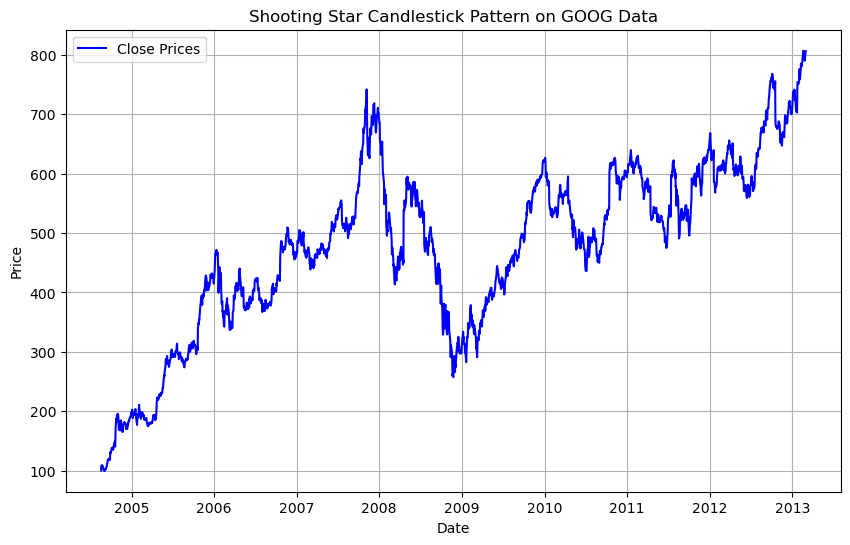

In [205]:
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Identify Shooting Star patterns
shooting_star = talib.CDLSHOOTINGSTAR(open_prices, high_prices, low_prices, close_prices)

# Plot the Shooting Star patterns
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, close_prices, label='Close Prices', color='blue')
for i in range(len(GOOG)):
    if shooting_star[i] == 100:
        plt.plot(GOOG.index[i], close_prices[i], 'ro', label='Shooting Star', markersize=8, markeredgecolor='red')
        print (shooting_star[i])

plt.title('Shooting Star Candlestick Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [102]:
class ShootingStarPatternStrategy(Strategy):
    def init(self):
        self.shooting_star_pattern = self.I(talib.CDLSHOOTINGSTAR, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.shooting_star_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Shooting Star pattern suggests a potential reversal
        elif self.shooting_star_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ShootingStarPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

55. **CDLABANDONEDBABY (Abandoned Baby Candlestick Pattern):**

- *__Purpose__*: CDLABANDONEDBABY identifies the Abandoned Baby candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLABANDONEDBABY` function in Python. The Abandoned Baby pattern involves a gap between two candles, indicating a potential reversal.
- *__Strategy__*: The Abandoned Baby pattern suggests a reversal after a trend, often indicating a shift in sentiment.
- *__Key Points__*: Combine CDLABANDONEDBABY with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLABANDONEDBABY can help identify potential trend reversals.

In [84]:
print(talib.CDLABANDONEDBABY.__doc__)

 CDLABANDONEDBABY(open, high, low, close[, penetration=?])

    Abandoned Baby (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Parameters:
        penetration: 0.3
    Outputs:
        integer (values are -100, 0 or 100)
    


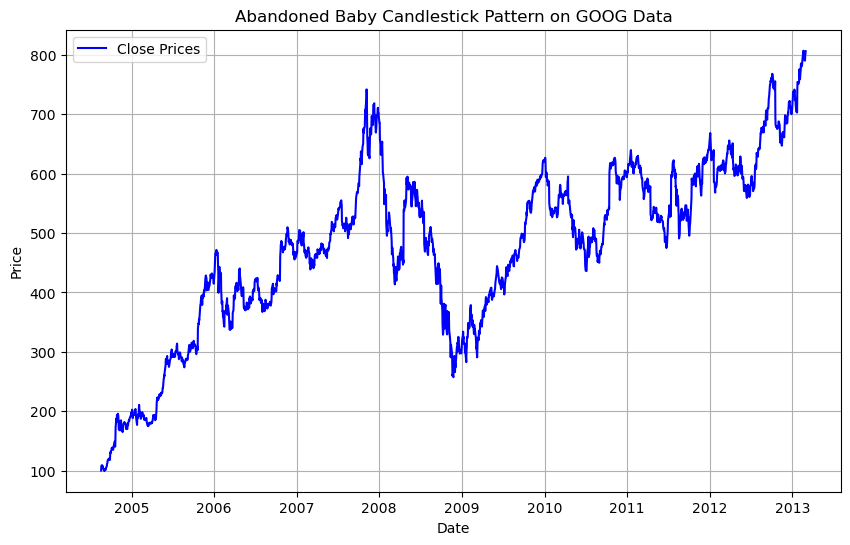

In [204]:
# Extract OHLC prices from the GOOG DataFrame
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Identify Abandoned Baby patterns
abandoned_baby = talib.CDLABANDONEDBABY(open_prices, high_prices, low_prices, close_prices, penetration=0.3)

# Plot the Abandoned Baby patterns
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, close_prices, label='Close Prices', color='blue')
for i in range(len(GOOG)):
    if abandoned_baby[i] == 100:
        plt.plot(GOOG.index[i], close_prices[i], 'go', label='Abandoned Baby', markersize=8, markeredgecolor='green')
plt.title('Abandoned Baby Candlestick Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [103]:
class AbandonedBabyPatternStrategy(Strategy):
    def init(self):
        self.abandoned_baby_pattern = self.I(talib.CDLABANDONEDBABY, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.abandoned_baby_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Abandoned Baby pattern suggests a potential reversal
        elif self.abandoned_baby_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, AbandonedBabyPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

56. **CDLSPINNINGTOP (Spinning Top Candlestick Pattern):**

- *__Purpose__*: CDLSPINNINGTOP identifies the Spinning Top candlestick pattern, which suggests market indecision.
- *__Activation and Usage__*: Use the `talib.CDLSPINNINGTOP` function in Python. The Spinning Top pattern involves a candle with a small body and long upper and lower shadows.
- *__Strategy__*: The Spinning Top pattern indicates uncertainty between buyers and sellers.
- *__Key Points__*: Combine CDLSPINNINGTOP with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLSPINNINGTOP can help identify potential periods of market indecision.

In [83]:
print(talib.CDLSPINNINGTOP.__doc__)

 CDLSPINNINGTOP(open, high, low, close)

    Spinning Top (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [ ]:
# Extract OHLC prices from the GOOG DataFrame
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Identify Spinning Top patterns
spinning_top = talib.CDLSPINNINGTOP(open_prices, high_prices, low_prices, close_prices)

# Plot the Spinning Top patterns
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, close_prices, label='Close Prices', color='blue')
for i in range(len(GOOG)):
    if spinning_top[i] != 0:
        color = 'green' if spinning_top[i] > 0 else 'red'
        plt.plot(GOOG.index[i], close_prices[i], 'o', color=color, label='Spinning Top', markersize=8, markeredgecolor=color)
plt.title('Spinning Top Candlestick Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [104]:
class SpinningTopPatternStrategy(Strategy):
    def init(self):
        self.spinning_top_pattern = self.I(talib.CDLSPINNINGTOP, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.spinning_top_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Spinning Top pattern suggests a potential reversal
        elif self.spinning_top_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, SpinningTopPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   47.998138
Equity Final [$]                      4570.98
Equity Peak [$]                      10893.06
Return [%]                           -54.2902
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    -8.77522
Volatility (Ann.) [%]                19.75824
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -58.532864
Avg. Drawdown [%]                  -27.237872
Max. Drawdown Duration     1501 days 00:00:00
Avg. Drawdown Duration      611 days 00:00:00
# Trades                                  114
Win Rate [%]                             50.0
Best Trade [%]                      16.549001
Worst Trade [%]                    -13.184709
Avg. Trade [%]                    

57. **CDLRISEFALL3METHODS (Rising/Falling Three Methods Candlestick Pattern):**

- *__Purpose__*: CDLRISEFALL3METHODS identifies the Rising/Falling Three Methods candlestick pattern, which suggests a continuation of the current trend.
- *__Activation and Usage__*: Use the `talib.CDLRISEFALL3METHODS` function in Python. The Rising/Falling Three Methods pattern involves a series of candles indicating potential continuation.
- *__Strategy__*: The Rising/Falling Three Methods pattern indicates a pause in the trend before it continues.
- *__Key Points__*: Combine CDLRISEFALL3METHODS with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLRISEFALL3METHODS can help identify potential trend continuation.

In [82]:
print(talib.CDLRISEFALL3METHODS.__doc__)

 CDLRISEFALL3METHODS(open, high, low, close)

    Rising/Falling Three Methods (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


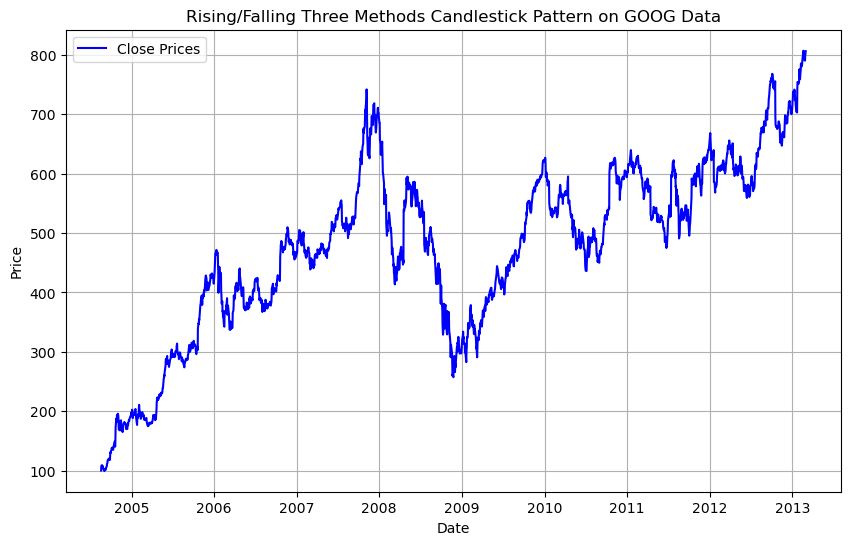

In [207]:
# Extract OHLC prices from the GOOG DataFrame
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Identify Rising/Falling Three Methods patterns
rise_fall_3_methods = talib.CDLRISEFALL3METHODS(open_prices, high_prices, low_prices, close_prices)

# Plot the Rising/Falling Three Methods patterns
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, close_prices, label='Close Prices', color='blue')
for i in range(len(GOOG)):
    if rise_fall_3_methods[i] != 0:
        color = 'green' if rise_fall_3_methods[i] > 0 else 'red'
        plt.plot(GOOG.index[i], close_prices[i], 'o', color=color, label='Rise/Fall 3 Methods', markersize=8, markeredgecolor=color)
plt.title('Rising/Falling Three Methods Candlestick Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [1]:
class RiseFall3MethodsPatternStrategy(Strategy):
    def init(self):
        self.rise_fall_3_methods_pattern = self.I(talib.CDLRISEFALL3METHODS, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.rise_fall_3_methods_pattern[-1] > 0:
            if not self.position:
                self.buy()
        elif self.rise_fall_3_methods_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, RiseFall3MethodsPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

NameError: name 'Strategy' is not defined

58. **CDLMORNINGSTAR (Morning Star Candlestick Pattern):**

- *__Purpose__*: CDLMORNINGSTAR identifies the Morning Star candlestick pattern, which suggests a potential bullish reversal.
- *__Activation and Usage__*: Use the `talib.CDLMORNINGSTAR` function in Python. The Morning Star pattern involves three candles indicating potential reversal.
- *__Strategy__*: The Morning Star pattern suggests a potential bullish reversal after a downtrend.
- *__Key Points__*: Combine CDLMORNINGSTAR with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLMORNINGSTAR can help identify potential bullish reversals.

In [81]:
print(talib.CDLMORNINGSTAR.__doc__)

 CDLMORNINGSTAR(open, high, low, close[, penetration=?])

    Morning Star (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Parameters:
        penetration: 0.3
    Outputs:
        integer (values are -100, 0 or 100)
    


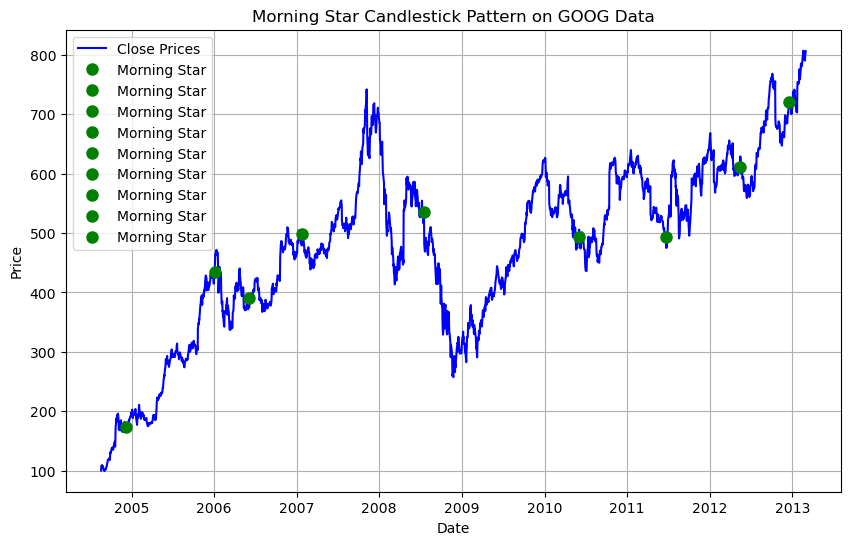

In [208]:

# Extract OHLC prices from the GOOG DataFrame
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Identify Morning Star patterns
penetration = 0.3  # Adjust the penetration parameter if needed
morning_star = talib.CDLMORNINGSTAR(open_prices, high_prices, low_prices, close_prices, penetration=penetration)

# Plot the Morning Star patterns
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, close_prices, label='Close Prices', color='blue')
for i in range(len(GOOG)):
    if morning_star[i] != 0:
        color = 'green' if morning_star[i] > 0 else 'red'
        plt.plot(GOOG.index[i], close_prices[i], 'o', color=color, label='Morning Star', markersize=8, markeredgecolor=color)
plt.title('Morning Star Candlestick Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [106]:
class MorningStarPatternStrategy(Strategy):
    def init(self):
        self.morning_star_pattern = self.I(talib.CDLMORNINGSTAR, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.morning_star_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Morning Star pattern suggests a potential reversal
        elif self.morning_star_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MorningStarPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    96.32216
Equity Final [$]                     45589.09
Equity Peak [$]                      46104.94
Return [%]                           355.8909
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   19.480363
Volatility (Ann.) [%]                39.90305
Sharpe Ratio                         0.488192
Sortino Ratio                        0.901001
Calmar Ratio                         0.299153
Max. Drawdown [%]                  -65.118434
Avg. Drawdown [%]                   -5.418353
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       61 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     360.012685
Worst Trade [%]                    360.012685
Avg. Trade [%]                    

59. **LINEARREG_SLOPE (Linear Regression Slope):**

- *__Purpose__*: LINEARREG_SLOPE calculates the slope of the linear regression line.
- *__Activation and Usage__*: Use the `talib.LINEARREG_SLOPE` function in Python. It helps identify the direction and steepness of the linear regression line.
- *__Strategy__*: LINEARREG_SLOPE can help assess the trend's strength and direction.
- *__Key Points__*: Combine LINEARREG_SLOPE with other trend-following indicators for confirmation.
- *__Effective Conditions__*: LINEARREG_SLOPE is valuable for assessing trend direction.

In [80]:
print(talib.LINEARREG_SLOPE.__doc__)

 LINEARREG_SLOPE(real[, timeperiod=?])

    Linear Regression Slope (Statistic Functions)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


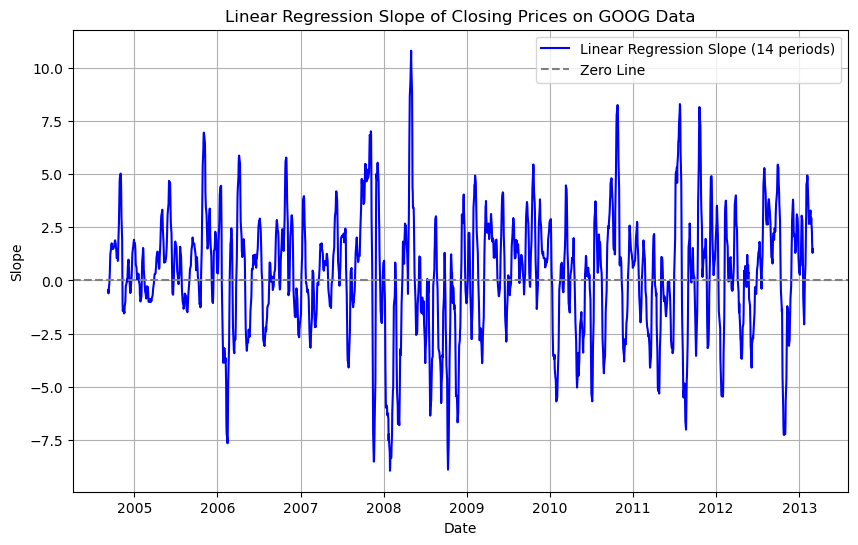

In [209]:
# Extract the closing prices from the GOOG DataFrame
close_prices = GOOG['Close'].values

# Calculate the linear regression slope with a time period of 14
timeperiod = 14
linear_reg_slope = talib.LINEARREG_SLOPE(close_prices, timeperiod)

# Plot the linear regression slope
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, linear_reg_slope, label=f'Linear Regression Slope ({timeperiod} periods)', color='blue')
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')
plt.title(f'Linear Regression Slope of Closing Prices on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Slope')
plt.legend()
plt.grid()
plt.show()

In [111]:
class LinearRegSlopeStrategy(Strategy):
    timeperiod =14 
    def init(self):
        self.linear_reg_slope = self.I(talib.LINEARREG_SLOPE, self.data.Close, self.timeperiod)

    def next(self):
        if self.linear_reg_slope[-1] > 0:
            if not self.position:
                self.buy()
        elif self.linear_reg_slope[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, LinearRegSlopeStrategy, cash=10_000)
stats = bt.run()
print(stats)


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.499069
Equity Final [$]                     70065.92
Equity Peak [$]                      70853.27
Return [%]                           600.6592
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.658982
Volatility (Ann.) [%]               30.654466
Sharpe Ratio                         0.837039
Sortino Ratio                        1.738935
Calmar Ratio                         0.943569
Max. Drawdown [%]                  -27.193542
Avg. Drawdown [%]                   -4.515869
Max. Drawdown Duration      777 days 00:00:00
Avg. Drawdown Duration       53 days 00:00:00
# Trades                                   71
Win Rate [%]                        52.112676
Best Trade [%]                      54.450841
Worst Trade [%]                    -10.162773
Avg. Trade [%]                    

60. **CDLBELTHOLD (Belt-Hold Candlestick Pattern):**

- *__Purpose__*: CDLBELTHOLD identifies the Belt-Hold candlestick pattern, which suggests a potential trend continuation or reversal.
- *__Activation and Usage__*: Use the `talib.CDLBELTHOLD` function in Python. The Belt-Hold pattern involves a single candle indicating a potential continuation or reversal.
- *__Strategy__*: The Belt-Hold pattern indicates a potential continuation or reversal, depending on its appearance.
- *__Key Points__*: Combine CDLBELTHOLD with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLBELTHOLD can help identify potential trend continuation or reversal.

In [79]:
print(talib.CDLBELTHOLD.__doc__)

 CDLBELTHOLD(open, high, low, close)

    Belt-hold (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


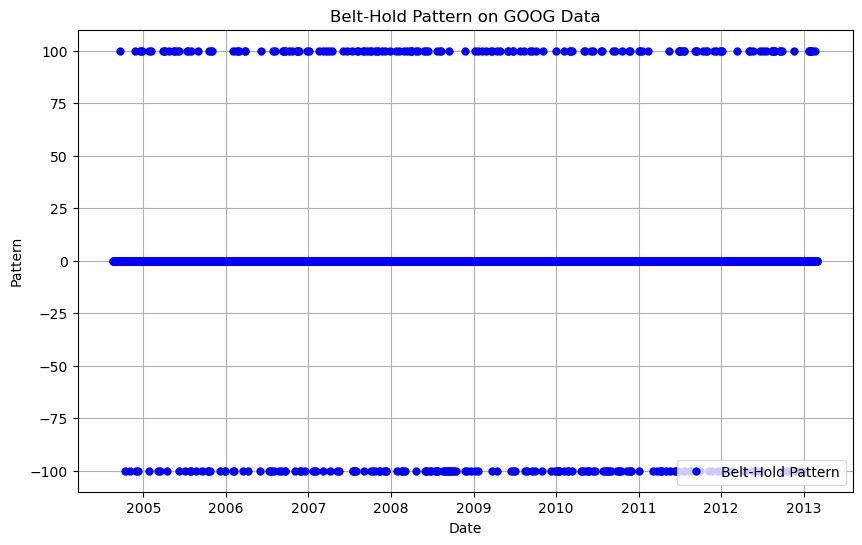

In [210]:
# Extract OHLC data from the GOOG DataFrame
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Calculate the Belt-Hold pattern
belt_hold_pattern = talib.CDLBELTHOLD(open_prices, high_prices, low_prices, close_prices)

# Plot the Belt-Hold pattern
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, belt_hold_pattern, marker='o', linestyle='', markersize=5, color='blue', label='Belt-Hold Pattern')
plt.title('Belt-Hold Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Pattern')
plt.legend()
plt.grid()
plt.show()

In [112]:
class BeltHoldPatternStrategy(Strategy):
    def init(self):
        self.belt_hold_pattern = self.I(talib.CDLBELTHOLD, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.belt_hold_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Belt Hold pattern suggests a potential reversal
        elif self.belt_hold_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, BeltHoldPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   51.769088
Equity Final [$]                      44687.3
Equity Peak [$]                       45194.1
Return [%]                            346.873
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   19.200639
Volatility (Ann.) [%]               26.527616
Sharpe Ratio                         0.723798
Sortino Ratio                        1.439395
Calmar Ratio                         0.587702
Max. Drawdown [%]                  -32.670679
Avg. Drawdown [%]                   -3.551382
Max. Drawdown Duration      576 days 00:00:00
Avg. Drawdown Duration       44 days 00:00:00
# Trades                                   77
Win Rate [%]                        49.350649
Best Trade [%]                      29.288893
Worst Trade [%]                    -20.733449
Avg. Trade [%]                    

61. **CDLHIKKAKEMOD (Modified Hikkake Pattern):**

- *__Purpose__*: CDLHIKKAKEMOD identifies the Modified Hikkake candlestick pattern, which suggests a potential trend continuation or reversal.
- *__Activation and Usage__*: Use the `talib.CDLHIKKAKEMOD` function in Python. The Modified Hikkake pattern involves a series of candles indicating a potential continuation or reversal.
- *__Strategy__*: The Modified Hikkake pattern may signal a pause in the trend or a reversal.
- *__Key Points__*: Combine CDLHIKKAKEMOD with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLHIKKAKEMOD can help identify potential trend continuation or reversal.

In [78]:
print(talib.CDLHIKKAKEMOD.__doc__)

 CDLHIKKAKEMOD(open, high, low, close)

    Modified Hikkake Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


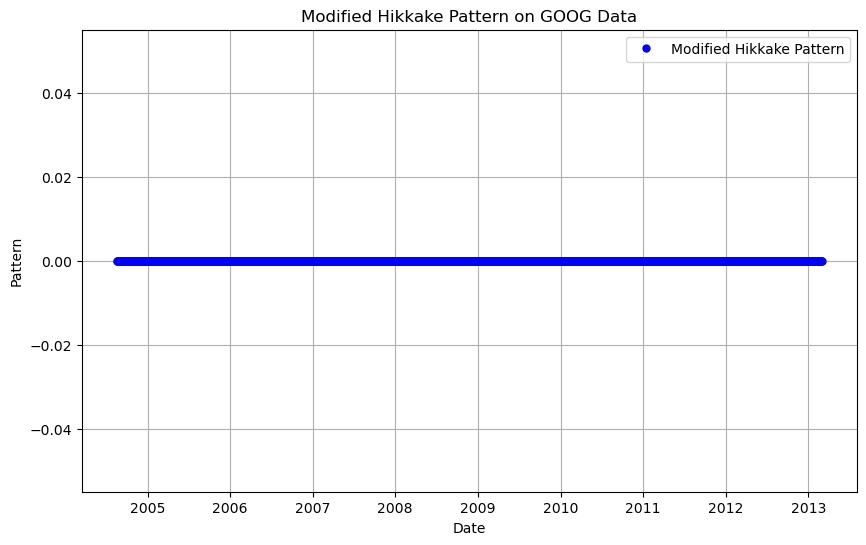

In [211]:
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Calculate the Modified Hikkake pattern
modified_hikkake_pattern = talib.CDLHIKKAKEMOD(open_prices, high_prices, low_prices, close_prices)

# Plot the Modified Hikkake pattern
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, modified_hikkake_pattern, marker='o', linestyle='', markersize=5, color='blue', label='Modified Hikkake Pattern')
plt.title('Modified Hikkake Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Pattern')
plt.legend()
plt.grid()
plt.show()

In [113]:

class HikkakeModifiedPatternStrategy(Strategy):
    def init(self):
        self.hikkake_modified_pattern = self.I(talib.CDLHIKKAKEMOD, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.hikkake_modified_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Hikkake Modified pattern suggests a potential reversal
        elif self.hikkake_modified_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, HikkakeModifiedPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

62. **STOCHRSI (Stochastic RSI):**

- *__Purpose__*: STOCHRSI combines the Stochastic Oscillator and the Relative Strength Index (RSI) to provide insights into potential overbought or oversold conditions.
- *__Activation and Usage__*: Use the `talib.STOCHRSI` function in Python. STOCHRSI values above 80 suggest overbought conditions, while values below 20 suggest oversold conditions.
- *__Strategy__*: STOCHRSI crossovers of overbought and oversold levels can signal potential reversals.
- *__Key Points__*: Combine STOCHRSI with other indicators for comprehensive analysis.
- *__Effective Conditions__*: STOCHRSI provides a combined perspective on momentum and overbought/oversold conditions.

In [77]:
print(talib.STOCHRSI.__doc__)

 STOCHRSI(real[, timeperiod=?, fastk_period=?, fastd_period=?, fastd_matype=?])

    Stochastic Relative Strength Index (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
        fastk_period: 5
        fastd_period: 3
        fastd_matype: 0
    Outputs:
        fastk
        fastd
    


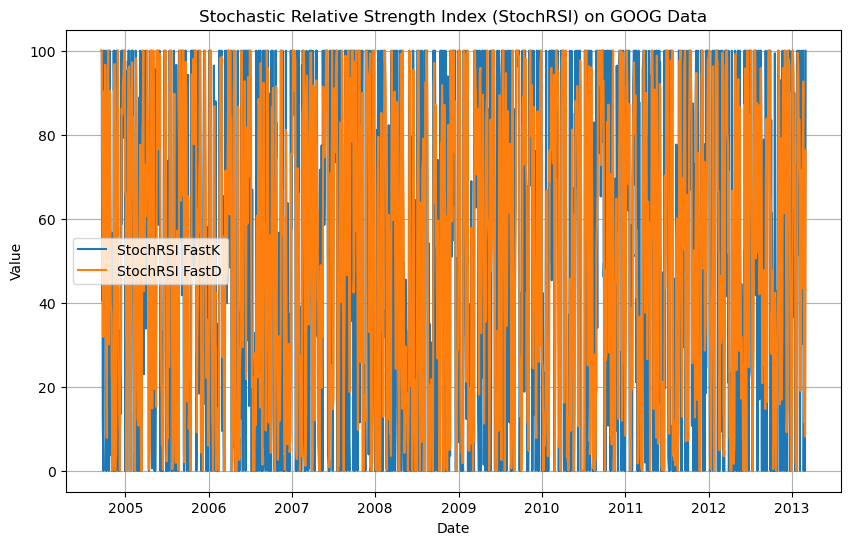

In [213]:
# Extract close prices from the GOOG DataFrame
close_prices = GOOG['Close'].values

# Calculate StochRSI
stochrsi_fastk, stochrsi_fastd = talib.STOCHRSI(close_prices)

# Plot StochRSI
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, stochrsi_fastk, label='StochRSI FastK')
plt.plot(GOOG.index, stochrsi_fastd, label='StochRSI FastD')
plt.title('Stochastic Relative Strength Index (StochRSI) on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [114]:
class StochRSIStrategy(Strategy):
    def init(self):
        self.slowk, self.slowd = self.I(talib.STOCHRSI, self.data.Close, timeperiod=14, fastk_period=5, fastd_period=3)

    def next(self):
        if self.slowk[-1] > self.slowd[-1] and self.slowk[-2] <= self.slowd[-2]:
            if not self.position:
                self.buy()
        elif self.slowk[-1] < self.slowd[-1] and self.slowk[-2] >= self.slowd[-2]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, StochRSIStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.731844
Equity Final [$]                     21417.26
Equity Peak [$]                      22764.87
Return [%]                           114.1726
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    9.346454
Volatility (Ann.) [%]               24.331607
Sharpe Ratio                         0.384128
Sortino Ratio                        0.663053
Calmar Ratio                         0.170224
Max. Drawdown [%]                  -54.906749
Avg. Drawdown [%]                   -5.881195
Max. Drawdown Duration     1894 days 00:00:00
Avg. Drawdown Duration      124 days 00:00:00
# Trades                                  417
Win Rate [%]                        47.721823
Best Trade [%]                      20.995106
Worst Trade [%]                     -9.974539
Avg. Trade [%]                    

63. **CDLIDENTICAL3CROWS (Identical Three Crows Candlestick Pattern):**

- *__Purpose__*: CDLIDENTICAL3CROWS identifies the Identical Three Crows candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLIDENTICAL3CROWS` function in Python. The Identical Three Crows pattern involves three consecutive bearish candles indicating potential reversal.
- *__Strategy__*: The Identical Three Crows pattern suggests a potential bearish reversal.
- *__Key Points__*: Combine CDLIDENTICAL3CROWS with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLIDENTICAL3CROWS can help identify potential bearish reversals.

In [76]:
print(talib.CDLIDENTICAL3CROWS.__doc__)

 CDLIDENTICAL3CROWS(open, high, low, close)

    Identical Three Crows (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


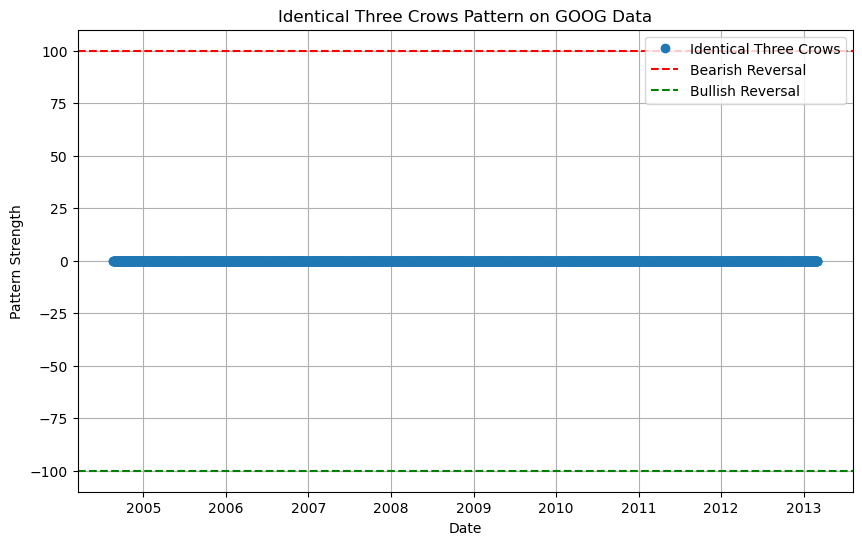

In [214]:
# Extract OHLC data from the GOOG DataFrame
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Calculate the Identical Three Crows pattern
identical3crows = talib.CDLIDENTICAL3CROWS(open_prices, high_prices, low_prices, close_prices)

# Plot the Identical Three Crows pattern
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, identical3crows, marker='o', linestyle='', markersize=6, label='Identical Three Crows')
plt.axhline(y=100, color='r', linestyle='--', label='Bearish Reversal')
plt.axhline(y=-100, color='g', linestyle='--', label='Bullish Reversal')
plt.title('Identical Three Crows Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Pattern Strength')
plt.legend()
plt.grid()
plt.show()

In [115]:
class Identical3CrowsPatternStrategy(Strategy):
    def init(self):
        self.identical_3_crows_pattern = self.I(talib.CDLIDENTICAL3CROWS, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.identical_3_crows_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Identical 3 Crows pattern suggests a potential reversal
        elif self.identical_3_crows_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, Identical3CrowsPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

64. **CDLHARAMICROSS (Harami Cross Candlestick Pattern):**

- *__Purpose__*: CDLHARAMICROSS identifies the Harami Cross candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLHARAMICROSS` function in Python. The Harami Cross pattern involves two candles indicating potential reversal.
- *__Strategy__*: The Harami Cross pattern suggests a potential reversal when it appears after a trend.
- *__Key Points__*: Combine CDLHARAMICROSS with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLHARAMICROSS can help identify potential trend reversals.

In [75]:
print(talib.CDLHARAMICROSS.__doc__)

 CDLHARAMICROSS(open, high, low, close)

    Harami Cross Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


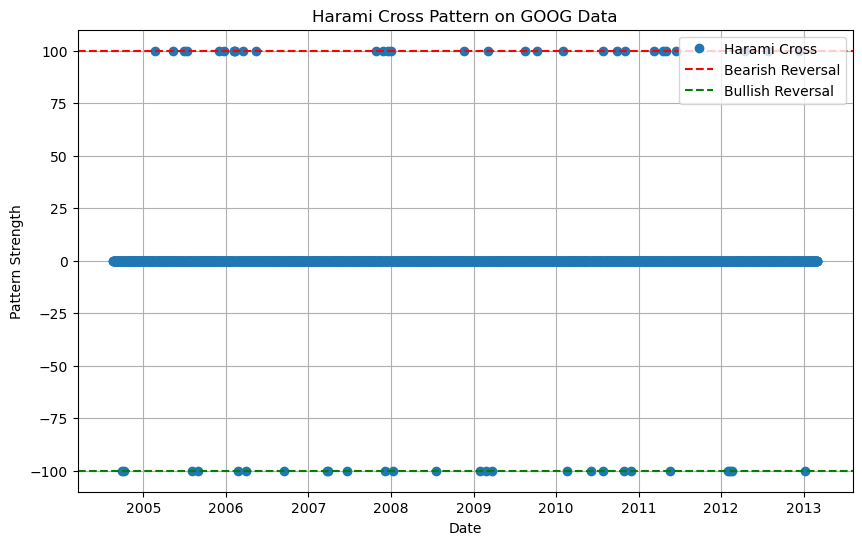

In [215]:
# Extract OHLC data from the GOOG DataFrame
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Calculate the Harami Cross pattern
harami_cross = talib.CDLHARAMICROSS(open_prices, high_prices, low_prices, close_prices)

# Plot the Harami Cross pattern
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, harami_cross, marker='o', linestyle='', markersize=6, label='Harami Cross')
plt.axhline(y=100, color='r', linestyle='--', label='Bearish Reversal')
plt.axhline(y=-100, color='g', linestyle='--', label='Bullish Reversal')
plt.title('Harami Cross Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Pattern Strength')
plt.legend()
plt.grid()
plt.show()

In [116]:

class HaramiCrossPatternStrategy(Strategy):
    def init(self):
        self.harami_cross_pattern = self.I(talib.CDLHARAMICROSS, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.harami_cross_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Harami Cross pattern suggests a potential reversal
        elif self.harami_cross_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, HaramiCrossPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   45.437616
Equity Final [$]                     53012.44
Equity Peak [$]                      55353.16
Return [%]                           430.1244
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   21.613803
Volatility (Ann.) [%]               25.620787
Sharpe Ratio                         0.843604
Sortino Ratio                        1.613353
Calmar Ratio                         0.792924
Max. Drawdown [%]                  -27.258363
Avg. Drawdown [%]                   -4.565588
Max. Drawdown Duration      477 days 00:00:00
Avg. Drawdown Duration       46 days 00:00:00
# Trades                                   14
Win Rate [%]                        71.428571
Best Trade [%]                      61.176856
Worst Trade [%]                      -9.85956
Avg. Trade [%]                    

65. **CDLSTICKSANDWICH (Stick Sandwich Candlestick Pattern):**

- *__Purpose__*: CDLSTICKSANDWICH identifies the Stick Sandwich candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLSTICKSANDWICH` function in Python. The Stick Sandwich pattern involves three candles indicating potential reversal.
- *__Strategy__*: The Stick Sandwich pattern suggests a potential reversal when it appears after a downtrend.
- *__Key Points__*: Combine CDLSTICKSANDWICH with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLSTICKSANDWICH can help identify potential trend reversals.

In [74]:
print(talib.CDLSTICKSANDWICH.__doc__)

 CDLSTICKSANDWICH(open, high, low, close)

    Stick Sandwich (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


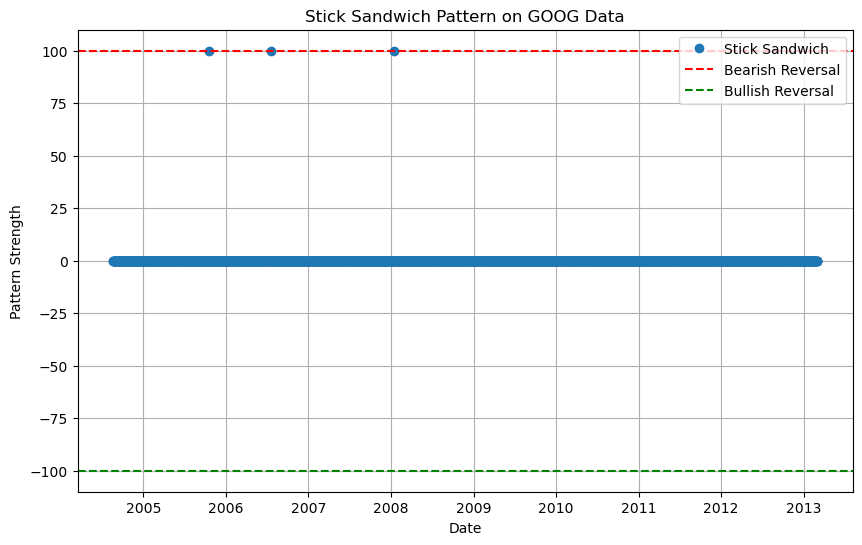

In [216]:
# Extract OHLC data from the GOOG DataFrame
open_prices = GOOG['Open'].values
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values
close_prices = GOOG['Close'].values

# Calculate the Stick Sandwich pattern
stick_sandwich = talib.CDLSTICKSANDWICH(open_prices, high_prices, low_prices, close_prices)

# Plot the Stick Sandwich pattern
plt.figure(figsize=(10, 6))
plt.plot(GOOG.index, stick_sandwich, marker='o', linestyle='', markersize=6, label='Stick Sandwich')
plt.axhline(y=100, color='r', linestyle='--', label='Bearish Reversal')
plt.axhline(y=-100, color='g', linestyle='--', label='Bullish Reversal')
plt.title('Stick Sandwich Pattern on GOOG Data')
plt.xlabel('Date')
plt.ylabel('Pattern Strength')
plt.legend()
plt.grid()
plt.show()

In [117]:
class StickSandwichPatternStrategy(Strategy):
    def init(self):
        self.stick_sandwich_pattern = self.I(talib.CDLSTICKSANDWICH, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.stick_sandwich_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Stick Sandwich pattern suggests a potential reversal
        elif self.stick_sandwich_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, StickSandwichPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   86.173184
Equity Final [$]                      22656.0
Equity Peak [$]                       22909.4
Return [%]                             126.56
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   10.070146
Volatility (Ann.) [%]               33.852454
Sharpe Ratio                         0.297472
Sortino Ratio                        0.494245
Calmar Ratio                         0.156584
Max. Drawdown [%]                  -64.311362
Avg. Drawdown [%]                   -5.469003
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       82 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     130.711394
Worst Trade [%]                    130.711394
Avg. Trade [%]                    

66. **MINUS_DM (Minus Directional Movement):**

- *__Purpose__*: MINUS_DM measures the downward price movement within a specified period.
- *__Activation and Usage__*: Use the `talib.MINUS_DM` function in Python. It helps identify the strength of downward price movements.
- *__Strategy__*: MINUS_DM can help assess the strength of downward price movements and potential trends.
- *__Key Points__*: Combine MINUS_DM with PLUS_DM and ADX to evaluate trend strength.
- *__Effective Conditions__*: MINUS_DM is valuable for assessing downward price momentum.

In [73]:
print(talib.MINUS_DM.__doc__)

 MINUS_DM(high, low[, timeperiod=?])

    Minus Directional Movement (Momentum Indicators)

    Inputs:
        prices: ['high', 'low']
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


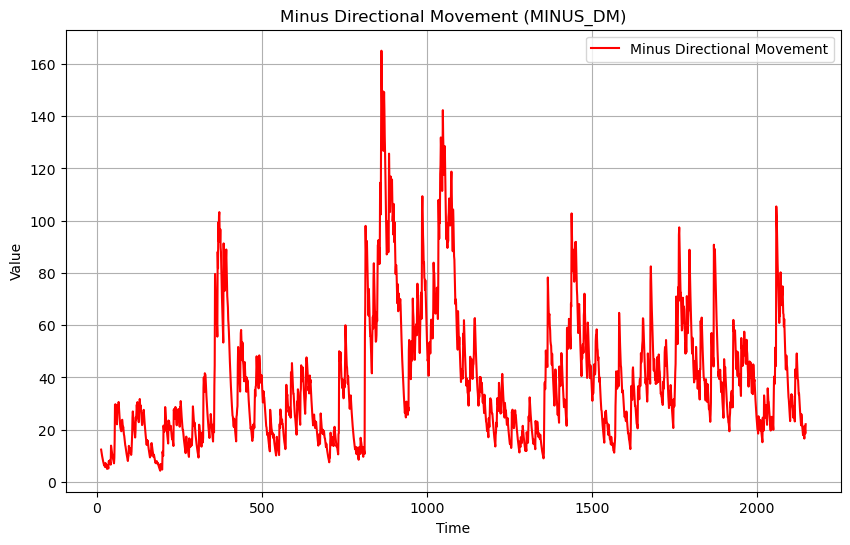

In [217]:
# Extract high and low prices from the GOOG DataFrame
high_prices = GOOG['High'].values
low_prices = GOOG['Low'].values

# Calculate the Minus Directional Movement
minus_dm = talib.MINUS_DM(high_prices, low_prices)

# Plot the Minus Directional Movement
plt.figure(figsize=(10, 6))
plt.plot(minus_dm, label='Minus Directional Movement', color='red')
plt.title('Minus Directional Movement (MINUS_DM)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
class MinusDMStrategy(Strategy):
    def init(self):
        self.minus_dm = self.I(talib.MINUS_DM, self.data.High, self.data.Low, timeperiod=14)

    def next(self):
        if self.minus_dm[-1] > self.minus_dm[-2]:
            if not self.position:
                self.sell()  # Potential downtrend signal
        elif self.minus_dm[-1] < self.minus_dm[-2]:
            if not self.position:
                self.buy()  # Potential uptrend signal

bt = Backtest(GOOG, MinusDMStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

67. **HT_DCPERIOD (Hilbert Transform - Dominant Cycle Period):**

- *__Purpose__*: HT_DCPERIOD calculates the dominant cycle period using the Hilbert Transform.
- *__Activation and Usage__*: Use the `talib.HT_DCPERIOD` function in Python. It helps identify potential dominant cycle periods in price data.
- *__Strategy__*: HT_DCPERIOD can help assess potential cyclic patterns in the market.
- *__Key Points__*: Combine HT_DCPERIOD with other indicators for comprehensive analysis.
- *__Effective Conditions__*: HT_DCPERIOD is useful for identifying potential cyclic patterns.

In [72]:
print(talib.HT_DCPERIOD.__doc__)

 HT_DCPERIOD(real)

    Hilbert Transform - Dominant Cycle Period (Cycle Indicators)

    Inputs:
        real: (any ndarray)
    Outputs:
        real
    


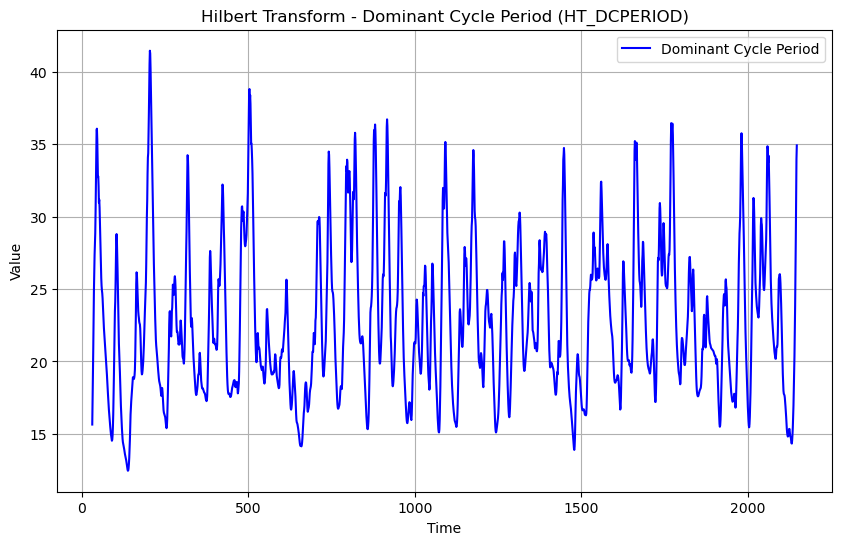

In [218]:
# Extract the closing prices from the GOOG DataFrame
close_prices = GOOG['Close'].values

# Calculate the Hilbert Transform - Dominant Cycle Period
dc_period = talib.HT_DCPERIOD(close_prices)

# Plot the Hilbert Transform - Dominant Cycle Period
plt.figure(figsize=(10, 6))
plt.plot(dc_period, label='Dominant Cycle Period', color='blue')
plt.title('Hilbert Transform - Dominant Cycle Period (HT_DCPERIOD)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
class DominantCyclePeriodStrategy(Strategy):
    def init(self):
        self.dcp = self.I(talib.HT_DCPERIOD, self.data.Close)

    def next(self):
        if self.dcp[-1] > self.dcp[-2]:
            if not self.position:
                self.buy()  # Potential uptrend signal
        elif self.dcp[-1] < self.dcp[-2]:
            if self.position:
                self.position.close()  # Potential downtrend signal

bt = Backtest(GOOG, DominantCyclePeriodStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   49.022346
Equity Final [$]                      50345.0
Equity Peak [$]                      57480.91
Return [%]                             403.45
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   20.879435
Volatility (Ann.) [%]               27.568433
Sharpe Ratio                         0.757367
Sortino Ratio                        1.402521
Calmar Ratio                          0.65601
Max. Drawdown [%]                   -31.82792
Avg. Drawdown [%]                   -4.615196
Max. Drawdown Duration      581 days 00:00:00
Avg. Drawdown Duration       53 days 00:00:00
# Trades                                  138
Win Rate [%]                         59.42029
Best Trade [%]                       33.45019
Worst Trade [%]                    -14.921353
Avg. Trade [%]                    

68. **CDLRICKSHAWMAN (Rickshaw Man Candlestick Pattern):**

- *__Purpose__*: CDLRICKSHAWMAN identifies the Rickshaw Man candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLRICKSHAWMAN` function in Python. The Rickshaw Man pattern involves a candle with a small body and long shadows.
- *__Strategy__*: The Rickshaw Man pattern suggests market indecision and potential reversals.
- *__Key Points__*: Combine CDLRICKSHAWMAN with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLRICKSHAWMAN can help identify potential trend reversals.

In [71]:
print(talib.CDLRICKSHAWMAN.__doc__)

 CDLRICKSHAWMAN(open, high, low, close)

    Rickshaw Man (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


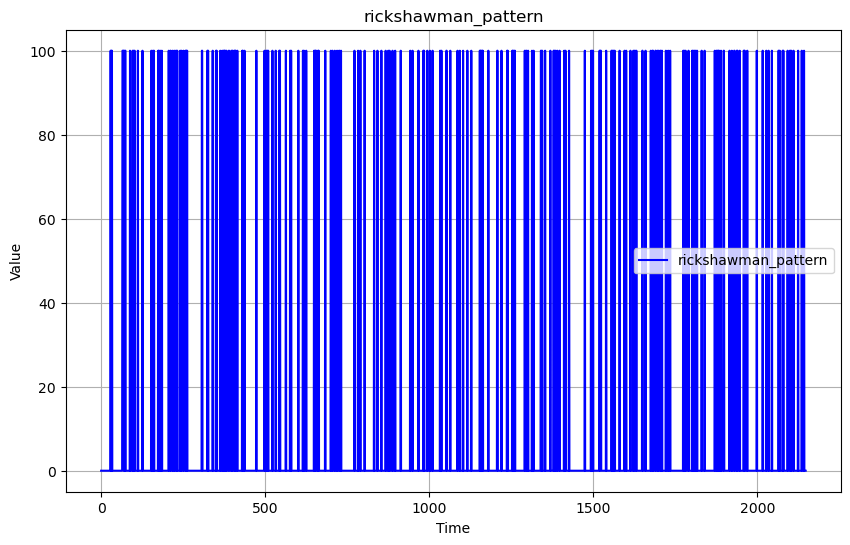

In [219]:
rickshawman_pattern = talib.CDLRICKSHAWMAN(open_prices, high_prices, low_prices, close_prices)
# Plot the Hilbert Transform - Dominant Cycle Period
plt.figure(figsize=(10, 6))
plt.plot(rickshawman_pattern, label='rickshawman_pattern', color='blue')
plt.title('rickshawman_pattern')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
class RickshawManPatternStrategy(Strategy):
    def init(self):
        self.rickshaw_man_pattern = self.I(talib.CDLRICKSHAWMAN, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.rickshaw_man_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Rickshaw Man pattern suggests a potential reversal
        elif self.rickshaw_man_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, RickshawManPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    7.728119
Equity Final [$]                          0.0
Equity Peak [$]                       10000.0
Return [%]                             -100.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]             1145.532825
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                      -100.0
Avg. Drawdown [%]                      -100.0
Max. Drawdown Duration     3074 days 00:00:00
Avg. Drawdown Duration     3074 days 00:00:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                    -103.363914
Worst Trade [%]                   -103.363914
Avg. Trade [%]                    

69. **AVGPRICE (Average Price):**

- *__Purpose__*: AVGPRICE calculates the average price of an asset within a specified period.
- *__Activation and Usage__*: Use the `talib.AVGPRICE` function in Python. AVGPRICE helps identify the average price over a given period.
- *__Strategy__*: AVGPRICE can help assess the general price level over time.
- *__Key Points__*: Combine AVGPRICE with other price-based indicators for comprehensive analysis.
- *__Effective Conditions__*: AVGPRICE is valuable for evaluating the average price.

In [70]:
print(talib.AVGPRICE.__doc__)

 AVGPRICE(open, high, low, close)

    Average Price (Price Transform)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        real
    


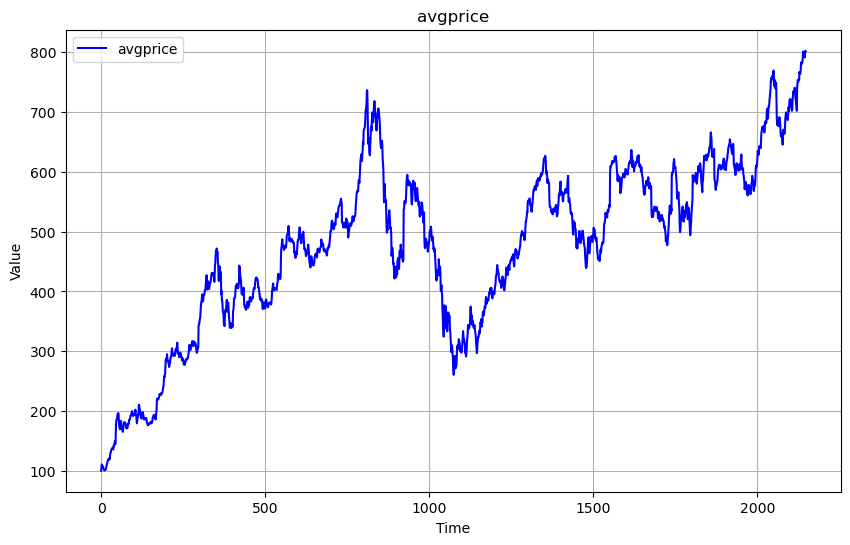

In [221]:
avgprice = talib.AVGPRICE(open_prices, high_prices, low_prices, close_prices)
# Plot the Hilbert Transform - Dominant Cycle Period
plt.figure(figsize=(10, 6))
plt.plot(avgprice, label='avgprice', color='blue')
plt.title('avgprice')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
class AveragePriceStrategy(Strategy):
    def init(self):
        self.avg_price = self.I(talib.AVGPRICE, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.avg_price[-1] > self.avg_price[-2]:
            if not self.position:
                self.buy()  # Potential uptrend signal
        elif self.avg_price[-1] < self.avg_price[-2]:
            if self.position:
                self.position.close()  # Potential downtrend signal

bt = Backtest(GOOG, AveragePriceStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   71.880819
Equity Final [$]                     68475.72
Equity Peak [$]                      70145.12
Return [%]                           584.7572
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.320999
Volatility (Ann.) [%]               29.195602
Sharpe Ratio                         0.867288
Sortino Ratio                        1.686298
Calmar Ratio                         0.480807
Max. Drawdown [%]                  -52.663563
Avg. Drawdown [%]                     -3.8432
Max. Drawdown Duration     1024 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                  408
Win Rate [%]                        49.509804
Best Trade [%]                      17.651718
Worst Trade [%]                    -15.442279
Avg. Trade [%]                    

70. **CDLKICKINGBYLENGTH (Kicking - bull/bear determined by the longer marubozu):**

- *__Purpose__*: CDLKICKINGBYLENGTH identifies the Kicking candlestick pattern, with the trend direction determined by the longer marubozu.
- *__Activation and Usage__*: Use the `talib.CDLKICKINGBYLENGTH` function in Python. The Kicking pattern involves two consecutive candles, with a longer marubozu indicating the trend direction.
- *__Strategy__*: The Kicking pattern suggests a strong trend reversal with the direction determined by the longer marubozu.
- *__Key Points__*: Combine CDLKICKINGBYLENGTH with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLKICKINGBYLENGTH can help identify potential strong trend reversals.

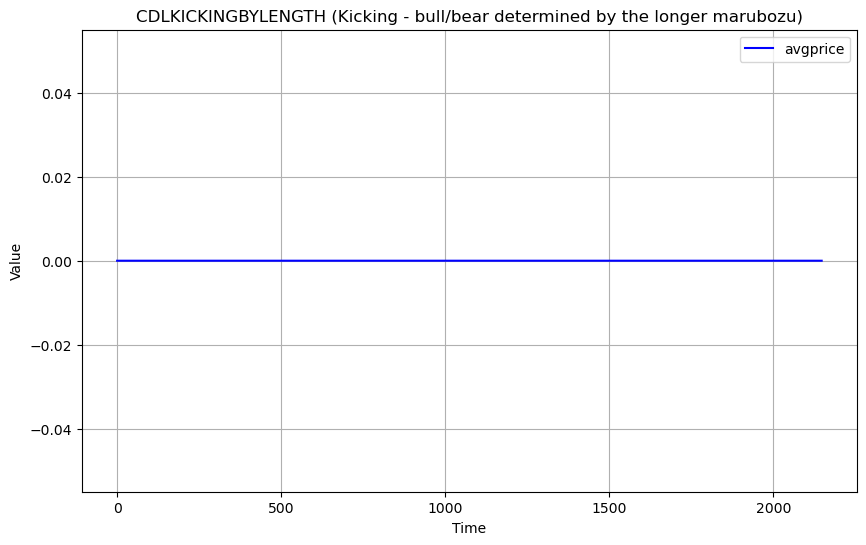

In [222]:
cdlkickingbylength = talib.CDLKICKINGBYLENGTH(open_prices, high_prices, low_prices, close_prices)
# Plot the Hilbert Transform - Dominant Cycle Period
plt.figure(figsize=(10, 6))
plt.plot(cdlkickingbylength, label='avgprice', color='blue')
plt.title('CDLKICKINGBYLENGTH (Kicking - bull/bear determined by the longer marubozu)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
print(talib.CDLKICKINGBYLENGTH.__doc__)

 CDLKICKINGBYLENGTH(open, high, low, close)

    Kicking - bull/bear determined by the longer marubozu (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [122]:
class KickingByLengthPatternStrategy(Strategy):
    def init(self):
        self.kicking_by_length_pattern = self.I(talib.CDLKICKINGBYLENGTH, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.kicking_by_length_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Kicking By Length pattern suggests a potential reversal
        elif self.kicking_by_length_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, KickingByLengthPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

71. **CDLMORNINGDOJISTAR (Morning Doji Star Candlestick Pattern):**

- *__Purpose__*: CDLMORNINGDOJISTAR identifies the Morning Doji Star candlestick pattern, which suggests a potential bullish reversal.
- *__Activation and Usage__*: Use the `talib.CDLMORNINGDOJISTAR` function in Python. The Morning Doji Star pattern involves three candles indicating potential reversal.
- *__Strategy__*: The Morning Doji Star pattern suggests a potential bullish reversal after a downtrend.
- *__Key Points__*: Combine CDLMORNINGDOJISTAR with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLMORNINGDOJISTAR can help identify potential bullish reversals.

In [68]:
print(talib.CDLMORNINGDOJISTAR.__doc__)

 CDLMORNINGDOJISTAR(open, high, low, close[, penetration=?])

    Morning Doji Star (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Parameters:
        penetration: 0.3
    Outputs:
        integer (values are -100, 0 or 100)
    


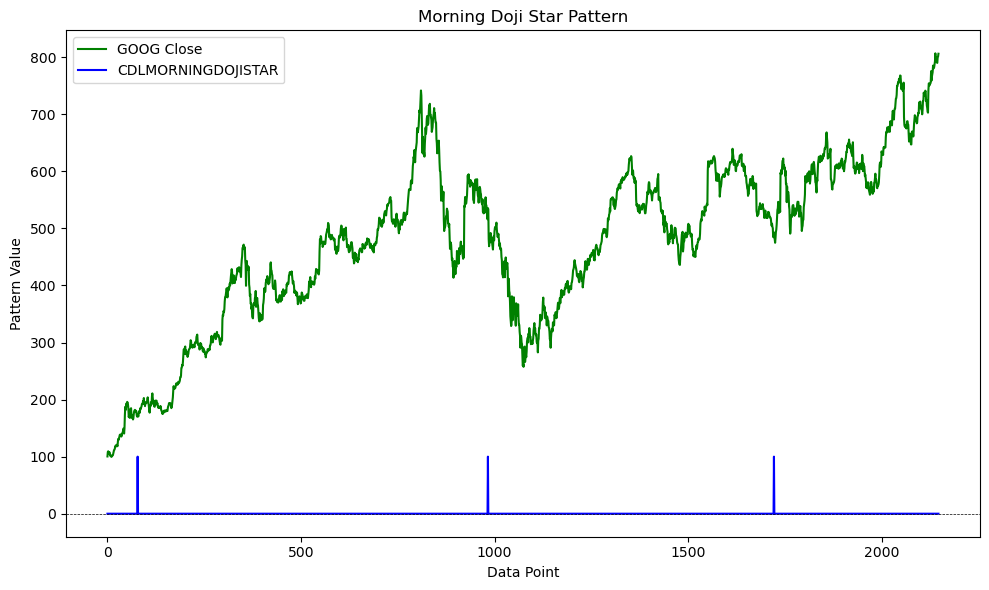

In [232]:

# Calculate the CDLMORNINGDOJISTAR pattern
morning_doji_star_pattern = talib.CDLMORNINGDOJISTAR(open_prices, high_prices, low_prices, close_prices)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(close_prices , label='GOOG Close', color='green')

# Plot the Morning Doji Star pattern
plt.plot(morning_doji_star_pattern, label='CDLMORNINGDOJISTAR', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Morning Doji Star Pattern')
plt.xlabel('Data Point')
plt.ylabel('Pattern Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [123]:

class MorningDojiStarPatternStrategy(Strategy):
    def init(self):
        self.morning_doji_star_pattern = self.I(talib.CDLMORNINGDOJISTAR, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.morning_doji_star_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Morning Doji Star pattern suggests a potential reversal
        elif self.morning_doji_star_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MorningDojiStarPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    96.32216
Equity Final [$]                     45589.09
Equity Peak [$]                      46104.94
Return [%]                           355.8909
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   19.480363
Volatility (Ann.) [%]                39.90305
Sharpe Ratio                         0.488192
Sortino Ratio                        0.901001
Calmar Ratio                         0.299153
Max. Drawdown [%]                  -65.118434
Avg. Drawdown [%]                   -5.418353
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       61 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     360.012685
Worst Trade [%]                    360.012685
Avg. Trade [%]                    

72. **CDL3OUTSIDE (Three Outside Up/Down Candlestick Pattern):**

- *__Purpose__*: CDL3OUTSIDE identifies the Three Outside Up/Down candlestick pattern, which suggests a potential trend continuation or reversal.
- *__Activation and Usage__*: Use the `talib.CDL3OUTSIDE` function in Python. The Three Outside Up/Down pattern involves three candles indicating potential continuation or reversal.
- *__Strategy__*: The Three Outside Up/Down pattern suggests a potential pause in the trend or a continuation.
- *__Key Points__*: Combine CDL3OUTSIDE with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDL3OUTSIDE can help identify potential trend continuation or reversal.

In [67]:
print(talib.CDL3OUTSIDE.__doc__)

 CDL3OUTSIDE(open, high, low, close)

    Three Outside Up/Down (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


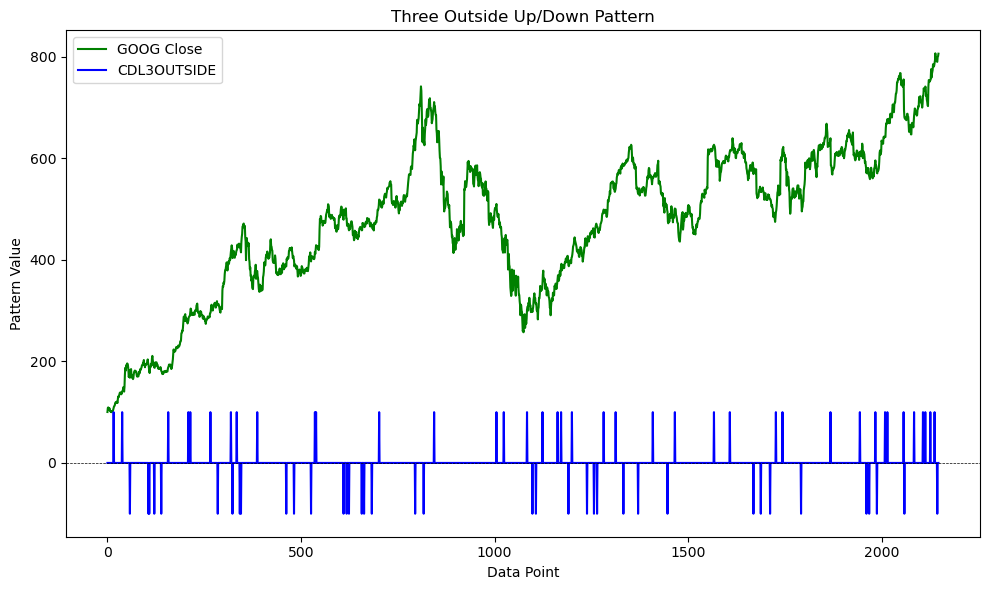

In [231]:
three_outside_pattern = talib.CDL3OUTSIDE(open_prices, high_prices, low_prices, close_prices)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(close_prices , label='GOOG Close', color='green')

# Plot the Three Outside Up/Down pattern
plt.plot(three_outside_pattern, label='CDL3OUTSIDE', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Three Outside Up/Down Pattern')
plt.xlabel('Data Point')
plt.ylabel('Pattern Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [124]:
class ThreeOutsidePatternStrategy(Strategy):
    def init(self):
        self.three_outside_pattern = self.I(talib.CDL3OUTSIDE, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.three_outside_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Three Outside pattern suggests a potential reversal
        elif self.three_outside_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ThreeOutsidePatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   63.594041
Equity Final [$]                     25620.76
Equity Peak [$]                      37816.44
Return [%]                           156.2076
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   11.669707
Volatility (Ann.) [%]               32.072838
Sharpe Ratio                          0.36385
Sortino Ratio                        0.639668
Calmar Ratio                         0.180227
Max. Drawdown [%]                  -64.750013
Avg. Drawdown [%]                   -6.271931
Max. Drawdown Duration     1967 days 00:00:00
Avg. Drawdown Duration       95 days 00:00:00
# Trades                                   18
Win Rate [%]                        72.222222
Best Trade [%]                      66.000845
Worst Trade [%]                    -57.458243
Avg. Trade [%]                    

73. **CDLSEPARATINGLINES (Separating Lines Candlestick Pattern):**

- *__Purpose__*: CDLSEPARATINGLINES identifies the Separating Lines candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLSEPARATINGLINES` function in Python. The Separating Lines pattern involves two candles indicating potential continuation.
- *__Strategy__*: The Separating Lines pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLSEPARATINGLINES with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLSEPARATINGLINES can help identify potential trend continuation.

In [66]:
print(talib.CDLSEPARATINGLINES.__doc__)

 CDLSEPARATINGLINES(open, high, low, close)

    Separating Lines (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


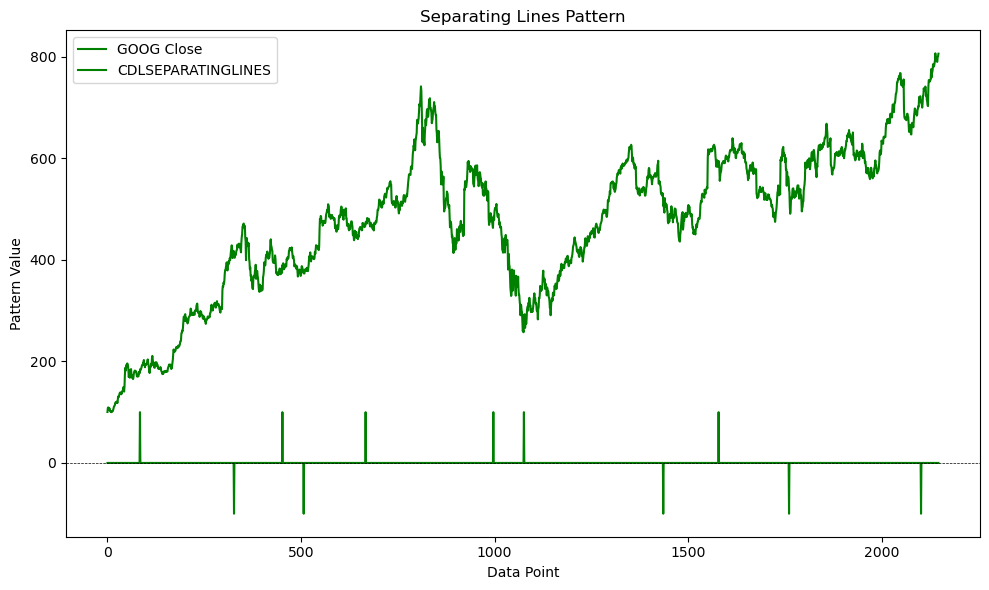

In [230]:
# Calculate the CDLSEPARATINGLINES pattern
separating_lines_pattern = talib.CDLSEPARATINGLINES(open_prices, high_prices, low_prices, close_prices)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(close_prices , label='GOOG Close', color='green')

# Plot the Separating Lines pattern
plt.plot(separating_lines_pattern, label='CDLSEPARATINGLINES', color='green')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Separating Lines Pattern')
plt.xlabel('Data Point')
plt.ylabel('Pattern Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [125]:
class SeparatingLinesPatternStrategy(Strategy):
    def init(self):
        self.separating_lines_pattern = self.I(talib.CDLSEPARATINGLINES, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.separating_lines_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Separating Lines pattern suggests a potential reversal
        elif self.separating_lines_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, SeparatingLinesPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   58.333333
Equity Final [$]                     20519.01
Equity Peak [$]                      32980.56
Return [%]                           105.1901
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    8.798198
Volatility (Ann.) [%]               29.929634
Sharpe Ratio                         0.293963
Sortino Ratio                        0.490867
Calmar Ratio                         0.136157
Max. Drawdown [%]                  -64.618066
Avg. Drawdown [%]                   -6.037801
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration       91 days 00:00:00
# Trades                                    4
Win Rate [%]                             50.0
Best Trade [%]                      124.56044
Worst Trade [%]                     -8.540799
Avg. Trade [%]                    

74. **CDLDOJISTAR (Doji Star Candlestick Pattern):**

- *__Purpose__*: CDLDOJISTAR identifies the Doji Star candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLDOJISTAR` function in Python. The Doji Star pattern involves two candles indicating potential reversal.
- *__Strategy__*: The Doji Star pattern suggests a potential reversal when it appears after a trend.
- *__Key Points__*: Combine CDLDOJISTAR with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLDOJISTAR can help identify potential trend reversals.

In [226]:
print(talib.CDLDOJISTAR.__doc__)

 CDLDOJISTAR(open, high, low, close)

    Doji Star (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


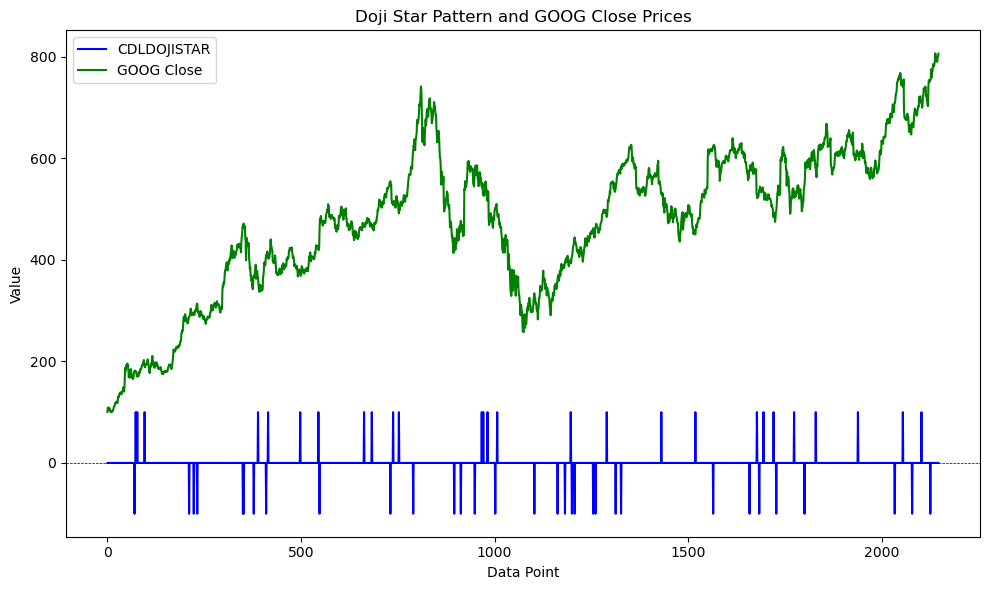

In [229]:
# Calculate the CDLDOJISTAR pattern
doji_star_pattern = talib.CDLDOJISTAR(open_prices, high_prices, low_prices, close_prices)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the CDLDOJISTAR pattern
plt.plot(doji_star_pattern, label='CDLDOJISTAR', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Plot GOOG's Close prices
plt.plot(close_prices , label='GOOG Close', color='green')

plt.title('Doji Star Pattern and GOOG Close Prices')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [126]:
class DojiStarPatternStrategy(Strategy):
    def init(self):
        self.doji_star_pattern = self.I(talib.CDLDOJISTAR, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.doji_star_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Doji Star pattern suggests a potential reversal
        elif self.doji_star_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, DojiStarPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   48.230912
Equity Final [$]                     30063.37
Equity Peak [$]                      31961.57
Return [%]                           200.6337
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   13.784376
Volatility (Ann.) [%]               26.496437
Sharpe Ratio                         0.520235
Sortino Ratio                        0.906657
Calmar Ratio                         0.264355
Max. Drawdown [%]                  -52.143422
Avg. Drawdown [%]                   -4.826748
Max. Drawdown Duration     1521 days 00:00:00
Avg. Drawdown Duration       68 days 00:00:00
# Trades                                   16
Win Rate [%]                             75.0
Best Trade [%]                      60.972492
Worst Trade [%]                    -33.635188
Avg. Trade [%]                    

75. **CDLHOMINGPIGEON (Homing Pigeon Candlestick Pattern):**

- *__Purpose__*: CDLHOMINGPIGEON identifies the Homing Pigeon candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLHOMINGPIGEON` function in Python. The Homing Pigeon pattern involves two candles indicating potential reversal.
- *__Strategy__*: The Homing Pigeon pattern suggests a potential bullish reversal when it appears after a downtrend.
- *__Key Points__*: Combine CDLHOMINGPIGEON with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLHOMINGPIGEON can help identify potential bullish reversals.

In [65]:
print(talib.CDLHOMINGPIGEON.__doc__)

 CDLHOMINGPIGEON(open, high, low, close)

    Homing Pigeon (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


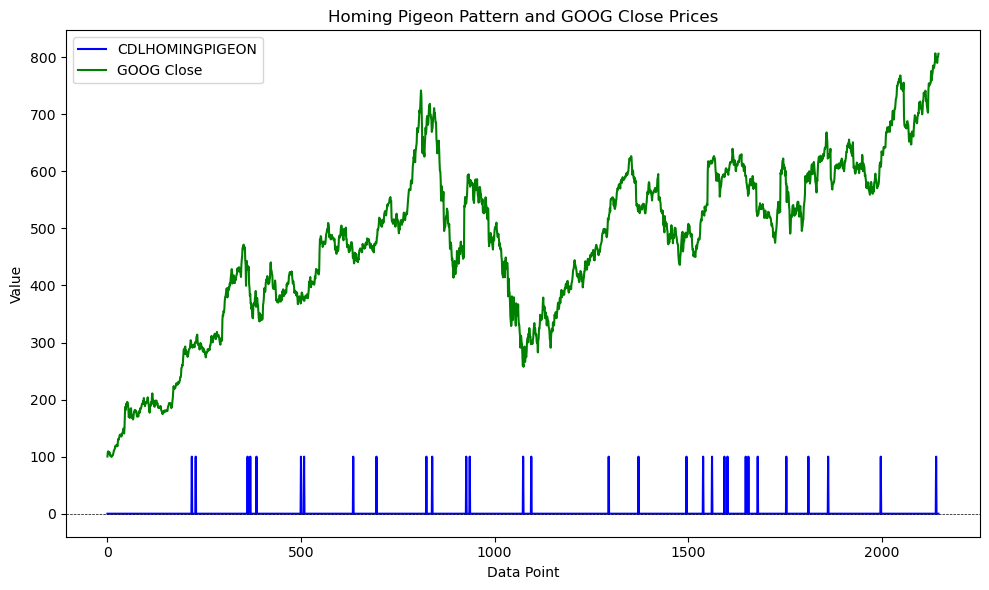

In [233]:
# Calculate the CDLHOMINGPIGEON pattern
homing_pigeon_pattern = talib.CDLHOMINGPIGEON(open_prices, high_prices, low_prices, close_prices)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the CDLHOMINGPIGEON pattern
plt.plot(homing_pigeon_pattern, label='CDLHOMINGPIGEON', color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Plot GOOG's Close prices
plt.plot(close_prices, label='GOOG Close', color='green')

plt.title('Homing Pigeon Pattern and GOOG Close Prices')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [127]:
class HomingPigeonPatternStrategy(Strategy):
    def init(self):
        self.homing_pigeon_pattern = self.I(talib.CDLHOMINGPIGEON, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.homing_pigeon_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Homing Pigeon pattern suggests a potential reversal
        elif self.homing_pigeon_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, HomingPigeonPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   89.804469
Equity Final [$]                     26591.08
Equity Peak [$]                      26889.73
Return [%]                           165.9108
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   12.157769
Volatility (Ann.) [%]               35.453565
Sharpe Ratio                         0.342921
Sortino Ratio                        0.586438
Calmar Ratio                         0.188204
Max. Drawdown [%]                  -64.598923
Avg. Drawdown [%]                   -5.293574
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       72 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     170.404013
Worst Trade [%]                    170.404013
Avg. Trade [%]                    

76. **HT_TRENDLINE (Hilbert Transform - Instantaneous Trendline):**

- *__Purpose__*: HT_TRENDLINE calculates the instantaneous trendline using the Hilbert Transform.
- *__Activation and Usage__*: Use the `talib.HT_TRENDLINE` function in Python. It helps identify potential trend changes based on the instantaneous trendline.
- *__Strategy__*: HT_TRENDLINE can help assess potential trend changes in the market.
- *__Key Points__*: Combine HT_TRENDLINE with other trend-following indicators for confirmation.
- *__Effective Conditions__*: HT_TRENDLINE is useful for identifying potential trend changes.

In [64]:
print(talib.HT_TRENDLINE.__doc__)

 HT_TRENDLINE(real)

    Hilbert Transform - Instantaneous Trendline (Overlap Studies)

    Inputs:
        real: (any ndarray)
    Outputs:
        real
    


In [128]:
class HtTrendlineStrategy(Strategy):
    def init(self):
        self.ht_trendline = self.I(talib.HT_TRENDLINE, self.data.Close)

    def next(self):
        if self.data.Close[-1] > self.ht_trendline[-1]:
            if not self.position:
                self.buy()  # Price above HT Trendline
        elif self.data.Close[-1] < self.ht_trendline[-1]:
            if self.position:
                self.position.close()  # Price below HT Trendline

bt = Backtest(GOOG, HtTrendlineStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   59.124767
Equity Final [$]                     64050.61
Equity Peak [$]                      64774.61
Return [%]                           540.5061
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    24.34263
Volatility (Ann.) [%]               27.618946
Sharpe Ratio                         0.881374
Sortino Ratio                        1.775423
Calmar Ratio                         0.754841
Max. Drawdown [%]                  -32.248678
Avg. Drawdown [%]                   -4.563322
Max. Drawdown Duration      575 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                                   86
Win Rate [%]                        39.534884
Best Trade [%]                      57.145901
Worst Trade [%]                     -6.806156
Avg. Trade [%]                    

77. **CDLLONGLEGGEDDOJI (Long Legged Doji Candlestick Pattern):**

- *__Purpose__*: CDLLONGLEGGEDDOJI identifies the Long Legged Doji candlestick pattern, which suggests market indecision.
- *__Activation and Usage__*: Use the `talib.CDLLONGLEGGEDDOJI` function in Python. The Long Legged Doji pattern involves a candle with long upper and lower shadows.
- *__Strategy__*: The Long Legged Doji pattern indicates uncertainty between buyers and sellers.
- *__Key Points__*: Combine CDLLONGLEGGEDDOJI with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLLONGLEGGEDDOJI can help identify potential periods of market indecision.

In [63]:
print(talib.CDLLONGLEGGEDDOJI.__doc__)

 CDLLONGLEGGEDDOJI(open, high, low, close)

    Long Legged Doji (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [129]:
class LongLeggedDojiPatternStrategy(Strategy):
    def init(self):
        self.long_legged_doji_pattern = self.I(talib.CDLLONGLEGGEDDOJI, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.long_legged_doji_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Long-Legged Doji pattern suggests a potential reversal
        elif self.long_legged_doji_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, LongLeggedDojiPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

78. **CDL3INSIDE (Three Inside Up/Down Candlestick Pattern):**

- *__Purpose__*: CDL3INSIDE identifies the Three Inside Up/Down candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDL3INSIDE` function in Python. The Three Inside Up/Down pattern involves three candles indicating potential continuation.
- *__Strategy__*: The Three Inside Up/Down pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDL3INSIDE with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDL3INSIDE can help identify potential trend continuation.

In [62]:
print(talib.CDL3INSIDE.__doc__)

 CDL3INSIDE(open, high, low, close)

    Three Inside Up/Down (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [130]:

class ThreeInsidePatternStrategy(Strategy):
    def init(self):
        self.three_inside_pattern = self.I(talib.CDL3INSIDE, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.three_inside_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Three Inside pattern suggests a potential reversal
        elif self.three_inside_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ThreeInsidePatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   62.802607
Equity Final [$]                     29626.02
Equity Peak [$]                      29960.87
Return [%]                           196.2602
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   13.588921
Volatility (Ann.) [%]               27.587983
Sharpe Ratio                         0.492567
Sortino Ratio                        0.823193
Calmar Ratio                         0.275993
Max. Drawdown [%]                  -49.236403
Avg. Drawdown [%]                   -6.574368
Max. Drawdown Duration     1791 days 00:00:00
Avg. Drawdown Duration       91 days 00:00:00
# Trades                                    8
Win Rate [%]                             62.5
Best Trade [%]                      88.848107
Worst Trade [%]                    -12.699018
Avg. Trade [%]                    

79. **CDL3LINESTRIKE (Three-Line Strike Candlestick Pattern):**

- *__Purpose__*: CDL3LINESTRIKE identifies the Three-Line Strike candlestick pattern, which suggests a potential trend reversal or continuation.
- *__Activation and Usage__*: Use the `talib.CDL3LINESTRIKE` function in Python. The Three-Line Strike pattern involves four candles indicating potential reversal or continuation.
- *__Strategy__*: The Three-Line Strike pattern may signal a strong reversal or continuation of the trend.
- *__Key Points__*: Combine CDL3LINESTRIKE with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDL3LINESTRIKE can help identify potential trend reversals or continuations.

In [61]:
print(talib.CDL3LINESTRIKE.__doc__)

 CDL3LINESTRIKE(open, high, low, close)

    Three-Line Strike  (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [131]:
class ThreeLineStrikePatternStrategy(Strategy):
    def init(self):
        self.three_line_strike_pattern = self.I(talib.CDL3LINESTRIKE, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.three_line_strike_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Three Line Strike pattern suggests a potential reversal
        elif self.three_line_strike_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ThreeLineStrikePatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   83.519553
Equity Final [$]                     17003.29
Equity Peak [$]                      17193.34
Return [%]                            70.0329
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    6.425516
Volatility (Ann.) [%]               32.308761
Sharpe Ratio                         0.198878
Sortino Ratio                        0.318204
Calmar Ratio                         0.099984
Max. Drawdown [%]                  -64.265487
Avg. Drawdown [%]                   -6.733369
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration      111 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      71.824858
Worst Trade [%]                     71.824858
Avg. Trade [%]                    

80. **CDLDARKCLOUDCOVER (Dark Cloud Cover Candlestick Pattern):**

- *__Purpose__*: CDLDARKCLOUDCOVER identifies the Dark Cloud Cover candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLDARKCLOUDCOVER` function in Python. The Dark Cloud Cover pattern involves two candles indicating potential reversal.
- *__Strategy__*: The Dark Cloud Cover pattern suggests a potential bearish reversal when it appears after an uptrend.
- *__Key Points__*: Combine CDLDARKCLOUDCOVER with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLDARKCLOUDCOVER can help identify potential bearish reversals.

In [60]:
print(talib.CDLDARKCLOUDCOVER.__doc__)

 CDLDARKCLOUDCOVER(open, high, low, close[, penetration=?])

    Dark Cloud Cover (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Parameters:
        penetration: 0.5
    Outputs:
        integer (values are -100, 0 or 100)
    


In [132]:
class DarkCloudCoverPatternStrategy(Strategy):
    def init(self):
        self.dark_cloud_cover_pattern = self.I(talib.CDLDARKCLOUDCOVER, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.dark_cloud_cover_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Dark Cloud Cover pattern suggests a potential reversal
        elif self.dark_cloud_cover_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, DarkCloudCoverPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

81. **CDLCOUNTERATTACK (Counterattack Candlestick Pattern):**

- *__Purpose__*: CDLCOUNTERATTACK identifies the Counterattack candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLCOUNTERATTACK` function in Python. The Counterattack pattern involves two candles indicating potential reversal.
- *__Strategy__*: The Counterattack pattern suggests a potential reversal when it appears after a trend.
- *__Key Points__*: Combine CDLCOUNTERATTACK with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLCOUNTERATTACK can help identify potential trend reversals.

In [59]:
print(talib.CDLCOUNTERATTACK.__doc__)

 CDLCOUNTERATTACK(open, high, low, close)

    Counterattack (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [133]:
class CounterattackPatternStrategy(Strategy):
    def init(self):
        self.counterattack_pattern = self.I(talib.CDLCOUNTERATTACK, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.counterattack_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Counterattack pattern suggests a potential reversal
        elif self.counterattack_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, CounterattackPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   29.841713
Equity Final [$]                       3824.0
Equity Peak [$]                       10779.6
Return [%]                             -61.76
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                  -10.664998
Volatility (Ann.) [%]               21.716977
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -66.204683
Avg. Drawdown [%]                  -13.926575
Max. Drawdown Duration      913 days 00:00:00
Avg. Drawdown Duration      186 days 00:00:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                     -63.149284
Worst Trade [%]                    -63.149284
Avg. Trade [%]                    

82. **CDLHANGINGMAN (Hanging Man Candlestick Pattern):**

- *__Purpose__*: CDLHANGINGMAN identifies the Hanging Man candlestick pattern, which suggests a potential bearish reversal.
- *__Activation and Usage__*: Use the `talib.CDLHANGINGMAN` function in Python. The Hanging Man pattern involves a candle with a small body and long lower shadow.
- *__Strategy__*: The Hanging Man pattern suggests a potential bearish reversal after an uptrend.
- *__Key Points__*: Combine CDLHANGINGMAN with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLHANGINGMAN can help identify potential bearish reversals.

In [58]:
print(talib.CDLHANGINGMAN.__doc__)

 CDLHANGINGMAN(open, high, low, close)

    Hanging Man (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [134]:
class HangingManPatternStrategy(Strategy):
    def init(self):
        self.hanging_man_pattern = self.I(talib.CDLHANGINGMAN, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.hanging_man_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Hanging Man pattern suggests a potential reversal
        elif self.hanging_man_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, HangingManPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

83. **CDLCLOSINGMARUBOZU (Closing Marubozu Candlestick Pattern):**

- *__Purpose__*: CDLCLOSINGMARUBOZU identifies the Closing Marubozu candlestick pattern, which suggests strong momentum.
- *__Activation and Usage__*: Use the `talib.CDLCLOSINGMARUBOZU` function in Python. The Closing Marubozu pattern involves a candle with no shadows.
- *__Strategy__*: The Closing Marubozu pattern suggests strong buying or selling momentum.
- *__Key Points__*: Combine CDLCLOSINGMARUBOZU with other momentum indicators for confirmation.
- *__Effective Conditions__*: CDLCLOSINGMARUBOZU can help identify strong momentum.

In [57]:
print(talib.CDLCLOSINGMARUBOZU.__doc__)

 CDLCLOSINGMARUBOZU(open, high, low, close)

    Closing Marubozu (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [135]:
class ClosingMarubozuPatternStrategy(Strategy):
    def init(self):
        self.closing_marubozu_pattern = self.I(talib.CDLCLOSINGMARUBOZU, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.closing_marubozu_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Closing Marubozu pattern suggests a potential reversal
        elif self.closing_marubozu_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ClosingMarubozuPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   57.309125
Equity Final [$]                     41193.24
Equity Peak [$]                      45424.78
Return [%]                           311.9324
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   18.067514
Volatility (Ann.) [%]               29.880217
Sharpe Ratio                         0.604665
Sortino Ratio                        1.149284
Calmar Ratio                         0.403719
Max. Drawdown [%]                  -44.752696
Avg. Drawdown [%]                   -3.899757
Max. Drawdown Duration     1433 days 00:00:00
Avg. Drawdown Duration       54 days 00:00:00
# Trades                                   85
Win Rate [%]                        47.058824
Best Trade [%]                      40.712468
Worst Trade [%]                    -13.610144
Avg. Trade [%]                    

84. **CDLBREAKAWAY (Breakaway Candlestick Pattern):**

- *__Purpose__*: CDLBREAKAWAY identifies the Breakaway candlestick pattern, which suggests a potential trend continuation or reversal.
- *__Activation and Usage__*: Use the `talib.CDLBREAKAWAY` function in Python. The Breakaway pattern involves several candles indicating potential continuation or reversal.
- *__Strategy__*: The Breakaway pattern suggests a potential continuation or reversal, depending on its appearance.
- *__Key Points__*: Combine CDLBREAKAWAY with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLBREAKAWAY can help identify potential trend continuation or reversal.

In [ ]:
print(talib.CDLBREAKAWAY.__doc__)

In [136]:

class BreakawayPatternStrategy(Strategy):
    def init(self):
        self.breakaway_pattern = self.I(talib.CDLBREAKAWAY, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.breakaway_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Breakaway pattern suggests a potential reversal
        elif self.breakaway_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, BreakawayPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

85. **LINEARREG_ANGLE (Linear Regression Angle):**

- *__Purpose__*: LINEARREG_ANGLE calculates the angle of the linear regression line.
- *__Activation and Usage__*: Use the `talib.LINEARREG_ANGLE` function in Python. It helps identify the steepness of the linear regression line.
- *__Strategy__*: LINEARREG_ANGLE can help assess the slope and direction of the linear regression line.
- *__Key Points__*: Combine LINEARREG_ANGLE with other trend-following indicators for confirmation.
- *__Effective Conditions__*: LINEARREG_ANGLE is valuable for assessing trend direction.

In [56]:
print(talib.LINEARREG_ANGLE.__doc__)

 LINEARREG_ANGLE(real[, timeperiod=?])

    Linear Regression Angle (Statistic Functions)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


In [137]:
class LinearRegressionAngleStrategy(Strategy):
    def init(self):
        self.linearreg_angle = self.I(talib.LINEARREG_ANGLE, self.data.Close, timeperiod=14)

    def next(self):
        if self.linearreg_angle[-1] > 30:  # Adjust the threshold as needed
            if not self.position:
                self.buy()  # Linear Regression Angle suggests a potential uptrend
        elif self.linearreg_angle[-1] < -30:  # Adjust the threshold as needed
            if self.position:
                self.position.close()

bt = Backtest(GOOG, LinearRegressionAngleStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.499069
Equity Final [$]                      71099.1
Equity Peak [$]                      71904.55
Return [%]                            610.991
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.874965
Volatility (Ann.) [%]               31.255998
Sharpe Ratio                          0.82784
Sortino Ratio                         1.71545
Calmar Ratio                         1.013845
Max. Drawdown [%]                  -25.521629
Avg. Drawdown [%]                   -3.994963
Max. Drawdown Duration      520 days 00:00:00
Avg. Drawdown Duration       44 days 00:00:00
# Trades                                   54
Win Rate [%]                        51.851852
Best Trade [%]                      47.815067
Worst Trade [%]                    -12.639878
Avg. Trade [%]                    

86. **CDLXSIDEGAP3METHODS (X-Side Gap Three Methods Candlestick Pattern):**

- *__Purpose__*: CDLXSIDEGAP3METHODS identifies the X-Side Gap Three Methods candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLXSIDEGAP3METHODS` function in Python. The X-Side Gap Three Methods pattern involves three candles indicating potential continuation.
- *__Strategy__*: The X-Side Gap Three Methods pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLXSIDEGAP3METHODS with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLXSIDEGAP3METHODS can help identify potential trend continuation.

In [55]:
print(talib.CDLXSIDEGAP3METHODS.__doc__)

 CDLXSIDEGAP3METHODS(open, high, low, close)

    Upside/Downside Gap Three Methods (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [138]:
class XSideGap3MethodsPatternStrategy(Strategy):
    def init(self):
        self.xsidegap3_methods_pattern = self.I(talib.CDLXSIDEGAP3METHODS, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.xsidegap3_methods_pattern[-1] > 0:
            if not self.position:
                self.buy()  # XSide Gap Three Methods pattern suggests a potential reversal
        elif self.xsidegap3_methods_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, XSideGap3MethodsPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    39.52514
Equity Final [$]                      8017.05
Equity Peak [$]                      14400.59
Return [%]                           -19.8295
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   -2.559581
Volatility (Ann.) [%]               23.272777
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -66.752404
Avg. Drawdown [%]                   -8.096006
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration      201 days 00:00:00
# Trades                                    3
Win Rate [%]                        66.666667
Best Trade [%]                      32.844892
Worst Trade [%]                    -47.533711
Avg. Trade [%]                    

87. **CDLMATHOLD (Mat Hold Candlestick Pattern):**

- *__Purpose__*: CDLMATHOLD identifies the Mat Hold candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLMATHOLD` function in Python. The Mat Hold pattern involves several candles indicating potential continuation.
- *__Strategy__*: The Mat Hold pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLMATHOLD with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLMATHOLD can help identify potential trend continuation.

In [54]:
print(talib.CDLMATHOLD.__doc__)

 CDLMATHOLD(open, high, low, close[, penetration=?])

    Mat Hold (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Parameters:
        penetration: 0.5
    Outputs:
        integer (values are -100, 0 or 100)
    


In [139]:
class MatHoldPatternStrategy(Strategy):
    def init(self):
        self.mathold_pattern = self.I(talib.CDLMATHOLD, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.mathold_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Mat Hold pattern suggests a potential continuation
        elif self.mathold_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MatHoldPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

88. **MIDPOINT (Midpoint Price):**

- *__Purpose__*: MIDPOINT calculates the midpoint price within a specified period.
- *__Activation and Usage__*: Use the `talib.MIDPOINT` function in Python. MIDPOINT helps identify the average price level over a given period.
- *__Strategy__*: MIDPOINT can help assess the general price level over time.
- *__Key Points__*: Combine MIDPOINT with other price-based indicators for comprehensive analysis.
- *__Effective Conditions__*: MIDPOINT is valuable for evaluating the average price.

In [53]:
print(talib.MIDPOINT.__doc__)

 MIDPOINT(real[, timeperiod=?])

    MidPoint over period (Overlap Studies)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


In [140]:
class MidpointStrategy(Strategy):
    def init(self):
        self.midpoint = self.I(talib.MIDPOINT, self.data.Close, timeperiod=14)

    def next(self):
        if self.midpoint[-1] > 0:  # You can adjust the threshold as needed
            if not self.position:
                self.buy()  # Midpoint indicates a potential uptrend
        elif self.midpoint[-1] < 0:  # You can adjust the threshold as needed
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MidpointStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

89. **CDLLONGLINE (Long Line Candlestick Pattern):**

- *__Purpose__*: CDLLONGLINE identifies the Long Line candlestick pattern, which suggests strong momentum.
- *__Activation and Usage__*: Use the `talib.CDLLONGLINE` function in Python. The Long Line pattern involves a long candle indicating strong buying or selling pressure.
- *__Strategy__*: The Long Line pattern suggests strong momentum in the market.
- *__Key Points__*: Combine CDLLONGLINE with other momentum indicators for confirmation.
- *__Effective Conditions__*: CDLLONGLINE can help identify strong momentum.

In [52]:
print(talib.CDLLONGLINE.__doc__)

 CDLLONGLINE(open, high, low, close)

    Long Line Candle (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [141]:
class LongLinePatternStrategy(Strategy):
    def init(self):
        self.longline_pattern = self.I(talib.CDLLONGLINE, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.longline_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Long Line pattern suggests a potential reversal
        elif self.longline_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, LongLinePatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   54.050279
Equity Final [$]                     25235.63
Equity Peak [$]                      28865.43
Return [%]                           152.3563
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   11.471455
Volatility (Ann.) [%]               24.599451
Sharpe Ratio                          0.46633
Sortino Ratio                        0.808062
Calmar Ratio                         0.329896
Max. Drawdown [%]                  -34.772945
Avg. Drawdown [%]                   -4.950246
Max. Drawdown Duration     1051 days 00:00:00
Avg. Drawdown Duration       88 days 00:00:00
# Trades                                  121
Win Rate [%]                        46.280992
Best Trade [%]                      24.736282
Worst Trade [%]                    -16.989657
Avg. Trade [%]                    

90. **CDLUNIQUE3RIVER (Unique Three River Candlestick Pattern):**

- *__Purpose__*: CDLUNIQUE3RIVER identifies the Unique Three River candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLUNIQUE3RIVER` function in Python. The Unique Three River pattern involves several candles indicating potential continuation.
- *__Strategy__*: The Unique Three River pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLUNIQUE3RIVER with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLUNIQUE3RIVER can help identify potential trend continuation.

In [51]:
print(talib.CDLUNIQUE3RIVER.__doc__)

 CDLUNIQUE3RIVER(open, high, low, close)

    Unique 3 River (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [142]:
class Unique3RiverPatternStrategy(Strategy):
    def init(self):
        self.unique3river_pattern = self.I(talib.CDLUNIQUE3RIVER, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.unique3river_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Unique Three River pattern suggests a potential reversal
        elif self.unique3river_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, Unique3RiverPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   76.256983
Equity Final [$]                     20976.94
Equity Peak [$]                      21212.24
Return [%]                           109.7694
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                     9.08029
Volatility (Ann.) [%]               31.397301
Sharpe Ratio                         0.289206
Sortino Ratio                        0.476966
Calmar Ratio                         0.140754
Max. Drawdown [%]                  -64.511585
Avg. Drawdown [%]                   -4.945211
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       83 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     112.401161
Worst Trade [%]                    112.401161
Avg. Trade [%]                    

91. **CDLSTALLEDPATTERN (Stalled Pattern Candlestick Pattern):**

- *__Purpose__*: CDLSTALLEDPATTERN identifies the Stalled Pattern candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLSTALLEDPATTERN` function in Python. The Stalled Pattern involves several candles indicating potential continuation.
- *__Strategy__*: The Stalled Pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLSTALLEDPATTERN with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLSTALLEDPATTERN can help identify potential trend continuation.

In [50]:
print(talib.CDLSTALLEDPATTERN.__doc__)

 CDLSTALLEDPATTERN(open, high, low, close)

    Stalled Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [143]:
class StalledPatternStrategy(Strategy):
    def init(self):
        self.stalled_pattern = self.I(talib.CDLSTALLEDPATTERN, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.stalled_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Stalled pattern suggests a potential reversal
        elif self.stalled_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, StalledPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

92. **CDL3WHITESOLDIERS (Three White Soldiers Candlestick Pattern):**

- *__Purpose__*: CDL3WHITESOLDIERS identifies the Three White Soldiers candlestick pattern, which suggests a potential bullish reversal.
- *__Activation and Usage__*: Use the `talib.CDL3WHITESOLDIERS` function in Python. The Three White Soldiers pattern involves three consecutive bullish candles indicating potential reversal.
- *__Strategy__*: The Three White Soldiers pattern suggests a potential bullish reversal after a downtrend.
- *__Key Points__*: Combine CDL3WHITESOLDIERS with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDL3WHITESOLDIERS can help identify potential bullish reversals.

In [49]:
print(talib.CDL3WHITESOLDIERS.__doc__)

 CDL3WHITESOLDIERS(open, high, low, close)

    Three Advancing White Soldiers (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [144]:
class ThreeWhiteSoldiersPatternStrategy(Strategy):
    def init(self):
        self.three_white_soldiers_pattern = self.I(talib.CDL3WHITESOLDIERS, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.three_white_soldiers_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Three White Soldiers pattern suggests a potential reversal
        elif self.three_white_soldiers_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ThreeWhiteSoldiersPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

93. **CDLONNECK (On-Neck Pattern Candlestick Pattern):**

- *__Purpose__*: CDLONNECK identifies the On-Neck Pattern candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLONNECK` function in Python. The On-Neck Pattern involves two candles indicating potential continuation.
- *__Strategy__*: The On-Neck Pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLONNECK with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLONNECK can help identify potential trend continuation.

In [48]:
print(talib.CDLONNECK.__doc__)

 CDLONNECK(open, high, low, close)

    On-Neck Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [145]:
class OnNeckPatternStrategy(Strategy):
    def init(self):
        self.on_neck_pattern = self.I(talib.CDLONNECK, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.on_neck_pattern[-1] > 0:
            if not self.position:
                self.buy()  # On Neck pattern suggests a potential reversal
        elif self.on_neck_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, OnNeckPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

94. **CDL3STARSINSOUTH (Three Stars In The South Candlestick Pattern):**

- *__Purpose__*: CDL3STARSINSOUTH identifies the Three Stars In The South candlestick pattern, which suggests a potential bullish reversal.
- *__Activation and Usage__*: Use the `talib.CDL3STARSINSOUTH` function in Python. The Three Stars In The South pattern involves three consecutive candles indicating potential reversal.
- *__Strategy__*: The Three Stars In The South pattern suggests a potential bullish reversal after a downtrend.
- *__Key Points__*: Combine CDL3STARSINSOUTH with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDL3STARSINSOUTH can help identify potential bullish reversals.

In [47]:
print(talib.CDL3STARSINSOUTH.__doc__)

 CDL3STARSINSOUTH(open, high, low, close)

    Three Stars In The South (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [146]:
class ThreeStarsInSouthPatternStrategy(Strategy):
    def init(self):
        self.three_stars_in_south_pattern = self.I(talib.CDL3STARSINSOUTH, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.three_stars_in_south_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Three Stars In South pattern suggests a potential reversal
        elif self.three_stars_in_south_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ThreeStarsInSouthPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

95. **CDLINNECK (In-Neck Pattern Candlestick Pattern):**

- *__Purpose__*: CDLINNECK identifies the In-Neck Pattern candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLINNECK` function in Python. The In-Neck Pattern involves two candles indicating potential continuation.
- *__Strategy__*: The In-Neck Pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLINNECK with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLINNECK can help identify potential trend continuation.

In [46]:
print(talib.CDLINNECK.__doc__)

 CDLINNECK(open, high, low, close)

    In-Neck Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [147]:
class InNeckPatternStrategy(Strategy):
    def init(self):
        self.in_neck_pattern = self.I(talib.CDLINNECK, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.in_neck_pattern[-1] > 0:
            if not self.position:
                self.buy()  # In Neck pattern suggests a potential reversal
        elif self.in_neck_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, InNeckPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

96. **SAREXT (SAR Extension):**

- *__Purpose__*: SAREXT calculates the Parabolic SAR values with extensions.
- *__Activation and Usage__*: Use the `talib.SAREXT` function in Python. SAREXT calculates Parabolic SAR values with extensions to track potential price trends.
- *__Strategy__*: SAREXT can help identify potential trend reversals and continuation points.
- *__Key Points__*: Combine SAREXT with other trend-following indicators for confirmation.
- *__Effective Conditions__*: SAREXT is valuable for assessing potential trend changes.


In [45]:
print(talib.SAREXT.__doc__)

 SAREXT(high, low[, startvalue=?, offsetonreverse=?, accelerationinitlong=?, accelerationlong=?, accelerationmaxlong=?, accelerationinitshort=?, accelerationshort=?, accelerationmaxshort=?])

    Parabolic SAR - Extended (Overlap Studies)

    Inputs:
        prices: ['high', 'low']
    Parameters:
        startvalue: 0
        offsetonreverse: 0
        accelerationinitlong: 0.02
        accelerationlong: 0.02
        accelerationmaxlong: 0.2
        accelerationinitshort: 0.02
        accelerationshort: 0.02
        accelerationmaxshort: 0.2
    Outputs:
        real
    


In [150]:
class ParabolicSARStrategy(Strategy):
    start_value = 0
    offset_on_reverse = 0
    acceleration_initlong = 0.02
    acceleration_long = 0.02
    acceleration_maxlong = 0.2
    acceleration_initshort = 0.02
    acceleration_short = 0.02
    acceleration_maxshort = 0.2
    
    def init(self):
        self.parabolic_sar = self.I(talib.SAREXT, GOOG['High'], GOOG['Low'], self.start_value, self.offset_on_reverse, self.acceleration_initlong, self.acceleration_long, self.acceleration_maxlong, self.acceleration_initshort, self.acceleration_short, self.acceleration_maxshort)

    def next(self):
        if self.data.Close > self.parabolic_sar[-1]:
            if not self.position:
                self.buy()  # Buy when price crosses above Parabolic SAR
        else:
            if self.position:
                self.position.close()  # Close long position when price crosses below Parabolic SAR

bt = Backtest(GOOG, ParabolicSARStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.860335
Equity Final [$]                     71103.84
Equity Peak [$]                      71909.29
Return [%]                           611.0384
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    25.87595
Volatility (Ann.) [%]               44.313021
Sharpe Ratio                         0.583936
Sortino Ratio                        1.156586
Calmar Ratio                         0.396893
Max. Drawdown [%]                  -65.196362
Avg. Drawdown [%]                   -5.458175
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     617.188062
Worst Trade [%]                    617.188062
Avg. Trade [%]                    

97. **OBV (On-Balance Volume):**

- *__Purpose__*: OBV calculates the On-Balance Volume indicator to track volume-based price trends.
- *__Activation and Usage__*: Use the `talib.OBV` function in Python. OBV tracks the cumulative volume flow relative to price movements.
- *__Strategy__*: OBV can help confirm price trends based on volume changes.
- *__Key Points__*: Combine OBV with other indicators to assess price-volume dynamics.
- *__Effective Conditions__*: OBV is useful for identifying potential price trends based on volume changes.

In [44]:
print(talib.OBV.__doc__)

 OBV(real, volume)

    On Balance Volume (Volume Indicators)

    Inputs:
        real: (any ndarray)
        prices: ['volume']
    Outputs:
        real
    


In [152]:
class OBVStrategy(Strategy):
    def init(self):
        self.obv = self.I(talib.OBV, GOOG['Close'], GOOG['Volume'])

    def next(self):
        if self.obv[-1] > self.obv[-2]:
            if not self.position:
                self.buy()  # Buy when OBV is increasing
        elif self.obv[-1] < self.obv[-2]:
            if self.position:
                self.position.close()  # Close long position when OBV is decreasing

bt = Backtest(GOOG, OBVStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   77.141527
Equity Final [$]                     31537.34
Equity Peak [$]                      32177.33
Return [%]                           215.3734
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    14.42512
Volatility (Ann.) [%]               28.065788
Sharpe Ratio                         0.513975
Sortino Ratio                        0.926562
Calmar Ratio                         0.267085
Max. Drawdown [%]                  -54.009415
Avg. Drawdown [%]                   -4.854268
Max. Drawdown Duration     1871 days 00:00:00
Avg. Drawdown Duration       78 days 00:00:00
# Trades                                  542
Win Rate [%]                        46.125461
Best Trade [%]                      17.465926
Worst Trade [%]                     -8.844748
Avg. Trade [%]                    

98. **CDLHARAMI (Harami Candlestick Pattern):**

- *__Purpose__*: CDLHARAMI identifies the Harami candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLHARAMI` function in Python. The Harami pattern involves two candles indicating potential reversal.
- *__Strategy__*: The Harami pattern suggests a potential reversal when it appears after a trend.
- *__Key Points__*: Combine CDLHARAMI with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLHARAMI can help identify potential trend reversals.

In [43]:
print(talib.CDLHARAMI.__doc__)

 CDLHARAMI(open, high, low, close)

    Harami Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [153]:
class HaramiPatternStrategy(Strategy):
    def init(self):
        self.harami_pattern = self.I(talib.CDLHARAMI, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.harami_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Harami pattern suggests a potential reversal
        elif self.harami_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, HaramiPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   55.540037
Equity Final [$]                     34436.91
Equity Peak [$]                      34826.06
Return [%]                           244.3691
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   15.611979
Volatility (Ann.) [%]               29.934586
Sharpe Ratio                         0.521537
Sortino Ratio                        0.955153
Calmar Ratio                          0.42255
Max. Drawdown [%]                   -36.94705
Avg. Drawdown [%]                    -4.68672
Max. Drawdown Duration     1156 days 00:00:00
Avg. Drawdown Duration       65 days 00:00:00
# Trades                                   41
Win Rate [%]                        56.097561
Best Trade [%]                      31.111571
Worst Trade [%]                    -12.865765
Avg. Trade [%]                    

99. **CDLTHRUSTING (Thrusting Pattern Candlestick Pattern):**

- *__Purpose__*: CDLTHRUSTING identifies the Thrusting Pattern candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLTHRUSTING` function in Python. The Thrusting Pattern involves two candles indicating potential continuation.
- *__Strategy__*: The Thrusting Pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLTHRUSTING with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLTHRUSTING can help identify potential trend continuation.

In [42]:
print(talib.CDLTHRUSTING.__doc__)

 CDLTHRUSTING(open, high, low, close)

    Thrusting Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [154]:

class ThrustingPatternStrategy(Strategy):
    def init(self):
        self.thrusting_pattern = self.I(talib.CDLTHRUSTING, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.thrusting_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Thrusting pattern suggests a potential reversal
        elif self.thrusting_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ThrustingPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

100. **CDLDRAGONFLYDOJI (Dragonfly Doji Candlestick Pattern):**

- *__Purpose__*: CDLDRAGONFLYDOJI identifies the Dragonfly Doji candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLDRAGONFLYDOJI` function in Python. The Dragonfly Doji pattern involves a candle with a small body and no lower shadow.
- *__Strategy__*: The Dragonfly Doji pattern suggests a potential bullish reversal when it appears after a downtrend.
- *__Key Points__*: Combine CDLDRAGONFLYDOJI with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLDRAGONFLYDOJI can help identify potential bullish reversals.

In [41]:
print(talib.CDLDRAGONFLYDOJI.__doc__)

 CDLDRAGONFLYDOJI(open, high, low, close)

    Dragonfly Doji (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [155]:
class DragonflyDojiPatternStrategy(Strategy):
    def init(self):
        self.dragonfly_doji_pattern = self.I(talib.CDLDRAGONFLYDOJI, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.dragonfly_doji_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Dragonfly Doji pattern suggests a potential reversal
        elif self.dragonfly_doji_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, DragonflyDojiPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

101. **CDLSHORTLINE (Short Line Candlestick Pattern):**

- *__Purpose__*: CDLSHORTLINE identifies the Short Line candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLSHORTLINE` function in Python. The Short Line pattern involves a short-bodied candle indicating potential continuation.
- *__Strategy__*: The Short Line pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLSHORTLINE with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLSHORTLINE can help identify potential trend continuation.


In [40]:
print(talib.CDLSHORTLINE.__doc__)

 CDLSHORTLINE(open, high, low, close)

    Short Line Candle (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [156]:
class ShortLinePatternStrategy(Strategy):
    def init(self):
        self.short_line_pattern = self.I(talib.CDLSHORTLINE, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.short_line_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Short Line pattern suggests a potential reversal
        elif self.short_line_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ShortLinePatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   47.392924
Equity Final [$]                     14486.87
Equity Peak [$]                      20906.99
Return [%]                            44.8687
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                     4.44443
Volatility (Ann.) [%]               22.360612
Sharpe Ratio                         0.198762
Sortino Ratio                        0.313616
Calmar Ratio                          0.08761
Max. Drawdown [%]                  -50.729876
Avg. Drawdown [%]                   -6.182349
Max. Drawdown Duration     1892 days 00:00:00
Avg. Drawdown Duration      132 days 00:00:00
# Trades                                   65
Win Rate [%]                        58.461538
Best Trade [%]                      35.631501
Worst Trade [%]                    -34.732465
Avg. Trade [%]                    

102. **CDLUPSIDEGAP2CROWS (Upside Gap Two Crows Candlestick Pattern):**

- *__Purpose__*: CDLUPSIDEGAP2CROWS identifies the Upside Gap Two Crows candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLUPSIDEGAP2CROWS` function in Python. The Upside Gap Two Crows pattern involves three candles indicating potential reversal.
- *__Strategy__*: The Upside Gap Two Crows pattern suggests a potential bearish reversal when it appears after an uptrend.
- *__Key Points__*: Combine CDLUPSIDEGAP2CROWS with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLUPSIDEGAP2CROWS can help identify potential bearish reversals.

In [39]:
print(talib.CDLUPSIDEGAP2CROWS.__doc__)

 CDLUPSIDEGAP2CROWS(open, high, low, close)

    Upside Gap Two Crows (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [157]:
class UpsideGapTwoCrowsPatternStrategy(Strategy):
    def init(self):
        self.upside_gap_two_crows_pattern = self.I(talib.CDLUPSIDEGAP2CROWS, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.upside_gap_two_crows_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Upside Gap Two Crows pattern suggests a potential reversal
        elif self.upside_gap_two_crows_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, UpsideGapTwoCrowsPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

103. **CDLTAKURI (Takuri Candlestick Pattern):**

- *__Purpose__*: CDLTAKURI identifies the Takuri candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLTAKURI` function in Python. The Takuri pattern involves a long lower shadow indicating potential reversal.
- *__Strategy__*: The Takuri pattern suggests a potential bullish reversal when it appears after a downtrend.
- *__Key Points__*: Combine CDLTAKURI with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLTAKURI can help identify potential bullish reversals.

In [ ]:
print(talib.CDLTAKURI.__doc__)

In [158]:
class TakuriPatternStrategy(Strategy):
    def init(self):
        self.takuri_pattern = self.I(talib.CDLTAKURI, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.takuri_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Takuri pattern suggests a potential reversal
        elif self.takuri_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, TakuriPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

104. **MIDPRICE (Midpoint Price over Period):**

- *__Purpose__*: MIDPRICE calculates the midpoint price over a specified period.
- *__Activation and Usage__*: Use the `talib.MIDPRICE` function in Python. MIDPRICE helps identify the average price level within a specific period.
- *__Strategy__*: MIDPRICE can help assess the average price range over time.
- *__Key Points__*: Combine MIDPRICE with other price-based indicators for comprehensive analysis.
- *__Effective Conditions__*: MIDPRICE is valuable for evaluating average price levels.

In [38]:
print(talib.MIDPRICE.__doc__)

 MIDPRICE(high, low[, timeperiod=?])

    Midpoint Price over period (Overlap Studies)

    Inputs:
        prices: ['high', 'low']
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


In [159]:
class MidPriceStrategy(Strategy):
    period = 14
    
    def init(self):
        self.midprice = self.I(talib.MIDPRICE, self.data.High, self.data.Low, self.period)

    def next(self):
        if self.midprice[-1] > self.midprice[-2]:
            if not self.position:
                self.buy()  # Buy when MidPrice is increasing
        elif self.midprice[-1] < self.midprice[-2]:
            if self.position:
                self.position.close()  # Close long position when MidPrice is decreasing

bt = Backtest(GOOG, MidPriceStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.219739
Equity Final [$]                     93847.45
Equity Peak [$]                       94906.3
Return [%]                           838.4745
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   30.041833
Volatility (Ann.) [%]               31.817497
Sharpe Ratio                         0.944192
Sortino Ratio                        2.028158
Calmar Ratio                         1.167767
Max. Drawdown [%]                  -25.725874
Avg. Drawdown [%]                   -3.963003
Max. Drawdown Duration      577 days 00:00:00
Avg. Drawdown Duration       38 days 00:00:00
# Trades                                   50
Win Rate [%]                             54.0
Best Trade [%]                      53.475736
Worst Trade [%]                    -13.293489
Avg. Trade [%]                    

105. **CDLHIKKAKE (Hikkake Candlestick Pattern):**

- *__Purpose__*: CDLHIKKAKE identifies the Hikkake candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLHIKKAKE` function in Python. The Hikkake pattern involves a series of candles indicating potential reversal.
- *__Strategy__*: The Hikkake pattern suggests a potential reversal when it appears after a trend.
- *__Key Points__*: Combine CDLHIKKAKE with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLHIKKAKE can help identify potential trend reversals.

In [37]:
print(talib.CDLHIKKAKE.__doc__)

 CDLHIKKAKE(open, high, low, close)

    Hikkake Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


106. **CDLINVERTEDHAMMER (Inverted Hammer Candlestick Pattern):**

- *__Purpose__*: CDLINVERTEDHAMMER identifies the Inverted Hammer candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLINVERTEDHAMMER` function in Python. The Inverted Hammer pattern involves a candle with a small body and long upper shadow.
- *__Strategy__*: The Inverted Hammer pattern suggests a potential bullish reversal when it appears after a downtrend.
- *__Key Points__*: Combine CDLINVERTEDHAMMER with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLINVERTEDHAMMER can help identify potential bullish reversals.

In [36]:
print(talib.CDLINVERTEDHAMMER.__doc__)

 CDLINVERTEDHAMMER(open, high, low, close)

    Inverted Hammer (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [160]:
class MidPriceStrategy(Strategy):
    period = 14
    
    def init(self):
        self.midprice = self.I(talib.MIDPRICE, self.data.High, self.data.Low, self.period)

    def next(self):
        if self.midprice[-1] > self.midprice[-2]:
            if not self.position:
                self.buy()  # Buy when MidPrice is increasing
        elif self.midprice[-1] < self.midprice[-2]:
            if self.position:
                self.position.close()  # Close long position when MidPrice is decreasing

bt = Backtest(GOOG, MidPriceStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.219739
Equity Final [$]                     93847.45
Equity Peak [$]                       94906.3
Return [%]                           838.4745
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   30.041833
Volatility (Ann.) [%]               31.817497
Sharpe Ratio                         0.944192
Sortino Ratio                        2.028158
Calmar Ratio                         1.167767
Max. Drawdown [%]                  -25.725874
Avg. Drawdown [%]                   -3.963003
Max. Drawdown Duration      577 days 00:00:00
Avg. Drawdown Duration       38 days 00:00:00
# Trades                                   50
Win Rate [%]                             54.0
Best Trade [%]                      53.475736
Worst Trade [%]                    -13.293489
Avg. Trade [%]                    

107. **WILLR (Williams %R Oscillator):**

- *__Purpose__*: WILLR calculates the Williams %R oscillator to identify potential overbought and oversold conditions.
- *__Activation and Usage__*: Use the `talib.WILLR` function in Python. WILLR measures momentum and potential reversal points.
- *__Strategy__*: WILLR can help identify potential overbought and oversold conditions.
- *__Key Points__*: Combine WILLR with other momentum indicators for comprehensive analysis.
- *__Effective Conditions__*: WILLR is valuable for assessing potential price reversals.

In [35]:
print(talib.WILLR.__doc__)

 WILLR(high, low, close[, timeperiod=?])

    Williams' %R (Momentum Indicators)

    Inputs:
        prices: ['high', 'low', 'close']
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


In [161]:
class WilliamsRStrategy(Strategy):
    overbought_threshold = -20
    oversold_threshold = -80
    period = 14
    
    def init(self):
        self.williams_r = self.I(talib.WILLR, self.data.High, self.data.Low, self.data.Close, self.period)

    def next(self):
        if self.williams_r[-1] < self.oversold_threshold:
            if not self.position:
                self.buy()  # Buy when Williams %R is below oversold threshold
        elif self.williams_r[-1] > self.overbought_threshold:
            if self.position:
                self.position.close()  # Close long position when Williams %R is above overbought threshold

bt = Backtest(GOOG, WilliamsRStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   42.411546
Equity Final [$]                      7691.77
Equity Peak [$]                      16115.11
Return [%]                           -23.0823
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   -3.031923
Volatility (Ann.) [%]               23.548727
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -62.727031
Avg. Drawdown [%]                  -13.420581
Max. Drawdown Duration     1892 days 00:00:00
Avg. Drawdown Duration      322 days 00:00:00
# Trades                                   46
Win Rate [%]                        54.347826
Best Trade [%]                      13.579998
Worst Trade [%]                    -37.160408
Avg. Trade [%]                    

108. **MACDEXT (MACD with User-Specified EMA Values):**

- *__Purpose__*: MACDEXT calculates the MACD indicator with user-specified EMA values.
- *__Activation and Usage__*: Use the `talib.MACDEXT` function in Python. MACDEXT calculates the MACD based on custom EMA periods.
- *__Strategy__*: MACDEXT provides flexibility in customizing EMA values for the MACD.
- *__Key Points__*: Combine MACDEXT with other trend-following indicators for confirmation.
- *__Effective Conditions__*: MACDEXT is useful for adapting MACD to specific preferences.

In [34]:
print(talib.MACDEXT.__doc__)

 MACDEXT(real[, fastperiod=?, fastmatype=?, slowperiod=?, slowmatype=?, signalperiod=?, signalmatype=?])

    MACD with controllable MA type (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        fastmatype: 0
        slowperiod: 26
        slowmatype: 0
        signalperiod: 9
        signalmatype: 0
    Outputs:
        macd
        macdsignal
        macdhist
    


In [163]:
class MacdExtStrategy(Strategy):
    fastperiod= 12
    fastmatype= 0
    slowperiod= 26
    slowmatype= 0
    signalperiod= 9
    signalmatype= 0
    
    
    def init(self):
        self.macd, self.macdsignal, self.macdhist = self.I(talib.MACDEXT, self.data.Close, self.fastperiod, self.fastmatype, self.slowperiod, self.slowmatype, self.signalperiod, self.signalmatype)

    def next(self):
        if crossover(self.macd, self.macdsignal) and self.macdhist > 0:
            if not self.position:
                self.buy()
        elif self.position and crossover(self.macdsignal, self.macd):
            self.position.close()
        
bt = Backtest(GOOG, MacdExtStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   53.119181
Equity Final [$]                     32052.02
Equity Peak [$]                      35946.91
Return [%]                           220.5202
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   14.642636
Volatility (Ann.) [%]                 26.7453
Sharpe Ratio                         0.547484
Sortino Ratio                        0.973888
Calmar Ratio                         0.297692
Max. Drawdown [%]                  -49.187176
Avg. Drawdown [%]                   -4.873243
Max. Drawdown Duration     1719 days 00:00:00
Avg. Drawdown Duration       71 days 00:00:00
# Trades                                   68
Win Rate [%]                        57.352941
Best Trade [%]                      27.538199
Worst Trade [%]                    -23.794576
Avg. Trade [%]                    

109. **APO (Absolute Price Oscillator):**

- *__Purpose__*: APO calculates the Absolute Price Oscillator, which measures the difference between two moving averages.
- *__Activation and Usage__*: Use the `talib.APO` function in Python. APO helps identify potential trend changes based on moving average crossovers.
- *__Strategy__*: APO can help assess potential trend changes and crossovers.
- *__Key Points__*: Combine APO with other indicators for comprehensive trend analysis.
- *__Effective Conditions__*: APO is valuable for identifying moving average crossover signals.

In [33]:
print(talib.APO.__doc__)

 APO(real[, fastperiod=?, slowperiod=?, matype=?])

    Absolute Price Oscillator (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        slowperiod: 26
        matype: 0 (Simple Moving Average)
    Outputs:
        real
    


In [164]:
class ApoStrategy(Strategy):
    fastperiod = 12
    slowperiod = 26
    matype = 0
    
    def init(self):
        self.apo = self.I(talib.APO, self.data.Close, self.fastperiod, self.slowperiod, self.matype)

    def next(self):
        if self.apo[-1] > 0:
            if not self.position:
                self.buy()  # Buy when APO is positive
        elif self.apo[-1] < 0:
            if self.position:
                self.position.close()  # Close long position when APO is negative

bt = Backtest(GOOG, ApoStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   60.707635
Equity Final [$]                     76325.34
Equity Peak [$]                      83662.41
Return [%]                           663.2534
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   26.926796
Volatility (Ann.) [%]                31.60869
Sharpe Ratio                          0.85188
Sortino Ratio                        1.781979
Calmar Ratio                         0.829607
Max. Drawdown [%]                  -32.457277
Avg. Drawdown [%]                   -4.399034
Max. Drawdown Duration     1051 days 00:00:00
Avg. Drawdown Duration       50 days 00:00:00
# Trades                                   38
Win Rate [%]                        57.894737
Best Trade [%]                       55.52495
Worst Trade [%]                    -10.053231
Avg. Trade [%]                    

110. **CDL3BLACKCROWS (Three Black Crows Candlestick Pattern):**

- *__Purpose__*: CDL3BLACKCROWS identifies the Three Black Crows candlestick pattern, which suggests a potential bearish reversal.
- *__Activation and Usage__*: Use the `talib.CDL3BLACKCROWS` function in Python. The Three Black Crows pattern involves three consecutive bearish candles indicating potential reversal.
- *__Strategy__*: The Three Black Crows pattern suggests a potential bearish reversal after an uptrend.
- *__Key Points__*: Combine CDL3BLACKCROWS with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDL3BLACKCROWS can help identify potential bearish reversals.

In [32]:
print(talib.CDL3BLACKCROWS.__doc__)

 CDL3BLACKCROWS(open, high, low, close)

    Three Black Crows (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [165]:
class ThreeBlackCrowsStrategy(Strategy):
    def init(self):
        self.three_black_crows_pattern = self.I(talib.CDL3BLACKCROWS, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.three_black_crows_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Three Black Crows pattern suggests a potential reversal
        elif self.three_black_crows_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, ThreeBlackCrowsStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

111. **CDLMATCHINGLOW (Matching Low Candlestick Pattern):**

- *__Purpose__*: CDLMATCHINGLOW identifies the Matching Low candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLMATCHINGLOW` function in Python. The Matching Low pattern involves two candles indicating potential continuation.
- *__Strategy__*: The Matching Low pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLMATCHINGLOW with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLMATCHINGLOW can help identify potential trend continuation.

In [31]:
print(talib.CDLMATCHINGLOW.__doc__)

 CDLMATCHINGLOW(open, high, low, close)

    Matching Low (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [166]:
class MatchingLowPatternStrategy(Strategy):
    def init(self):
        self.matching_low_pattern = self.I(talib.CDLMATCHINGLOW, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.matching_low_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Matching Low pattern suggests a potential reversal
        elif self.matching_low_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, MatchingLowPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   86.685289
Equity Final [$]                     24993.46
Equity Peak [$]                      25274.01
Return [%]                           149.9346
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   11.345423
Volatility (Ann.) [%]               34.836293
Sharpe Ratio                         0.325678
Sortino Ratio                          0.5528
Calmar Ratio                         0.175734
Max. Drawdown [%]                  -64.560146
Avg. Drawdown [%]                   -5.618109
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       83 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     153.963201
Worst Trade [%]                    153.963201
Avg. Trade [%]                    

112. **CDLPIERCING (Piercing Line Candlestick Pattern):**

- *__Purpose__*: CDLPIERCING identifies the Piercing Line candlestick pattern, which suggests a potential bullish reversal.
- *__Activation and Usage__*: Use the `talib.CDLPIERCING` function in Python. The Piercing Line pattern involves two candles indicating potential reversal.
- *__Strategy__*: The Piercing Line pattern suggests a potential bullish reversal when it appears after a downtrend.
- *__Key Points__*: Combine CDLPIERCING with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLPIERCING can help identify potential bullish reversals.

In [30]:
print(talib.CDLPIERCING.__doc__)

 CDLPIERCING(open, high, low, close)

    Piercing Pattern (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [167]:
class PiercingPatternStrategy(Strategy):
    def init(self):
        self.piercing_pattern = self.I(talib.CDLPIERCING, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.piercing_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Piercing pattern suggests a potential reversal
        elif self.piercing_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, PiercingPatternStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    89.61825
Equity Final [$]                     26551.15
Equity Peak [$]                       26849.8
Return [%]                           165.5115
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   12.137997
Volatility (Ann.) [%]               35.533178
Sharpe Ratio                         0.341596
Sortino Ratio                        0.584216
Calmar Ratio                         0.187595
Max. Drawdown [%]                  -64.703342
Avg. Drawdown [%]                   -5.527166
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       76 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     169.299578
Worst Trade [%]                    169.299578
Avg. Trade [%]                    

113. **LINEARREG_INTERCEPT (Linear Regression Intercept):**

- *__Purpose__*: LINEARREG_INTERCEPT calculates the intercept of the linear regression line.
- *__Activation and Usage__*: Use the `talib.LINEARREG_INTERCEPT` function in Python. It helps identify the intercept of the linear regression line.
- *__Strategy__*: LINEARREG_INTERCEPT can help assess the starting point of the linear regression line.
- *__Key Points__*: Combine LINEARREG_INTERCEPT with other trend-following indicators for confirmation.
- *__Effective Conditions__*: LINEARREG_INTERCEPT is valuable for understanding the linear regression line's starting point.

In [29]:
print(talib.LINEARREG_INTERCEPT.__doc__)

 LINEARREG_INTERCEPT(real[, timeperiod=?])

    Linear Regression Intercept (Statistic Functions)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


In [168]:
class LinearRegInterceptStrategy(Strategy):
    period = 14
    
    def init(self):
        self.linearreg_intercept = self.I(talib.LINEARREG_INTERCEPT, self.data.Close, self.period)

    def next(self):
        if self.linearreg_intercept[-1] > 0:
            if not self.position:
                self.buy()  # Buy when Linear Regression Intercept is positive
        elif self.linearreg_intercept[-1] < 0:
            if self.position:
                self.position.close()  # Close long position when Linear Regression Intercept is negative

bt = Backtest(GOOG, LinearRegInterceptStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      78227.6
Equity Peak [$]                       79114.5
Return [%]                            682.276
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   27.293902
Volatility (Ann.) [%]               44.753774
Sharpe Ratio                         0.609868
Sortino Ratio                        1.225942
Calmar Ratio                         0.418259
Max. Drawdown [%]                  -65.255981
Avg. Drawdown [%]                   -5.384607
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      685.23622
Worst Trade [%]                     685.23622
Avg. Trade [%]                    

114. **HT_PHASOR (Hilbert Transform - Phasor Components):**

- *__Purpose__*: HT_PHASOR calculates the phasor components of the Hilbert Transform.
- *__Activation and Usage__*: Use the `talib.HT_PHASOR` function in Python. HT_PHASOR provides information about the amplitude and phase of the Hilbert Transform.
- *__Strategy__*: HT_PHASOR can help assess the amplitude and phase dynamics of the Hilbert Transform.
- *__Key Points__*: Combine HT_PHASOR with other oscillators for comprehensive analysis.
- *__Effective Conditions__*: HT_PHASOR is valuable for analyzing amplitude and phase changes.

In [28]:
print(talib.HT_PHASOR.__doc__)

 HT_PHASOR(real)

    Hilbert Transform - Phasor Components (Cycle Indicators)

    Inputs:
        real: (any ndarray)
    Outputs:
        inphase
        quadrature
    


In [169]:
class HilbertPhasorStrategy(Strategy):
    def init(self):
        self.inphase, self.quadrature = self.I(talib.HT_PHASOR, self.data.Close)

    def next(self):
        if crossover(self.inphase, self.quadrature):
            if not self.position:
                self.buy()  # Buy when inphase crosses above quadrature
        elif crossover(self.quadrature, self.inphase):
            if self.position:
                self.position.close()  # Close long position when quadrature crosses above inphase

bt = Backtest(GOOG, HilbertPhasorStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   63.175047
Equity Final [$]                     35190.97
Equity Peak [$]                      35580.37
Return [%]                           251.9097
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   15.906144
Volatility (Ann.) [%]               28.145452
Sharpe Ratio                         0.565141
Sortino Ratio                        1.025184
Calmar Ratio                          0.32028
Max. Drawdown [%]                  -49.663315
Avg. Drawdown [%]                   -4.528457
Max. Drawdown Duration      946 days 00:00:00
Avg. Drawdown Duration       50 days 00:00:00
# Trades                                  216
Win Rate [%]                        59.722222
Best Trade [%]                      15.616397
Worst Trade [%]                    -21.298658
Avg. Trade [%]                    

115. **ROCR (Rate of Change Ratio):**

- *__Purpose__*: ROCR calculates the Rate of Change Ratio, which measures the ratio of price change over a specified period.
- *__Activation and Usage__*: Use the `talib.ROCR` function in Python. ROCR helps identify the relative rate of price change.
- *__Strategy__*: ROCR can help assess the rate of price change relative to a specific period.
- *__Key Points__*: Combine ROCR with other momentum indicators for comprehensive analysis.
- *__Effective Conditions__*: ROCR is valuable for evaluating price momentum.

In [27]:
print(talib.ROCR.__doc__)

 ROCR(real[, timeperiod=?])

    Rate of change ratio: (real/prevPrice) (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 10
    Outputs:
        real
    


In [170]:
class RocRatioStrategy(Strategy):
    period = 14
    
    def init(self):
        self.rocr = self.I(talib.ROCR, self.data.Close, self.period)

    def next(self):
        if self.rocr[-1] > 1:
            if not self.position:
                self.buy()  # Buy when Rate of Change Ratio is greater than 1
        elif self.rocr[-1] < 1:
            if self.position:
                self.position.close()  # Close long position when Rate of Change Ratio is less than 1

bt = Backtest(GOOG, RocRatioStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   63.594041
Equity Final [$]                    100371.12
Equity Peak [$]                     101502.37
Return [%]                           903.7112
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   31.071169
Volatility (Ann.) [%]               32.547146
Sharpe Ratio                         0.954651
Sortino Ratio                        2.108431
Calmar Ratio                         0.834351
Max. Drawdown [%]                  -37.239932
Avg. Drawdown [%]                   -4.253243
Max. Drawdown Duration      596 days 00:00:00
Avg. Drawdown Duration       39 days 00:00:00
# Trades                                  102
Win Rate [%]                        49.019608
Best Trade [%]                      63.214544
Worst Trade [%]                    -10.616706
Avg. Trade [%]                    

116. **CORREL (Pearson's Correlation Coefficient):**

- *__Purpose__*: CORREL calculates the Pearson's correlation coefficient between two sets of data.
- *__Activation and Usage__*: Use the `talib.CORREL` function in Python. CORREL measures the strength and direction of the linear relationship between two data sets.
- *__Strategy__*: CORREL can help assess the correlation between different data sets.
- *__Key Points__*: Combine CORREL with other indicators for comprehensive analysis.
- *__Effective Conditions__*: CORREL is valuable for understanding data relationships.

In [26]:
print(talib.CORREL.__doc__)

 CORREL(real0, real1[, timeperiod=?])

    Pearson's Correlation Coefficient (r) (Statistic Functions)

    Inputs:
        real0: (any ndarray)
        real1: (any ndarray)
    Parameters:
        timeperiod: 30
    Outputs:
        real
    


In [171]:
class CorrelationStrategy(Strategy):
    period = 30
    
    def init(self):
        self.correlation = self.I(talib.CORREL, self.data.Close, self.data2.Close, self.period)

    def next(self):
        if self.correlation[-1] > 0.8:
            if not self.position:
                self.buy()  # Buy when correlation is greater than 0.8 (strong positive correlation)
        elif self.correlation[-1] < -0.8:
            if self.position:
                self.position.close()  # Close long position when correlation is less than -0.8 (strong negative correlation)

bt = Backtest(GOOG, SPY, CorrelationStrategy, cash=10_000)
stats = bt.run()
print(stats)

NameError: name 'SPY' is not defined

117. **CDLGAPSIDESIDEWHITE (Up/Down Gap Side-By-Side White Lines Candlestick Pattern):**

- *__Purpose__*: CDLGAPSIDESIDEWHITE identifies the Up/Down Gap Side-By-Side White Lines candlestick pattern, which suggests a potential trend continuation.
- *__Activation and Usage__*: Use the `talib.CDLGAPSIDESIDEWHITE` function in Python. The Up/Down Gap Side-By-Side White Lines pattern involves two candles indicating potential continuation.
- *__Strategy__*: The Up/Down Gap Side-By-Side White Lines pattern suggests a potential continuation of the trend.
- *__Key Points__*: Combine CDLGAPSIDESIDEWHITE with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLGAPSIDESIDEWHITE can help identify potential trend continuation.

In [25]:
print(talib.CDLGAPSIDESIDEWHITE.__doc__)

 CDLGAPSIDESIDEWHITE(open, high, low, close)

    Up/Down-gap side-by-side white lines (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [172]:
class GapSideSideWhiteStrategy(Strategy):
    def init(self):
        self.gap_sideside_white_pattern = self.I(talib.CDLGAPSIDESIDEWHITE, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.gap_sideside_white_pattern[-1] > 0:
            if not self.position:
                self.buy()  # Gap Side-by-Side White Lines pattern suggests a potential reversal
        elif self.gap_sideside_white_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, GapSideSideWhiteStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   38.407821
Equity Final [$]                     13759.55
Equity Peak [$]                       13913.4
Return [%]                            37.5955
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    3.815173
Volatility (Ann.) [%]               16.651291
Sharpe Ratio                         0.229122
Sortino Ratio                        0.343573
Calmar Ratio                          0.12772
Max. Drawdown [%]                  -29.871449
Avg. Drawdown [%]                   -4.566861
Max. Drawdown Duration      343 days 00:00:00
Avg. Drawdown Duration       47 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      38.350819
Worst Trade [%]                     38.350819
Avg. Trade [%]                    

118. **HT_SINE (Hilbert Transform - SineWave):**

- *__Purpose__*: HT_SINE calculates the sine wave components of the Hilbert Transform.
- *__Activation and Usage__*: Use the `talib.HT_SINE` function in Python. HT_SINE provides information about the dominant cycle period of the sine wave.
- *__Strategy__*: HT_SINE can help identify dominant cycle periods in price movements.
- *__Key Points__*: Combine HT_SINE with other oscillators for comprehensive analysis.
- *__Effective Conditions__*: HT_SINE is valuable for identifying dominant cycles.

In [24]:
print(talib.HT_SINE.__doc__)

 HT_SINE(real)

    Hilbert Transform - SineWave (Cycle Indicators)

    Inputs:
        real: (any ndarray)
    Outputs:
        sine
        leadsine
    


In [173]:
class HilbertSineWaveStrategy(Strategy):
    def init(self):
        self.sine_wave_lead, self.sine_wave_sine = self.I(talib.HT_SINE, self.data.Close)

    def next(self):
        if crossover(self.sine_wave_lead, self.sine_wave_sine):
            if not self.position:
                self.buy()  # Buy when lead crosses above sine (potential uptrend)
        elif crossover(self.sine_wave_sine, self.sine_wave_lead):
            if self.position:
                self.position.close()  # Close long position when sine crosses above lead (potential downtrend)

bt = Backtest(GOOG, HilbertSineWaveStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   59.078212
Equity Final [$]                     54779.92
Equity Peak [$]                      57331.56
Return [%]                           447.7992
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   22.082638
Volatility (Ann.) [%]               27.782708
Sharpe Ratio                         0.794834
Sortino Ratio                        1.551971
Calmar Ratio                         0.814891
Max. Drawdown [%]                  -27.098887
Avg. Drawdown [%]                   -4.273173
Max. Drawdown Duration      610 days 00:00:00
Avg. Drawdown Duration       44 days 00:00:00
# Trades                                   55
Win Rate [%]                        58.181818
Best Trade [%]                      65.052817
Worst Trade [%]                     -9.996752
Avg. Trade [%]                    

119. **MEDPRICE (Median Price):**

- *__Purpose__*: MEDPRICE calculates the median price between the high and low prices.
- *__Activation and Usage__*: Use the `talib.MEDPRICE` function in Python. MEDPRICE helps identify the middle point between high and low prices.
- *__Strategy__*: MEDPRICE can help assess the central price range.
- *__Key Points__*: Combine MEDPRICE with other price-based indicators for comprehensive analysis.
- *__Effective Conditions__*: MEDPRICE is valuable for understanding central price levels.

In [23]:
print(talib.MEDPRICE.__doc__)

 MEDPRICE(high, low)

    Median Price (Price Transform)

    Inputs:
        prices: ['high', 'low']
    Outputs:
        real
    


In [174]:
class MedianPriceStrategy(Strategy):
    period = 14
    
    def init(self):
        self.medprice = self.I(talib.MEDPRICE, self.data.High, self.data.Low)

    def next(self):
        if self.medprice[-1] > self.medprice[-2]:
            if not self.position:
                self.buy()  # Buy when median price is increasing
        elif self.medprice[-1] < self.medprice[-2]:
            if self.position:
                self.position.close()  # Close long position when median price is decreasing

bt = Backtest(GOOG, MedianPriceStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   72.439479
Equity Final [$]                     47718.99
Equity Peak [$]                      50301.86
Return [%]                           377.1899
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   20.122122
Volatility (Ann.) [%]               28.291629
Sharpe Ratio                         0.711239
Sortino Ratio                        1.303895
Calmar Ratio                         0.373631
Max. Drawdown [%]                  -53.855574
Avg. Drawdown [%]                   -4.125251
Max. Drawdown Duration     1137 days 00:00:00
Avg. Drawdown Duration       49 days 00:00:00
# Trades                                  435
Win Rate [%]                        50.574713
Best Trade [%]                      16.537622
Worst Trade [%]                    -15.442279
Avg. Trade [%]                    

120. **TSF (Time Series Forecast):**

- *__Purpose__*: TSF calculates the time series forecast using linear regression.
- *__Activation and Usage__*: Use the `talib.TSF` function in Python. TSF provides a forecasted price level based on linear regression.
- *__Strategy__*: TSF can help assess potential price trends using linear regression forecasts.
- *__Key Points__*: Combine TSF with other trend-following indicators for confirmation.
- *__Effective Conditions__*: TSF is valuable for forecasting potential price movements.

In [22]:
print(talib.TSF.__doc__)

 TSF(real[, timeperiod=?])

    Time Series Forecast (Statistic Functions)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


In [175]:
class TimeSeriesForecastStrategy(Strategy):
    period = 14
    
    def init(self):
        self.forecast = self.I(talib.TSF, self.data.Close, self.period)

    def next(self):
        if self.data.Close[-1] > self.forecast[-1]:
            if not self.position:
                self.buy()  # Buy when closing price is above the forecasted price
        elif self.data.Close[-1] < self.forecast[-1]:
            if self.position:
                self.position.close()  # Close long position when closing price is below the forecasted price

bt = Backtest(GOOG, TimeSeriesForecastStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   57.541899
Equity Final [$]                     20285.81
Equity Peak [$]                      25241.19
Return [%]                           102.8581
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    8.652401
Volatility (Ann.) [%]               25.464349
Sharpe Ratio                         0.339785
Sortino Ratio                        0.531694
Calmar Ratio                         0.142053
Max. Drawdown [%]                   -60.90949
Avg. Drawdown [%]                   -6.108327
Max. Drawdown Duration     1892 days 00:00:00
Avg. Drawdown Duration      100 days 00:00:00
# Trades                                  232
Win Rate [%]                        47.844828
Best Trade [%]                      16.497246
Worst Trade [%]                    -13.980838
Avg. Trade [%]                    

121. **HT_DCPHASE (Hilbert Transform - Dominant Cycle Phase):**

- *__Purpose__*: HT_DCPHASE calculates the dominant cycle phase of the Hilbert Transform.
- *__Activation and Usage__*: Use the `talib.HT_DCPHASE` function in Python. HT_DCPHASE provides information about the dominant cycle's phase.
- *__Strategy__*: HT_DCPHASE can help identify phases of the dominant cycle in price movements.
- *__Key Points__*: Combine HT_DCPHASE with other oscillators for comprehensive analysis.
- *__Effective Conditions__*: HT_DCPHASE is valuable for understanding dominant cycle phases.

In [21]:
print(talib.HT_DCPHASE.__doc__)

 HT_DCPHASE(real)

    Hilbert Transform - Dominant Cycle Phase (Cycle Indicators)

    Inputs:
        real: (any ndarray)
    Outputs:
        real
    


In [176]:
class HilbertDominantCyclePhaseStrategy(Strategy):
    def init(self):
        self.dominant_cycle_phase = self.I(talib.HT_DCPHASE, self.data.Close)

    def next(self):
        if self.dominant_cycle_phase[-1] > 45:
            if not self.position:
                self.buy()  # Buy when dominant cycle phase is above 45 (indicating a potential uptrend)
        elif self.dominant_cycle_phase[-1] < -45:
            if self.position:
                self.position.close()  # Close long position when dominant cycle phase is below -45 (indicating a potential downtrend)

bt = Backtest(GOOG, HilbertDominantCyclePhaseStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   96.973929
Equity Final [$]                      47093.3
Equity Peak [$]                      47627.25
Return [%]                            370.933
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   19.936263
Volatility (Ann.) [%]               40.352369
Sharpe Ratio                         0.494054
Sortino Ratio                        0.916155
Calmar Ratio                         0.305488
Max. Drawdown [%]                  -65.260315
Avg. Drawdown [%]                   -5.556102
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       61 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     371.791839
Worst Trade [%]                    371.791839
Avg. Trade [%]                    

122. **CDLEVENINGDOJISTAR (Evening Doji Star Candlestick Pattern):**

- *__Purpose__*: CDLEVENINGDOJISTAR identifies the Evening Doji Star candlestick pattern, which suggests a potential bearish reversal.
- *__Activation and Usage__*: Use the `talib.CDLEVENINGDOJISTAR` function in Python. The Evening Doji Star pattern involves three candles indicating potential reversal.
- *__Strategy__*: The Evening Doji Star pattern suggests a potential bearish reversal when it appears after an uptrend.
- *__Key Points__*: Combine CDLEVENINGDOJISTAR with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLEVENINGDOJISTAR can help identify potential bearish reversals.

In [20]:
print(talib.CDLEVENINGDOJISTAR.__doc__)

 CDLEVENINGDOJISTAR(open, high, low, close[, penetration=?])

    Evening Doji Star (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Parameters:
        penetration: 0.3
    Outputs:
        integer (values are -100, 0 or 100)
    


In [177]:
class EveningDojiStarStrategy(Strategy):
    def init(self):
        self.evening_doji_star_pattern = self.I(talib.CDLEVENINGDOJISTAR, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.evening_doji_star_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Evening Doji Star pattern suggests a potential reversal
        elif self.evening_doji_star_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, EveningDojiStarStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

123. **HT_TRENDMODE (Hilbert Transform - Trend vs Cycle Mode):**

- *__Purpose__*: HT_TRENDMODE calculates whether the price data is in a trending or cyclical mode.
- *__Activation and Usage__*: Use the `talib.HT_TRENDMODE` function in Python. HT_TRENDMODE helps identify whether the price is in a trending or cyclical mode.
- *__Strategy__*: HT_TRENDMODE can help assess the market's overall mode (trending or cyclical).
- *__Key Points__*: Combine HT_TRENDMODE with other trend indicators for comprehensive analysis.
- *__Effective Conditions__*: HT_TRENDMODE is valuable for understanding market modes.

In [19]:
print(talib.HT_TRENDMODE.__doc__)

 HT_TRENDMODE(real)

    Hilbert Transform - Trend vs Cycle Mode (Cycle Indicators)

    Inputs:
        real: (any ndarray)
    Outputs:
        integer (values are -100, 0 or 100)
    


In [178]:
class HilbertTrendModeStrategy(Strategy):
    def init(self):
        self.trend_mode = self.I(talib.HT_TRENDMODE, self.data.Close)

    def next(self):
        if self.trend_mode[-1] == 1:
            if not self.position:
                self.buy()  # Buy when trend mode indicates uptrend
        elif self.trend_mode[-1] == -1:
            if self.position:
                self.position.close()  # Close long position when trend mode indicates downtrend

bt = Backtest(GOOG, HilbertTrendModeStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   97.020484
Equity Final [$]                     46395.58
Equity Peak [$]                      46920.48
Return [%]                           363.9558
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   19.726419
Volatility (Ann.) [%]               40.105001
Sharpe Ratio                         0.491869
Sortino Ratio                        0.909968
Calmar Ratio                         0.302978
Max. Drawdown [%]                  -65.108351
Avg. Drawdown [%]                   -5.542034
Max. Drawdown Duration     1784 days 00:00:00
Avg. Drawdown Duration       61 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      368.49492
Worst Trade [%]                     368.49492
Avg. Trade [%]                    

124. **CDLGRAVESTONEDOJI (Gravestone Doji Candlestick Pattern):**

- *__Purpose__*: CDLGRAVESTONEDOJI identifies the Gravestone Doji candlestick pattern, which suggests a potential trend reversal.
- *__Activation and Usage__*: Use the `talib.CDLGRAVESTONEDOJI` function in Python. The Gravestone Doji pattern involves a candle with a small body and long upper shadow.
- *__Strategy__*: The Gravestone Doji pattern suggests a potential bearish reversal when it appears after an uptrend.
- *__Key Points__*: Combine CDLGRAVESTONEDOJI with other patterns and indicators for confirmation.
- *__Effective Conditions__*: CDLGRAVESTONEDOJI can help identify potential bearish reversals.

In [18]:
print(talib.CDLGRAVESTONEDOJI.__doc__)

 CDLGRAVESTONEDOJI(open, high, low, close)

    Gravestone Doji (Pattern Recognition)

    Inputs:
        prices: ['open', 'high', 'low', 'close']
    Outputs:
        integer (values are -100, 0 or 100)
    


In [179]:
class GravestoneDojiStrategy(Strategy):
    def init(self):
        self.gravestone_doji_pattern = self.I(talib.CDLGRAVESTONEDOJI, self.data.Open, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        if self.gravestone_doji_pattern[-1] > 0:
            if not self.position:
                self.sell()  # Gravestone Doji pattern suggests a potential reversal
        elif self.gravestone_doji_pattern[-1] < 0:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, GravestoneDojiStrategy, cash=10_000)
stats = bt.run()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    8.426443
Equity Final [$]                          0.0
Equity Peak [$]                      10424.44
Return [%]                             -100.0
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]              235.605507
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                      -100.0
Avg. Drawdown [%]                    -54.2012
Max. Drawdown Duration     2909 days 00:00:00
Avg. Drawdown Duration     1468 days 00:00:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                    -103.522013
Worst Trade [%]                   -103.522013
Avg. Trade [%]                    

125. **BETA (Beta Coefficient):**

- *__Purpose__*: BETA calculates the beta coefficient, which measures an asset's volatility relative to a benchmark.
- *__Activation and Usage__*: Use the `talib.BETA` function in Python. BETA helps assess an asset's volatility relative to a benchmark's volatility.
- *__Strategy__*: BETA can help evaluate an asset's sensitivity to market movements compared to a benchmark.
- *__Key Points__*: Combine BETA with other risk and volatility indicators for comprehensive analysis.
- *__Effective Conditions__*: BETA is valuable for understanding an asset's risk relative to a benchmark.

In [17]:
print(talib.BETA.__doc__)

 BETA(real0, real1[, timeperiod=?])

    Beta (Statistic Functions)

    Inputs:
        real0: (any ndarray)
        real1: (any ndarray)
    Parameters:
        timeperiod: 5
    Outputs:
        real
    
